# Cryptolytic Arbitrage Model Evaluation and Selection

This notebook contains the code and analysis to select models with the best performance for the Cryptolytic project. You can find more information on data processing in this [notebook](https://github.com/Cryptolytic-app/cryptolytic/blob/master/modeling/arbitrage_data_processing.ipynb) and modeling in this [notebook](https://github.com/Cryptolytic-app/cryptolytic/blob/master/modeling/arbitrage_modeling.ipynb).

#### What is arbitrage?
Arbitrage occurs when there is a price difference between the same asset in two different markets. So with crypto, it’s possible to have the same coin priced differently on separate exchanges. For example with bitcoin, you might have bitcoin priced at &#0036;8,000 on one exchange, and at the same time that bitcoin can be priced at &#0036;8,100 on another exchange. You can buy the bitcoin on the first exchange for &#0036;8,000, send it to the other exchange, and sell it for &#0036;8,100. Now you’ve made &#0036;100 in profit and you can repeat this process as long as that arbitrage opportunity lasts.

#### Background on arbitrage models
There are many different combinations of arbitrage that could be occuring at any given moment among all the cryptocurrency exchanges. Our goal was to capture as many of these as possible in order to create an API that provides predictions for any arbitrage opportunities that will occur in the next 10 minutes. This API could then serve as the backend for a web application that displays the predictions in a more user-friendly format.

The arbitrage models in this notebook predict arbitrage 10 min before it happens, lasting for at least 30 mins. It's important that the arbitrage window lasts long enough because it takes time to move coins from one exchange to the other in order to successfully complete the arbitrage trades. The datasets used for modeling are generated by getting all of the combinations of 2 exchanges that support the same trading pair, engineering technical analysis features, merging that data on 'closing_time', engineering more features, and creating a target that signals an arbitrage opportunity. Arbitrage signals predicted by the models have a direction indicating which direction the arbitrage occurs in.

#### Modeling
There were 7 different types of models trained for each arbitrage combination which will be evaluated in this notebook:
- lr_bl: Logistic Regression baseline
- rf_bl: Random Forest baseline
- rf_25_feat: Random Forest with top 25 features
- rf_50_feat: Random Forest with top 50 features
- rf_70_feat: Random Forest with top 75 features
- rf_85_feat: Random Forest with top 85 features
- rf_hyper: Random Forest with top 70 features, 42 parameter combinations
Note: the most important features were determined by training the best baseline model `cbpro_bitfinex_ltc_usd` with all of the features and getting the feature importances from scikit learn.

Each arbitrage combination model set had 48 models.

#### Model Evaluation Criteria
After training the models, we exported a [csv](https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/data/model_perf.csv) containing all of the performance metrics that could be used to select the best models:
<img src="https://github.com/Cryptolytic-app/cryptolyticapp/blob/arb-nb/modeling/assets/perf_df.png?raw=true"
     alt="drawing"
     width="1000"/>

Since the training datasets contained imbalanced classes, accuracy score alone would not be a good measure of each model's performance. The additional features we used to evaluate the models were:
- Mean Percent Profit: the percent profit for executing arbitrage trades predicted in the test set averaged over all predictions 
- Precison: TP / (TP + FP), broken down by class (-1, 0, 1)
- Recall: TP / (TP + FN), broken down by class (-1, 0, 1) 
- Fall-Out (or FPR): FP / (TN + FP) for 0 class

#### Model Selection
From the 1300+ iterations of models trained, the models were narrowed down based on the following criteria:
- FPR less than 5%
- Precision greater than 96% for all classes (-1, 0, 1)
- Recall greater than 90% for all classes (-1, 0, 1)
- Predicted arbitrage correctly at least 100 times
- Mean percent profit greater than 0.5%

After filtering, we then sorted the models by precision and dropped duplicate models within each model set to get the best 15 models. The top 10 are shown below:
<img src="https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/assets/top_models.png?raw=true"
     alt="drawing"
     width="1000"/>
        
#### Visualizations
Model performance was visualized in two ways:
- **Portfolio Performance:** shows the change in portfolio value if you started with 10K and traded on all arbitrage predictions made by the model (given that each arbitrage trade has taken the time to fully execute so it simulates a more real world scenario, it will skip over trades that would be impossible to execute). Takes 0.55% in fees into consideration.
- **Model Predictions**: Visualizes the model's arbitrage predictions (from either exchange 1 to exchange 2 or vice versa) over the percent difference of the cryptocurrency between the two exchanges to show if the model is predicting the appropriate class.

##### Placeholder for Profit viz
<img src="https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/assets/profit_viz.png?raw=true"
     alt="drawing"
     width="1000"/>

##### Placeholder for Profit viz
<img src="https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/assets/preds_viz.png?raw=true"
     alt="drawing"
     width="1000"/>

#### Results and Discussion
write
<!-- 
Notes to myself:
For each of the models, show a dataframe of the LR scores, default RF scores, and hyperparm tuned RF scores.


There were 15 models that met the thresholds for model selection critera (details of these models can be found at the end of this nb). The final models were all profitable with gains anywhere from 0.2% - 2.3% within the varied testing time periods (Note: the model with >9% mean percent profit was an outlier). Visualizations for how these models performed can be viewed at https://github.com/Lambda-School-Labs/cryptolytic-ds/blob/master/finalized_notebooks/visualization/arb_performance_visualization.ipynb
 -->

#### Directory Structure
```
├── cryptolytic/                        <-- Root directory   
│   ├── modeling/                       <-- Directory for modeling work
│   │      │
│   │      ├──assets/                   <-- Directory with png assets used in notebooks
│   │      │
│   │      ├──data/                     <-- Directory containing all data for project
│   │      │   ├─ arb_data/             <-- Directory for train data after merging + FE pt.2
│   │      │   │   └── *.csv
│   │      │   │
│   │      │   ├─ arb_preds_test_data/  <-- Directory for test data w/ predictions
│   │      │   │   └── *.csv 
│   │      │   │
│   │      │   ├─ arb_top_data/         <-- Directory for data from the best models
│   │      │   │   └── *.csv
│   │      │   │
│   │      │   ├─ raw_data/             <-- Directory for raw training data
│   │      │   │   └── *.csv
│   │      │   │
│   │      │   ├─ ta_data/              <-- Directory for csv files after FE pt.1 
│   │      │   │   └── *.csv
│   │      │   │
│   │      │   ├─ raw_zip_data/         <-- Directory containing zip files of raw data
│   │      │   │   └── *.zip
│   │      │   │
│   │      │   ├─ all_features.txt      <-- All features used in baseline models
│   │      │   │
│   │      │   ├─ top_features.txt      <-- Most important features for models
│   │      │   │
│   │      │   ├─ model_perf.csv        <-- Data from training baseline models and tuning
│   │      │   │
│   │      │   ├─ top_model_perf.csv    <-- Data from retraining and exporting best models
│   │      │
│   │      ├── models/                  <-- Directory for all pickle models
│   │      │      └── *.pkl
│   │      │
│   │      ├─ 1_arbitrage_data_processing.ipynb  <-- NB for data processing and creating csv
│   │      │
│   │      ├─ 2_arbitrage_modeling.ipynb         <-- NB for baseline models and tuning
│   │      │
│   │      ├─ 3_arbitrage_model_evaluation.ipynb <-- NB for model selection, eval, and viz
│   │      │
│   │      ├─ trade_recommender_models.ipynb     <-- NB for trade recommender models
│   │      │
│   │      ├─ environment.yml                    <-- Contains project dependencies
│   │      │
│   │      ├─ utils.py                           <-- All the functions used in modeling
│   │      │

```

## Imports

In [ ]:
# to update your conda env from a yml file from terminal
# conda env update --file modeling/environment.yml

# to export yml from terminal(will get errors if you run it like this, only work on same builds/OS)
# conda env export > modeling/environment.yml

# this will work with different builds/OS but still had few errors on packages, commented them out in yml file
# conda env export --no-builds > modeling/environment.yml

In [1]:
import ast
import datetime as dt
import glob
import itertools
import json
import os
from pathlib import Path
import pickle
import shutil
import warnings
warnings.filterwarnings("ignore")
from zipfile import ZipFile

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 100000)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from utils import create_models

## Data

#### Training Data

Load all the arbitrage datasets that will be used in retraining and exporting the best models after they're selected.

In [2]:
with open ('data/train_data_paths.txt', 'rb') as fp:
    train_data_paths = pickle.load(fp)
print(len(train_data_paths)) # 15
train_data_paths

15


['data/arb_data/bitfinex_cbpro_etc_usd.csv',
 'data/arb_data/cbpro_bitfinex_ltc_usd.csv',
 'data/arb_data/hitbtc_cbpro_eth_usdc.csv',
 'data/arb_data/cbpro_bitfinex_eth_usd.csv',
 'data/arb_data/bitfinex_hitbtc_bch_usdt.csv',
 'data/arb_data/gemini_bitfinex_bch_btc.csv',
 'data/arb_data/gemini_hitbtc_bch_btc.csv',
 'data/arb_data/cbpro_gemini_bch_btc.csv',
 'data/arb_data/kraken_gemini_bch_btc.csv',
 'data/arb_data/bitfinex_cbpro_btc_usd.csv',
 'data/arb_data/gemini_kraken_ltc_btc.csv',
 'data/arb_data/bitfinex_hitbtc_ltc_usdt.csv',
 'data/arb_data/gemini_bitfinex_ltc_btc.csv',
 'data/arb_data/gemini_hitbtc_ltc_btc.csv',
 'data/arb_data/gemini_cbpro_ltc_btc.csv']

Each dataset should look like this...

In [3]:
pd.read_csv(train_data_paths[1], index_col=0).head()

open_exchange_1  high_exchange_1  low_exchange_1  close_exchange_1  \
0              3.7              3.7             3.7               3.7   
1              3.7              3.7             3.7               3.7   
2              3.7              3.7             3.7               3.7   
3              3.7              3.7             3.7               3.7   
4              3.7              3.7             3.7               3.7   

   base_volume_exchange_1  nan_ohlcv_exchange_1  volume_adi_exchange_1  \
0                     5.0                   0.0              19.605746   
1                     5.0                   0.0               0.000000   
2                     0.0                   1.0               0.000000   
3                     0.0                   1.0               0.000000   
4                     0.0                   1.0               0.000000   

   volume_obv_exchange_1  volume_cmf_exchange_1  volume_fi_exchange_1  \
0                    0.0                    0.0                   0.0   
1                    0.0                    0.0                   0.0   
2                    0.0                    0.0                  -0.0   
3                    0.0                    0.0                  -0.0   
4                    0.0                    0.0                   0.0   

   volume_em_exchange_1  volume_vpt_exchange_1  volume_nvi_exchange_1  \
0                   0.0              -4.533988                 1000.0   
1                   0.0              -4.727150                 1000.0   
2                   0.0               0.000000                 1000.0   
3                   0.0               0.000000                 1000.0   
4                   0.0               0.000000                 1000.0   

   volatility_atr_exchange_1  volatility_bbh_exchange_1  \
0                   0.298117                        3.7   
1                   0.276823                        3.7   
2                   0.257050                        3.7   
3                   0.238689                        3.7   
4                   0.221640                        3.7   

   volatility_bbl_exchange_1  volatility_bbm_exchange_1  \
0                        3.7                        3.7   
1                        3.7                        3.7   
2                        3.7                        3.7   
3                        3.7                        3.7   
4                        3.7                        3.7   

   volatility_bbhi_exchange_1  volatility_bbli_exchange_1  \
0                         0.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   volatility_kcc_exchange_1  volatility_kch_exchange_1  \
0                        3.7                        3.7   
1                        3.7                        3.7   
2                        3.7                        3.7   
3                        3.7                        3.7   
4                        3.7                        3.7   

   volatility_kcl_exchange_1  volatility_kchi_exchange_1  \
0                        3.7                         0.0   
1                        3.7                         0.0   
2                        3.7                         0.0   
3                        3.7                         0.0   
4                        3.7                         0.0   

   volatility_kcli_exchange_1  volatility_dch_exchange_1  \
0                         1.0                        3.7   
1                         1.0                        3.7   
2                         1.0                        3.7   
3                         1.0                        3.7   
4                         1.0                        3.7   

   volatility_dcl_exchange_1  volatility_dchi_exchange_1  \
0                        3.

#### Model Performance Data

Load the performance data that was exported after model training ([link to csv on GH](https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/data/model_perf.csv)).

In [318]:
# perf_df = pd.read_csv('data/model_perf_final_wed.csv')
# print(perf_df.shape) # (990, 20)
# perf_df.head()

(990, 20)


model_id                  csv_name model_label  \
0    bitfinex_cbpro_etc_usd_lr_bl    bitfinex_cbpro_etc_usd       lr_bl   
1    cbpro_bitfinex_ltc_usd_lr_bl    cbpro_bitfinex_ltc_usd       lr_bl   
2     hitbtc_cbpro_eth_usdc_lr_bl     hitbtc_cbpro_eth_usdc       lr_bl   
3    cbpro_bitfinex_eth_usd_lr_bl    cbpro_bitfinex_eth_usd       lr_bl   
4  bitfinex_hitbtc_bch_usdt_lr_bl  bitfinex_hitbtc_bch_usdt       lr_bl   

  params  accuracy  pct_profit_mean  pct_profit_median       fpr  \
0     {}  0.946330             0.61              -0.06  0.003470   
1     {}  0.957346             4.51               5.04  0.044642   
2     {}  0.777024             1.28               1.24  0.252416   
3     {}  0.858255             1.51               1.14  0.097918   
4     {}  0.789168             1.22               0.83  0.211987   

   correct_arb_neg1  correct_arb_1  correct_arb  precision_neg1  precision_0  \
0                11            380          391        0.011236     0.996530   
1               208           4343         4551        0.722222     0.955358   
2              2073           1788         3861        0.852735     0.747584   
3               161           5858         6019        0.851852     0.902082   
4               429           1421         1850        0.676656     0.788013   

   precision_1  recall_neg1  recall_0  recall_1   f1_neg1      f1_0      f1_1  
0     0.637584     0.423077  0.948627  0.857788  0.021891  0.971988  0.731473  
1     0.998620     0.525253  0.998402  0.651515  0.608187  0.976406  0.788561  
2     0.853461     0.703427  0.929688  0.462135  0.770919  0.828750  0.599598  
3     0.605728     0.358575  0.929062  0.531097  0.504702  0.915374  0.565963  
4     0.836867     0.358696  0.932211  0.585014  0.468852  0.854068  0.688636

Merge this with the class distribution data ([link to csv on GH](https://github.com/Cryptolytic-app/cryptolyticapp/blob/master/modeling/data/class_distribution.csv)).

In [4]:
# read performance csv
perf_df = pd.read_csv('data/model_perf_final_wed.csv')

# read class distribution csv to merge with perf df
dist_df = pd.read_csv('data/class_distribution.csv')
dist_df = dist_df.rename(columns={
    'arbitrage_combination': 'csv_name',
    'ex1_to_ex2_arb': 'pct_class_1',
    'ex2_to_ex1_arb': 'pct_class_neg1',
    'no_arb': 'pct_class_0'
})

perf_df = pd.merge(perf_df, dist_df, on='csv_name')
print(perf_df.shape) # (990, 23)
perf_df.head()

(990, 23)


model_id                csv_name model_label  \
0       bitfinex_cbpro_etc_usd_lr_bl  bitfinex_cbpro_etc_usd       lr_bl   
1       bitfinex_cbpro_etc_usd_rf_bl  bitfinex_cbpro_etc_usd       rf_bl   
2  bitfinex_cbpro_etc_usd_rf_85_feat  bitfinex_cbpro_etc_usd  rf_85_feat   
3  bitfinex_cbpro_etc_usd_rf_70_feat  bitfinex_cbpro_etc_usd  rf_70_feat   
4  bitfinex_cbpro_etc_usd_rf_50_feat  bitfinex_cbpro_etc_usd  rf_50_feat   

  params  accuracy  pct_profit_mean  pct_profit_median       fpr  \
0     {}  0.946330             0.61              -0.06  0.003470   
1     {}  0.966563             1.04               0.05  0.005429   
2     {}  0.980534             2.28               0.75  0.017873   
3     {}  0.983303             2.50               1.48  0.014845   
4     {}  0.981173             2.48               0.88  0.018068   

   correct_arb_neg1  correct_arb_1  correct_arb  precision_neg1  precision_0  \
0                11            380          391        0.011236     0.996530   
1                 2            342          344        0.004535     0.994571   
2                 0             51           51        0.000000     0.982127   
3                 0            123          123        0.000000     0.985155   
4                 0             46           46        0.000000     0.981932   

   precision_1  recall_neg1  recall_0  recall_1   f1_neg1      f1_0      f1_1  \
0     0.637584     0.423077  0.948627  0.857788  0.021891  0.971988  0.731473   
1     0.604240     0.076923  0.971314  0.772009  0.008565  0.982805  0.677899   
2     0.784615     0.000000  0.998305  0.115124  0.000000  0.990150  0.200787   
3     0.911111     0.000000  0.998001  0.277652  0.000000  0.991536  0.425606   
4     0.920000     0.000000  0.999174  0.103837  0.000000  0.990478  0.186613   

   pct_class_1  pct_class_neg1  pct_class_0  
0         0.07            0.36         0.57  
1         0.07            0.36         0.57  
2         0.07            0.36         0.57  
3         0.07            0.36         0.57  
4         0.07            0.36         0.57

Now we have a dataframe of performance metrics from 1305 models to choose from. These models are broken down by:
- 15 arbitrage combinations (csv_name)
    - 7 model_labels:
        - lr_bl: Logistic Regression baseline
        - rf_bl: Random Forest baseline
        - rf_25_feat: Random Forest with top 25 features
        - rf_50_feat: Random Forest with top 50 features
        - rf_75_feat: Random Forest with top 70 features
        - rf_100_feat: Random Forest with top 85 features
        - rf_75_feat_hyper: Random Forest with top 70 features, 42 parameter combinations

## Model Selection

In [8]:
def model_selection(df):
    """
    Filters dataframe of model performance data for models that
    fit certain criteria and returns a dataframe of the best
    models for each arbitrage combination and a dataframe with all 
    of the baseline models for each arbitrage combination including
    the best model and the best hyperparameter tuned model.
    """ 
    # filter for models that meet evaluation criteria
    temp_df = df[df['fpr'] < 0.70]
#     temp_df = temp_df[temp_df['precision_1'] > 0.60]
    temp_df = temp_df[temp_df['precision_0'] > 0.70]
#     temp_df = temp_df[temp_df['precision_neg1'] > 0.60]
#     temp_df = temp_df[temp_df['recall_1'] > 0.6]
    temp_df = temp_df[temp_df['recall_0'] > 0.70]
#     temp_df = temp_df[temp_df['recall_neg1'] > 0.6]
    temp_df = temp_df[temp_df['correct_arb_1'] > 50]
    temp_df = temp_df[temp_df['correct_arb_neg1'] > 50]
    temp_df = temp_df[temp_df['pct_profit_mean'] > 0.5]
    # sort and drop duplicates to get a top model from each set
    top_models_df = temp_df.sort_values(
        by=['precision_0', 'precision_1', 'precision_neg1'], 
        ascending=False
    )
    top_models_df = top_models_df.drop_duplicates(subset=['csv_name'])
    
    # keep top model + additional models in that set w/ only best hyper
    top_model_sets = temp_df['csv_name'].to_list()
    bl_df = df[df['csv_name'].isin(top_model_sets)]
    
    # feature to indicate whether the row is the top model from that set
    tm = top_models_df['model_id'].to_list()
    bl_df['top_model'] = [1 if m in tm else 0 for m in bl_df['model_id']]

    
    # drop extra hyper models 
    bl_df = bl_df.sort_values(
        by=['top_model', 'precision_0', 'precision_1', 'precision_neg1'], 
        ascending=False
    )
    bl_df = bl_df.drop_duplicates(subset=['csv_name', 'model_label'])
    # add , 'pct_profit_mean' back into sort
    return top_models_df, bl_df

In [9]:
top_models_df, baseline_df = model_selection(perf_df)

In [10]:
top_models_df

model_id  \
246  cbpro_bitfinex_eth_usd_rf_70_feat_hyper_50_21_100   
598                  bitfinex_cbpro_btc_usd_rf_50_feat   
67                        cbpro_bitfinex_ltc_usd_rf_bl   
528                        kraken_gemini_bch_btc_lr_bl   
792                      gemini_bitfinex_ltc_btc_lr_bl   
396                        gemini_hitbtc_bch_btc_lr_bl   
330                      gemini_bitfinex_bch_btc_lr_bl   
732  bitfinex_hitbtc_ltc_usdt_rf_70_feat_hyper_auto...   
924                         gemini_cbpro_ltc_btc_lr_bl   
462                         cbpro_gemini_bch_btc_lr_bl   
138  hitbtc_cbpro_eth_usdc_rf_70_feat_hyper_auto_12...   
271  bitfinex_hitbtc_bch_usdt_rf_70_feat_hyper_auto...   

                     csv_name       model_label  \
246    cbpro_bitfinex_eth_usd  rf_70_feat_hyper   
598    bitfinex_cbpro_btc_usd        rf_50_feat   
67     cbpro_bitfinex_ltc_usd             rf_bl   
528     kraken_gemini_bch_btc             lr_bl   
792   gemini_bitfinex_ltc_btc             lr_bl   
396     gemini_hitbtc_bch_btc             lr_bl   
330   gemini_bitfinex_bch_btc             lr_bl   
732  bitfinex_hitbtc_ltc_usdt  rf_70_feat_hyper   
924      gemini_cbpro_ltc_btc             lr_bl   
462      cbpro_gemini_bch_btc             lr_bl   
138     hitbtc_cbpro_eth_usdc  rf_70_feat_hyper   
271  bitfinex_hitbtc_bch_usdt  rf_70_feat_hyper   

                                                params  accuracy  \
246  {'max_depth': 21, 'max_features': 50, 'n_estim...  0.964107   
598                                                 {}  0.972845   
67                                                  {}  0.957855   
528                                                 {}  0.870250   
792                                                 {}  0.906365   
396                                                 {}  0.837177   
330                                                 {}  0.818643   
732  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.882237   
924                                                 {}  0.898776   
462                                                 {}  0.837563   
138  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.815317   
271  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.803386   

     pct_profit_mean  pct_profit_median       fpr  correct_arb_neg1  \
246             2.16               1.32  0.014962               195   
598             2.08               1.98  0.015334             26698   
67              4.09               4.81  0.041062               226   
528             0.79               0.31  0.067516               202   
792             0.68               0.75  0.086153               125   
396             1.25               0.92  0.086495               379   
330             1.16               0.76  0.093548               453   
732             0.51               0.47  0.096234                76   
924             0.82               0.85  0.098024               133   
462             1.35               1.01  0.099711               207   
138             0.94               0.74  0.166563              2201   
271             0.94               0.61  0.175956               621   

     correct_arb_1  correct_arb  precision_neg1  precision_0  precision_1  \
246          10459        10654        0.870536     0.985038     0.872601   
598             99        26797        0.951461     0.984666     0.761538   
67            4543         4769        0.610811     0.958938     0.972389   
528            212          414        0.668874     0.932484     0.741259   
792            311          436        0.686813     0.913847     0.859116   
396            232          611        0.731660     0.913505     0.698795   
330            197          650        0.682229     0.906452     0.749049   
732            284          360        0.510067     0.903766     0.563492   
924            180          313        0.831250     0.901976     0.833333   
462            362          569        0.694631 

In [11]:
baseline_df = baseline_df.sort_values(
    by=['csv_name'], 
    ascending=False
)
print(len(baseline_df)) #84 models
baseline_df.head()

84


model_id               csv_name model_label  \
532  kraken_gemini_bch_btc_rf_50_feat  kraken_gemini_bch_btc  rf_50_feat   
530  kraken_gemini_bch_btc_rf_85_feat  kraken_gemini_bch_btc  rf_85_feat   
531  kraken_gemini_bch_btc_rf_70_feat  kraken_gemini_bch_btc  rf_70_feat   
528       kraken_gemini_bch_btc_lr_bl  kraken_gemini_bch_btc       lr_bl   
533  kraken_gemini_bch_btc_rf_25_feat  kraken_gemini_bch_btc  rf_25_feat   

    params  accuracy  pct_profit_mean  pct_profit_median       fpr  \
532     {}  0.760426             0.55               0.34  0.231433   
530     {}  0.769231             1.30               1.14  0.229196   
531     {}  0.755792             0.45               0.16  0.236855   
528     {}  0.870250             0.79               0.31  0.067516   
533     {}  0.744671             0.04               0.03  0.239078   

     correct_arb_neg1  correct_arb_1  correct_arb  precision_neg1  \
532                 9             28           37        0.236842   
530                20             19           39        0.645161   
531                 9             11           20        0.300000   
528               202            212          414        0.668874   
533                14              8           22        0.291667   

     precision_0  precision_1  recall_neg1  recall_0  recall_1   f1_neg1  \
532     0.768567     0.848485     0.039823  0.979841  0.094915  0.068182   
530     0.770804     0.791667     0.088496  0.990226  0.064407  0.155642   
531     0.763145     0.647059     0.039823  0.984117  0.037288  0.070312   
528     0.932484     0.741259     0.893805  0.894319  0.718644  0.765152   
533     0.760922     0.296296     0.061947  0.968235  0.027119  0.102190   

         f1_0      f1_1  pct_class_1  pct_class_neg1  pct_class_0  top_model  
532  0.861439  0.170732         0.14            0.14         0.71          0  
530  0.866845  0.119122         0.14            0.14         0.71          0  
531  0.859658  0.070513         0.14            0.14         0.71          0  
528  0.913003  0.729776         0.14            0.14         0.71          1  
533  0.852151  0.049689         0.14            0.14         0.71          0

In [12]:
# delete later

len(baseline_df[baseline_df['top_model'] == 1])
baseline_df[baseline_df['top_model'] == 1]

model_id  \
528                        kraken_gemini_bch_btc_lr_bl   
138  hitbtc_cbpro_eth_usdc_rf_70_feat_hyper_auto_12...   
396                        gemini_hitbtc_bch_btc_lr_bl   
924                         gemini_cbpro_ltc_btc_lr_bl   
792                      gemini_bitfinex_ltc_btc_lr_bl   
330                      gemini_bitfinex_bch_btc_lr_bl   
462                         cbpro_gemini_bch_btc_lr_bl   
67                        cbpro_bitfinex_ltc_usd_rf_bl   
246  cbpro_bitfinex_eth_usd_rf_70_feat_hyper_50_21_100   
732  bitfinex_hitbtc_ltc_usdt_rf_70_feat_hyper_auto...   
271  bitfinex_hitbtc_bch_usdt_rf_70_feat_hyper_auto...   
598                  bitfinex_cbpro_btc_usd_rf_50_feat   

                     csv_name       model_label  \
528     kraken_gemini_bch_btc             lr_bl   
138     hitbtc_cbpro_eth_usdc  rf_70_feat_hyper   
396     gemini_hitbtc_bch_btc             lr_bl   
924      gemini_cbpro_ltc_btc             lr_bl   
792   gemini_bitfinex_ltc_btc             lr_bl   
330   gemini_bitfinex_bch_btc             lr_bl   
462      cbpro_gemini_bch_btc             lr_bl   
67     cbpro_bitfinex_ltc_usd             rf_bl   
246    cbpro_bitfinex_eth_usd  rf_70_feat_hyper   
732  bitfinex_hitbtc_ltc_usdt  rf_70_feat_hyper   
271  bitfinex_hitbtc_bch_usdt  rf_70_feat_hyper   
598    bitfinex_cbpro_btc_usd        rf_50_feat   

                                                params  accuracy  \
528                                                 {}  0.870250   
138  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.815317   
396                                                 {}  0.837177   
924                                                 {}  0.898776   
792                                                 {}  0.906365   
330                                                 {}  0.818643   
462                                                 {}  0.837563   
67                                                  {}  0.957855   
246  {'max_depth': 21, 'max_features': 50, 'n_estim...  0.964107   
732  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.882237   
271  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.803386   
598                                                 {}  0.972845   

     pct_profit_mean  pct_profit_median       fpr  correct_arb_neg1  \
528             0.79               0.31  0.067516               202   
138             0.94               0.74  0.166563              2201   
396             1.25               0.92  0.086495               379   
924             0.82               0.85  0.098024               133   
792             0.68               0.75  0.086153               125   
330             1.16               0.76  0.093548               453   
462             1.35               1.01  0.099711               207   
67              4.09               4.81  0.041062               226   
246             2.16               1.32  0.014962               195   
732             0.51               0.47  0.096234                76   
271             0.94               0.61  0.175956               621   
598             2.08               1.98  0.015334             26698   

     correct_arb_1  correct_arb  precision_neg1  precision_0  precision_1  \
528            212          414        0.668874     0.932484     0.741259   
138           3010         5211        0.806227     0.833437     0.776774   
396            232          611        0.731660     0.913505     0.698795   
924            180          313        0.831250     0.901976     0.833333   
792            311          436        0.686813     0.913847     0.859116   
330            197          650        0.682229     0.906452     0.749049   
462            362          569        0.694631     0.900289     0.746392   
67            4543         4769        0.610811     0.958938     0.972389   
246          10459        10654        0.870536     0.985038     0.872601   
732            284          360        0.510067 

In [13]:
# delete later 

# print the params since we can't see in df
print('Best Models\' Parameters:')
for params in top_models_df['params'].values:
      print(params)

Best Models' Parameters:
{'max_depth': 21, 'max_features': 50, 'n_estimators': 100}
{}
{}
{}
{}
{}
{}
{'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}
{}
{}
{'max_depth': 12, 'max_features': 'auto', 'n_estimators': 100}
{'max_depth': 12, 'max_features': 'auto', 'n_estimators': 150}


## Retrain and Export Best Models

In [13]:
def train_best_models(df, feature_sets):
    """
    Takes a dataframe of the top models and retrains and exports
    the top model for each arbitrage combination along with its 
    baseline logistic regression model. Exports y_test csv with 
    y_preds. 
    """
    # top models to train
    top_models = df['model_id'].to_list()
    
    for model_id in top_models:
        print(f'\n{model_id}')
        filename = df[df['model_id'] == model_id]['csv_name'].values[0]
        filepath = f'data/arb_data/{filename}.csv'
        model_label = df[df['model_id'] == model_id]['model_label'].values[0]
        params = df[df['model_id'] == model_id]['params'].values[0]
        params = ast.literal_eval(params)
        print('model_label:', model_label)
        print('params:', params)
        
        # params are not in the right format when pulling from df
        # so need to change to a dict with iterable keys
        if params:
            for key in params:
                if isinstance(params[key], list):
                    params[key] = params[key]
                else:
                    params[key] = [params[key]]

        # model type and features
        if model_label == 'lr_bl':
            features = {'bl': feature_sets['bl']}
            model = LogisticRegression(
                solver='lbfgs', 
                multi_class='multinomial',
                random_state=42
            )
        else: # rf models
            print(model_label)
            key = model_label.replace('rf_', '')
            print(key)
            features = {str(key): feature_sets[key.replace('_hyper', '')]}
            model = RandomForestClassifier(
                n_jobs=-1,
                random_state=42
            )
        
        # train and export top model
        create_models(
            train_data_paths=[filepath],
            model_type=model,
            features=features,
            param_grid=params,
            filename='data/top_model_perf.csv',
            export_preds=True,
            export_model=True
        )
        
        # train and export bl model
        if model_label != 'rf_bl':
            create_models(
                train_data_paths=[filepath],
                model_type=RandomForestClassifier(
                    n_jobs=-1, 
                    random_state=42
                ),
                features={'bl': feature_sets['bl']},
                param_grid={},
                filename='data/top_model_perf.csv',
                export_preds=True,
                export_model=True
            )
        
#         # train and export bl model
#         if model_label != 'lr_bl':
#             create_models(
#                 train_data_paths=[filepath],
#                 model_type=LogisticRegression(
#                     solver='lbfgs', 
#                     multi_class='multinomial'
#                 ),
#                 features={'bl': feature_sets['bl']},
#                 param_grid={},
#                 filename='data/top_model_perf.csv',
#                 export_preds=True,
#                 export_model=True
#             )

#### Load Features from JSON file

In [12]:
with open('data/features.txt') as json_file:
    feature_sets = json.load(json_file)
feature_sets.keys()

dict_keys(['bl', 'all', '85_feat', '70_feat', '50_feat', '25_feat'])

#### Train and Export Models

In [13]:
train_best_models(top_models_df, feature_sets)


cbpro_bitfinex_eth_usd_rf_70_feat_hyper_50_21_100
model_label: rf_70_feat_hyper
params: {'max_depth': 21, 'max_features': 50, 'n_estimators': 100}
csv_copied!
rf_70_feat_hyper
70_feat_hyper


 -------------------------------------------------------------------------------------------------------- 

 Model 1/1: cbpro_bitfinex_eth_usd 
 --------------------------------------------------------------------------------------------------------
             train and test shape:  (294869, 141) (65611, 141)
             ----------------------------------------------------------------- 
              Model 1/1 
              params={'max_depth': 21, 'max_features': 50, 'n_estimators': 100} 
              -----------------------------------------------------------------
             percent profit mean: 2.16
             percent profit median: 1.32 


           Predicted -1  Predicted 0  Predicted 1
Actual -1           195          228           26
Actual 0             29        52602         

In [14]:
top_model_perf_df = pd.read_csv('data/top_model_perf.csv')
top_model_perf_df.head()

model_id                 csv_name  \
0      hitbtc_cbpro_eth_usdc_rf_70_feat_55_25_100    hitbtc_cbpro_eth_usdc   
1                     hitbtc_cbpro_eth_usdc_lr_bl    hitbtc_cbpro_eth_usdc   
2  gemini_bitfinex_bch_btc_rf_70_feat_auto_15_100  gemini_bitfinex_bch_btc   
3                   gemini_bitfinex_bch_btc_lr_bl  gemini_bitfinex_bch_btc   
4     cbpro_gemini_bch_btc_rf_70_feat_auto_12_100     cbpro_gemini_bch_btc   

  model_label                                             params  accuracy  \
0  rf_70_feat  {'max_depth': 25, 'max_features': 55, 'n_estim...  0.672258   
1       lr_bl                                                 {}  0.777024   
2  rf_70_feat  {'max_depth': 15, 'max_features': 'auto', 'n_e...  0.695893   
3       lr_bl                                                 {}  0.818643   
4  rf_70_feat  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.697277   

   pct_profit_mean  pct_profit_median       fpr  correct_arb_neg1  \
0             0.76               0.53  0.337261               651   
1             1.28               1.24  0.252416              2073   
2             1.01               0.69  0.304440               143   
3             1.16               0.76  0.093548               453   
4             1.26               0.76  0.300894                51   

   correct_arb_1  correct_arb  precision_neg1  precision_0  precision_1  \
0           1927         2578        0.640748     0.662739     0.729648   
1           1788         3861        0.852735     0.747584     0.853461   
2             49          192        0.668224     0.695560     0.803279   
3            197          650        0.682229     0.906452     0.749049   
4             52          103        0.894737     0.699106     0.541667   

   recall_neg1  recall_0  recall_1   f1_neg1      f1_0      f1_1  
0     0.220903  0.885438  0.498062  0.328539  0.758071  0.592012  
1     0.703427  0.929688  0.462135  0.770919  0.828750  0.599598  
2     0.280392  0.940672  0.189922  0.395028  0.799757  0.307210  
3     0.888235  0.803431  0.763566  0.771721  0.851838  0.756238  
4     0.205645  0.965706  0.112798  0.334426  0.811060  0.186715

In [ ]:
# 4
# download from sagemaker:
#     - all models
#     - all good arb csv
#     - all arb preds csv
#     - performance csv

## Comparing Model Sets

We want to quantify the impact of changes made through several iterations of modeling by comparing accuracy, mean percent profit, precision, and recall. More specifically, we are looking at:
- the change from logistic regression baseline to random forest baseline
- the change from adding more features to random forest models
    - 25 features
    - 50 features
    - 75 features
    - 100 features 
- the change from hyperparameter tuning (75 feature rf model) in comparison to the default 75 feature rf model
- the overall change between the best model and the baseline logistic regression model

In [14]:
def get_diffs(df):
    """
    Calculate the performance changes between 7 different model
    sets to see the impact between different modeling algorithms,
    adding technical analyisis features, and hyperparameter tuning.
    
    Parameters
    __________
    df: a dataframe containing all of the performance metrics from the
        models trained for each arbitrage combination ('lr_bl', 'rf_bl',
        'rf_25_feat', rf_50_feat, rf_75_feat, 'rf_hyper'). Only the best 
        model is included from hyper-parameter tuning
    
    Return
    ______
    df: the original dataframe with added comparison features
    """
    df = df.copy()
    
    model_sets = set(df['csv_name'].to_list())
    labels = set(df['model_label'].to_list())
    metrics = ['accuracy',
               'pct_profit_mean', 'precision_neg1', 'precision_0',
               'precision_1', 'recall_neg1', 'recall_0', 'recall_1']
    
    # dict to store comparison metrics for all model sets
    features_dict = {}
    for model_set in model_sets:
        
        # dict to store comparison metrics for one model set
        temp_dict = {}
        
        # dict to store data to calculate comparison metrics for one model set 
        labels_dict = {}
        
        # filter df for specific model set and get row indices
        set_df = df[df['csv_name'] == model_set]
        rows = set_df.index.to_list()
        
        # add data to labels_dict
        for label in labels:
            data = set_df[set_df['model_label'] == label]
            metric_dict = {
                'accuracy': data['accuracy'].values[0],
                'pct_profit_mean': data['pct_profit_mean'].values[0],
                'precision_neg1': data['precision_neg1'].values[0],
                'precision_0': data['precision_0'].values[0],
                'precision_1': data['precision_1'].values[0],
                'recall_neg1': data['recall_neg1'].values[0],
                'recall_0': data['recall_0'].values[0],
                'recall_1': data['recall_1'].values[0],
            }
            labels_dict[label] = metric_dict
        
        for i in rows:
            # dict to store comparison metrics for one model
            comp_dict = {}
            
            # define types of comparisons and which models to compare
            types = {
                'bl': ['lr_bl', 'rf_bl', set_df['model_label'].loc[i] == 'rf_bl'],
                '25_feat': ['rf_bl', 'rf_25_feat', set_df['model_label'].loc[i] == 'rf_25_feat'], 
                '50_feat': ['rf_bl', 'rf_50_feat', set_df['model_label'].loc[i] == 'rf_50_feat'], 
                '70_feat': ['rf_bl', 'rf_70_feat', set_df['model_label'].loc[i] == 'rf_70_feat'], 
                '85_feat': ['rf_bl', 'rf_85_feat', set_df['model_label'].loc[i] == 'rf_85_feat'], 
                'hyper': ['rf_70_feat', 'rf_70_feat_hyper', set_df['model_label'].loc[i] == 'rf_70_feat_hyper'],
                'bl_top': ['lr_bl', set_df['model_label'].loc[i], set_df['top_model'].loc[i] == 1]
            }
            
            # calculate and store comparison metrics in temp dict
            for t in types:
                for metric in metrics:
                    comp_dict[f'{t}_{metric}_diff'] = (
                        ( labels_dict[types[t][1]][metric] 
                         - labels_dict[types[t][0]][metric] )
                         / np.abs(labels_dict[types[t][0]][metric]) if types[t][2] else np.nan
                    )
            temp_dict[i] = comp_dict
        
        # append the comparison metrics after one model set is complete
        features_dict = {**features_dict, **temp_dict}
    
    # append final results to original df
    feat_df = pd.DataFrame(features_dict).transpose()
    df = pd.merge(df, feat_df, left_index=True, right_index=True)
        
    return df

In [15]:
# top_models = top_models_df['model_id'].to_list()
# diff_df = get_diffs(baseline_df, top_models)
diff_df = get_diffs(baseline_df)

In [17]:
diff_df.sort_values(by='model_label')
# n = 'bl_top'
# columns = [f'{n}_accuracy_diff', f'{n}_pct_profit_mean_diff', f'{n}_precision_neg1_diff',
#                 f'{n}_precision_0_diff', f'{n}_precision_1_diff', f'{n}_recall_neg1_diff', 
#                 f'{n}_recall_0_diff', f'{n}_recall_1_diff']
# diff_df[columns]

# nums = [25, 50, 70, 85]
# for n in nums:
#     print(f'\n{n} features')
#     columns = [f'{n}_feat_accuracy_diff', f'{n}_feat_pct_profit_mean_diff', f'{n}_feat_precision_neg1_diff',
#                 f'{n}_feat_precision_0_diff', f'{n}_feat_precision_1_diff', f'{n}_feat_recall_neg1_diff', 
#                 f'{n}_feat_recall_0_diff', f'{n}_feat_recall_1_diff']
#     print(diff_df[columns].mean())

model_id  \
330                      gemini_bitfinex_bch_btc_lr_bl   
924                         gemini_cbpro_ltc_btc_lr_bl   
462                         cbpro_gemini_bch_btc_lr_bl   
66                        cbpro_bitfinex_ltc_usd_lr_bl   
396                        gemini_hitbtc_bch_btc_lr_bl   
726                     bitfinex_hitbtc_ltc_usdt_lr_bl   
132                        hitbtc_cbpro_eth_usdc_lr_bl   
198                       cbpro_bitfinex_eth_usd_lr_bl   
792                      gemini_bitfinex_ltc_btc_lr_bl   
264                     bitfinex_hitbtc_bch_usdt_lr_bl   
594                       bitfinex_cbpro_btc_usd_lr_bl   
528                        kraken_gemini_bch_btc_lr_bl   
335                 gemini_bitfinex_bch_btc_rf_25_feat   
929                    gemini_cbpro_ltc_btc_rf_25_feat   
599                  bitfinex_cbpro_btc_usd_rf_25_feat   
467                    cbpro_gemini_bch_btc_rf_25_feat   
269                bitfinex_hitbtc_bch_usdt_rf_25_feat   
533                   kraken_gemini_bch_btc_rf_25_feat   
731                bitfinex_hitbtc_ltc_usdt_rf_25_feat   
401                   gemini_hitbtc_bch_btc_rf_25_feat   
797                 gemini_bitfinex_ltc_btc_rf_25_feat   
137                   hitbtc_cbpro_eth_usdc_rf_25_feat   
203                  cbpro_bitfinex_eth_usd_rf_25_feat   
71                   cbpro_bitfinex_ltc_usd_rf_25_feat   
202                  cbpro_bitfinex_eth_usd_rf_50_feat   
466                    cbpro_gemini_bch_btc_rf_50_feat   
268                bitfinex_hitbtc_bch_usdt_rf_50_feat   
730                bitfinex_hitbtc_ltc_usdt_rf_50_feat   
598                  bitfinex_cbpro_btc_usd_rf_50_feat   
334                 gemini_bitfinex_bch_btc_rf_50_feat   
70                   cbpro_bitfinex_ltc_usd_rf_50_feat   
532                   kraken_gemini_bch_btc_rf_50_feat   
796                 gemini_bitfinex_ltc_btc_rf_50_feat   
136                   hitbtc_cbpro_eth_usdc_rf_50_feat   
400                   gemini_hitbtc_bch_btc_rf_50_feat   
928                    gemini_cbpro_ltc_btc_rf_50_feat   
201                  cbpro_bitfinex_eth_usd_rf_70_feat   
399                   gemini_hitbtc_bch_btc_rf_70_feat   
69                   cbpro_bitfinex_ltc_usd_rf_70_feat   
465                    cbpro_gemini_bch_btc_rf_70_feat   
729                bitfinex_hitbtc_ltc_usdt_rf_70_feat   
267                bitfinex_hitbtc_bch_usdt_rf_70_feat   
795                 gemini_bitfinex_ltc_btc_rf_70_feat   
135                   hitbtc_cbpro_eth_usdc_rf_70_feat   
333                 gemini_bitfinex_bch_btc_rf_70_feat   
597                  bitfinex_cbpro_btc_usd_rf_70_feat   
531                   kraken_gemini_bch_btc_rf_70_feat   
927                    gemini_cbpro_ltc_btc_rf_70_feat   
414   gemini_hitbtc_bch_btc_rf_70_feat_hyper_50_15_100   
138  hitbtc_cbpro_eth_usdc_rf_70_feat_hyper_auto_12...   
732  bitfinex_hitbtc_ltc_usdt_rf_70_feat_hyper_auto...   
246  cbpro_bitfinex_eth_usd_rf_70_feat_hyper_50_21_100   
540   kraken_gemini_bch_btc_rf_70_feat_hyper_60_12_100   
621  bitfinex_cbpro_btc_usd_rf_70_feat_hyper_auto_1...   
271  bitfinex_hitbtc_bch_usdt_rf_70_feat_hyper_auto...   
824  gemini_bitfinex_ltc_btc_rf_70_feat_hyper_60_17...   
366  gemini_bitfinex_bch_btc_rf_70_feat_hyper_auto_...   
73   cbpro_bitfinex_ltc_usd_rf_70_feat_hyper_auto_1...   
500    cbpro_gemini_bch_btc_rf_70_feat_hyper_50_19_100   
939    gemini_cbpro_ltc_btc_rf_70_feat_hyper_70_12_150   
464                    cbpro_gemini_bch_btc_rf_85_feat   
530                   kraken_gemini_bch_btc_rf_85_feat   
794                 gemini_bitfinex_ltc_btc_rf_85_feat   
332                 gemini_bitfinex_bch_btc_rf_85_feat   
266                bitfinex_hitbtc_bch_usdt_rf_85_feat   
926                    gemini_cbpro_ltc_btc_rf_85_feat   
728                bitfinex_hitbtc_ltc_usdt_rf_85_feat   
596                  bitfinex_cbpro_btc_usd_rf_85_feat   
200                  cbpro_bitfinex_eth_usd_

In [19]:
# diff_df.sort_values(by='csv_name')

In [20]:
top_models = top_models_df.index.to_list()
print(len(top_models))
print(top_models)
print(len(diff_df))
df2 = diff_df[diff_df.index.isin(top_models)]
# df2 = baseline_df[baseline_df.index.isin(top_models)]
print(len(df2))

df2
# delete this later
# diff_df.to_csv('model_perf_diff.csv', index=False)

12
[246, 598, 67, 528, 792, 396, 330, 732, 924, 462, 138, 271]
84
12


model_id  \
528                        kraken_gemini_bch_btc_lr_bl   
138  hitbtc_cbpro_eth_usdc_rf_70_feat_hyper_auto_12...   
396                        gemini_hitbtc_bch_btc_lr_bl   
924                         gemini_cbpro_ltc_btc_lr_bl   
792                      gemini_bitfinex_ltc_btc_lr_bl   
330                      gemini_bitfinex_bch_btc_lr_bl   
462                         cbpro_gemini_bch_btc_lr_bl   
67                        cbpro_bitfinex_ltc_usd_rf_bl   
246  cbpro_bitfinex_eth_usd_rf_70_feat_hyper_50_21_100   
732  bitfinex_hitbtc_ltc_usdt_rf_70_feat_hyper_auto...   
271  bitfinex_hitbtc_bch_usdt_rf_70_feat_hyper_auto...   
598                  bitfinex_cbpro_btc_usd_rf_50_feat   

                     csv_name       model_label  \
528     kraken_gemini_bch_btc             lr_bl   
138     hitbtc_cbpro_eth_usdc  rf_70_feat_hyper   
396     gemini_hitbtc_bch_btc             lr_bl   
924      gemini_cbpro_ltc_btc             lr_bl   
792   gemini_bitfinex_ltc_btc             lr_bl   
330   gemini_bitfinex_bch_btc             lr_bl   
462      cbpro_gemini_bch_btc             lr_bl   
67     cbpro_bitfinex_ltc_usd             rf_bl   
246    cbpro_bitfinex_eth_usd  rf_70_feat_hyper   
732  bitfinex_hitbtc_ltc_usdt  rf_70_feat_hyper   
271  bitfinex_hitbtc_bch_usdt  rf_70_feat_hyper   
598    bitfinex_cbpro_btc_usd        rf_50_feat   

                                                params  accuracy  \
528                                                 {}  0.870250   
138  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.815317   
396                                                 {}  0.837177   
924                                                 {}  0.898776   
792                                                 {}  0.906365   
330                                                 {}  0.818643   
462                                                 {}  0.837563   
67                                                  {}  0.957855   
246  {'max_depth': 21, 'max_features': 50, 'n_estim...  0.964107   
732  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.882237   
271  {'max_depth': 12, 'max_features': 'auto', 'n_e...  0.803386   
598                                                 {}  0.972845   

     pct_profit_mean  pct_profit_median       fpr  correct_arb_neg1  \
528             0.79               0.31  0.067516               202   
138             0.94               0.74  0.166563              2201   
396             1.25               0.92  0.086495               379   
924             0.82               0.85  0.098024               133   
792             0.68               0.75  0.086153               125   
330             1.16               0.76  0.093548               453   
462             1.35               1.01  0.099711               207   
67              4.09               4.81  0.041062               226   
246             2.16               1.32  0.014962               195   
732             0.51               0.47  0.096234                76   
271             0.94               0.61  0.175956               621   
598             2.08               1.98  0.015334             26698   

     correct_arb_1  correct_arb  precision_neg1  precision_0  precision_1  \
528            212          414        0.668874     0.932484     0.741259   
138           3010         5211        0.806227     0.833437     0.776774   
396            232          611        0.731660     0.913505     0.698795   
924            180          313        0.831250     0.901976     0.833333   
792            311          436        0.686813     0.913847     0.859116   
330            197          650        0.682229     0.906452     0.749049   
462            362          569        0.694631     0.900289     0.746392   
67            4543         4769        0.610811     0.958938     0.972389   
246          10459        10654        0.870536     0.985038     0.872601   
732            284          360        0.510067 

## Visualization Functions

In [168]:
# 5 
# function to create visualization (for only one model set, 1 viz):
#         - takes the base csv_name for that model set and finds the 
#             3 matching csvs in arb_preds_test_data
#         - creates visualization that has 4 lines (trading 10K):
#             - cumulative value if holding bitcoin in that time period
#             - cumulative value if trading on arbitrage preds from best model
#             - cumulative value if trading on arbitrage preds from rf default
#             - cumulative value if trading on arbitrage preds from lr default
#         - display the visualization
#         - export the visualization into assets/visualizations/
#         - doesnt need to return anything

In [27]:
###########################
# 2nd viz remove white lines from circle - DONE but looks weird 
# visualize the baseline model with top model - ~DONE
# show % gain at a fix location(bottom right) - DONE
# dates - fixeddd
# add more whitespace to the visualization- I think this is done but you know "Elizabeth" might say its not perfect 


def fe_performance(df, money):
    
    """
    Feature Engineer on prediction csv only to create arbitrage visualizations
    Visualize profit using a model
    
    Parameters
    __________
    
        df: Prediction dataframe to feature engineer
        money: amount of money(number) to simulate an investment
        
    Returns
    _______
    
        DataFrame with orignal and new columns
        ('perc_diff', 
        'trade', 
        'my_money', 
        'buy', 
        'sell')
    """
    
    # create a column with 0 float, empty list, index number
    df['perc_diff'] = 0.0
    trade = []
    i = 0
    
    # get df ypreds value into a list
    predict = df['y_preds'].tolist()
    
    # while loop to append trade execution (1-buy, -1-sell)
    # filling in values for perc_diff(% price diff between exchanges)
    while i < (len(predict) - 10):
    
        if predict[i] == 0:
            trade.append(predict[i])
            i += 1
            
        elif predict[i] == -1:
            trade.extend([0, 0, 1, 0, 0, 0, 0, 0, 0,-1, 0, 0])
            ex2 = df['close_exchange_2'][i+2]
            # calculate percent diff and remove 0.55% in fees
            df['perc_diff'][i+10] = ( (df['close_exchange_1'][i+10] - ex2)/ex2 ) - 0.0055
            i += 12
          
        # predict[i] == 1:
        else:
            trade.extend([0, 0, 1, 0, 0, 0, 0, 0, 0,-1, 0, 0])
            ex1 = df['close_exchange_1'][i+2]
            # calculate percent diff and remove 0.55% in fees
            df['perc_diff'][i+10] = ( (df['close_exchange_2'][i+10] - ex1)/ex1 ) - 0.0055
            i += 12
    
    # take out the last 10 columns because it takes 10 rows to fully execute a trade
    # and so the last 10 rows will have incomplete data
    df = df[:-10]
    df['trade'] = trade[:len(df)]
       
    # create a column to simulate a user input money amount and making trades on the predictions
    df['my_money'] = df['perc_diff'].cumsum() * money
    df['my_money'] = df['my_money'] + money

    # create buy/sell columns to plot on visualization
    df['buy'] = df['trade'].apply(lambda x: 1 if x == 1 else 0)
    # shifted by 1 to display better on visual
    df['sell'] = df['trade'].apply(lambda x: 1 if x == -1 else 0).shift(1)
    df['buy'] = (df['buy'] * df['my_money'])
    df['sell'] = (df['sell'] * df['my_money'])
    
    # get total portfolio percent change from start to end
    perc_gain = round(((df['my_money'].iloc[-1] - df['my_money'].iloc[0])/
                       df['my_money'].iloc[0])*100, 2)
    
    # closing time to datetime to display dates on x-axis
    df['closing_time'] = pd.to_datetime(df['closing_time'])
    # get total amount of days in datasets 
    days = (df['closing_time'].iloc[-1] - df['closing_time'].iloc[0]).days

    return df, perc_gain, days

In [28]:
def fe_exchange_diff(df):
    """
    Feature Engineer on prediction csv to create arbitrage visualizations
    Visualize percent price difference between exchanges
    """
    # create a column with 0 float
    df['perc_diff'] = 0.0
    
    df['pct_diff'] = (
        (df['close_exchange_1'] - df['close_exchange_2']) 
        / df['close_exchange_1']
    )

    # 'arb_ex1_ex2' # 1 = ex1 -> ex2, -1 = ex2 -> ex1, 0 = no arb
    df['arb_ex1_ex2'] = df['y_preds'].apply(lambda x: 1 if x == 1 else np.NaN)
    df['arb_ex2_ex1'] = df['y_preds'].apply(lambda x: 1 if x == -1 else np.NaN)
    df['arb_ex1_ex2'] = (df['arb_ex1_ex2'] * df['pct_diff'])
    df['arb_ex2_ex1'] = (df['arb_ex2_ex1'] * df['pct_diff'])
    
    # closing time to datetime to display dates on x-axis
    df['closing_time'] = pd.to_datetime(df['closing_time'])
    
    return df

In [29]:
def get_viz_data(csv_name, df):
    """
    Retrieves top and baseline csv to compare performance
    with vizualization
    """
    # data
    idx = df[df['csv_name'] == csv_name].index[0]
    model_label = df['model_label'].loc[idx]
#     bl_label = 'rf_bl'
    base = 'data/arb_preds_test_data'
    csv_path = glob.glob(f'{base}/{csv_name}_{model_label}*.csv')[0]
#     bl_csv_path = glob.glob(f'{base}/{csv_name}_{bl_label}.csv')[0]
    
    # dfs 
    preds_df = pd.read_csv(csv_path)
#     bl_preds_df = pd.read_csv(bl_csv_path)

    return preds_df
#     return preds_df, bl_preds_df

In [31]:
def arb_profit_viz(csv_name, top_models_df, money):
    """
    Visualize top and baseline model performance
    Simulating trading with buy and sell indicators
    
    Parameters
    ___________
    
    csv_name: a string name of a arb csv 
        EX. 'bitfinex_cbpro_etc_usd'
    top_models_df: Dataframe with models 
    money: a number money amount to simulate a portfolio
    """
    
#     preds_df, bl_preds_df = get_viz_data(csv_name, top_models_df)
    preds_df = get_viz_data(csv_name, top_models_df)
    preds_df, perc_gain, days = fe_performance(preds_df, money)
#     bl_preds_df, perc_gain1, days1 = fe_performance(bl_preds_df, money)
    
    # creating figure and setting size
    fig, ax = plt.subplots(figsize=(18, 10))
    fig.clf()
    sns.set(style="ticks", context="talk")
    
    # setting dark background
    plt.style.use("dark_background")

    # using these color palette 
    flatui = ['#4eb9ff', '#4bc1f6', '#4fc9e5',
              '#57d5c7', '#5dddb9', '#63e4a7']
    
    # seperate df into 6 
    len_6 = (len(preds_df)//6)

    # Best Model lineplot
    # create 6 lineplots to create a gradient look 
    sns.set_palette(flatui)
    ax = sns.lineplot(
        x='closing_time', 
        y='my_money',
        data=preds_df[:len_6]
    )

    for i in range(1, 6):
        sns.set_palette(flatui)
        if i != 3:
            ax = sns.lineplot(
                x='closing_time', 
                y='my_money',
                data=preds_df[(len_6*i):(len_6*(i+1))]
            )
        else:
            ax = sns.lineplot(
                x='closing_time', 
                y='my_money',
                data=preds_df[(len_6*i):(len_6*(i+1))],
                label=f'Best Model\n{perc_gain}% in {days}days'
            )
            
#     ### BASELINE lineplot
#     # create 6 lineplots to create a gradient look 
#     sns.set_palette(flatui)
#     ax = sns.lineplot(
#         x='closing_time', 
#         y='my_money',
#         linewidth = .4,
#         data=bl_preds_df[:len_6]
#     )

#     for i in range(1, 6):
#         sns.set_palette(flatui)
#         if i != 3:
#             ax = sns.lineplot(
#                 x='closing_time', 
#                 y='my_money',
#                 linewidth = .4,
#                 data=bl_preds_df[(len_6*i):(len_6*(i+1))]
#             )
#         else:
#             ax = sns.lineplot(
#                 x='closing_time', 
#                 y='my_money',
#                 linewidth = .4,
#                 data=bl_preds_df[(len_6*i):(len_6*(i+1))],
#                 label=f'Baseline Model\n{perc_gain1}% in {days1}days'
#             )
            
    ##############################
    # despine all sides, except the bottom
    sns.despine(left=True, right=True, top=True)

    ax.set_xlabel('Date')
    ax.set_ylabel('Portfolio Value')
    
    # setting y_limit for this model
    l_ylim = min(preds_df['my_money']) - 10000
    h_ylim = max(preds_df['my_money']) + 10000
    plt.ylim(l_ylim, h_ylim)
    
    # setting y tick labels 
    vals = ax.get_yticks()
    ax.set_yticklabels(['${:,.0f}'.format(x) for x in vals])
#     ax.set_xticklabels('')

    # get rid of '-' on tick label
    ax.tick_params(axis=u'both', which=u'both', length=0)

    # change x and y tick color grey
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # set bottom spine grey and change linewidth
    ax.spines['bottom'].set_color('grey')
    ax.spines['bottom'].set_linewidth(0.5)

    # change font style 
    for tick in ax.get_xticklabels():
        tick.set_fontname("DejaVu Sans")
    for tick in ax.get_yticklabels():
        tick.set_fontname("DejaVu Sans")

    # format datetime for x-axis tick label
    myFmt = mdates.DateFormatter("%b. %d    ")
    ax.xaxis.set_major_formatter(myFmt)
    
    # rotate x-tick labels at a 45 degree angle
    plt.setp(ax.get_xticklabels(), rotation=45)
    
    
    # to get labels from both axes and return them into one legend
    lines, labels = ax.get_legend_handles_labels()
#     lines2, labels2 = ax3.get_legend_handles_labels()

    # plot legend 
#     leg = plt.legend(lines2 + lines, labels2, loc='upper left')
    leg = plt.legend(lines, labels, loc='lower right')

    # get rid of legend frame 
    leg.get_frame().set_linewidth(0.0)
    
    # remove the legent from plot, can't make it go away
#     ax.legend(loc='center left', bbox_to_anchor=(1.3, 0.1));
    
    # set titles
    ax.set_title(
        f'Trading Performance with a ${money} Portfolio\n{csv_name}', 
        fontsize=25
    ).set_position([.5, 1.06])
    
    
    fig.tight_layout(rect=[-.1,-.1,1,1]) 
    
    ax.yaxis.set_label_coords(-0.07,.5)
    ax.xaxis.set_label_coords(.5,-0.15)
    
    plt.show()
    
    # save figure in png
    fig.savefig(f"assets/visualizations/{csv_name}_profit.png")
# --------------------------------------------------------------------------------

In [40]:
def arb_pred_viz(csv_name, top_models_df):
    """
    Visualize price percentage difference between exchanges
    With arb predictions plotted
    
    Parameters
    ___________
    
    csv_name: a string name of a arb csv 
        EX. 'bitfinex_cbpro_etc_usd'
    top_models_df: Dataframe with models 
    """
    preds_df = get_viz_data(csv_name, top_models_df)
    preds_df = fe_exchange_diff(preds_df)
    
    # creating figure and setting size
    fig, ax = plt.subplots(figsize=(18, 10))
    fig.clf()
    sns.set(style="ticks", context="talk")

    # setting dark background
    plt.style.use("dark_background")

    # using these color palette 
    flatui = ['#4eb9ff', '#4bc1f6', '#4fc9e5',
              '#57d5c7', '#5dddb9', '#63e4a7']
    
    # seperate df into 6 
    len_6 = (len(preds_df)//6)

    # create 6 lineplots to create a gradient look 
    sns.set_palette(flatui)
    ax = sns.lineplot(
        x='closing_time', 
        y='pct_diff',
        linewidth = .4,
        data=preds_df[:len_6]
    )

    for i in range(1, 6):
        sns.set_palette(flatui)
        if i != 3:
            ax = sns.lineplot(
                x='closing_time', 
                y='pct_diff',
                data=preds_df[len_6*i:len_6*(i+1)],
                linewidth = .4
            )
        else:
            ax = sns.lineplot(
                x='closing_time', 
                y='pct_diff',
                data=preds_df[len_6*i:len_6*(i+1)],
                linewidth = .4,
                label='Percentage Price Difference'
            )

    # creating 2 scatter plot with new df
    # arbitrage indicator
    scatter_1 = sns.scatterplot(
        x='closing_time', 
        y='pct_diff',
        data=preds_df[preds_df['y_preds'] == 1], 
        color='indigo',
        zorder=10, 
        alpha=0.5, 
        linewidth=0.1,
        label='Arbitrage from Exchange 1 to 2')
    scatter_neg1 = sns.scatterplot(
        x='closing_time', 
        y='pct_diff',
        data=preds_df[preds_df['y_preds'] == -1], 
        color='violet',
        zorder=10, 
        alpha=0.5, 
        linewidth=0.1,
        label='Arbitrage from Exchange 2 to 1')

    sns.despine(left=True, right=True, top=True)

    ax.set_xlabel('Date')
    ax.set_ylabel('Percent Difference')

    # setting y tick labels 
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
    ax.set_xticklabels('')

    # get rid of '-' on tick label
    ax.tick_params(axis=u'both', which=u'both',length=0)

    # change x and y tick color grey
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    # set bottom spine grey and change linewidth
    ax.spines['bottom'].set_color('grey')
    ax.spines['bottom'].set_linewidth(0.5)

    # change font style 
    for tick in ax.get_xticklabels():
        tick.set_fontname("DejaVu Sans")
    for tick in ax.get_yticklabels():
        tick.set_fontname("DejaVu Sans")

    # format datetime for x-axis tick label
    myFmt = mdates.DateFormatter("%b. %d    ")
    ax.xaxis.set_major_formatter(myFmt)

    # rotate x-tick labels at a 45 degree angle
    plt.setp(ax.get_xticklabels(), rotation=45)

    # creates Legend 
    lines, labels = ax.get_legend_handles_labels()
    leg = plt.legend(lines, labels)
    leg.get_frame().set_linewidth(0.0)
    
    # set titles
    ax.set_title(f'Model Predictions: {csv_name}', 
                 fontsize=25).set_position([.5, 1.06])
    
    fig.tight_layout(rect=[-.1,-.1,1,1])
    
    ax.yaxis.set_label_coords(-0.07,.5)
    ax.xaxis.set_label_coords(.5,-0.15)
    
    plt.show()
    
    # save figure in png
    fig.savefig(f"assets/visualizations/{csv_name}_preds.png")

## Test on single models

In [35]:
# arb_profit_viz(['cbpro_bitfinex_etc_usd'], top_models_df, 1000)
# arb_profit_viz('bitfinex_cbpro_etc_usd', top_models_df)

ValueError: Lengths must match to compare

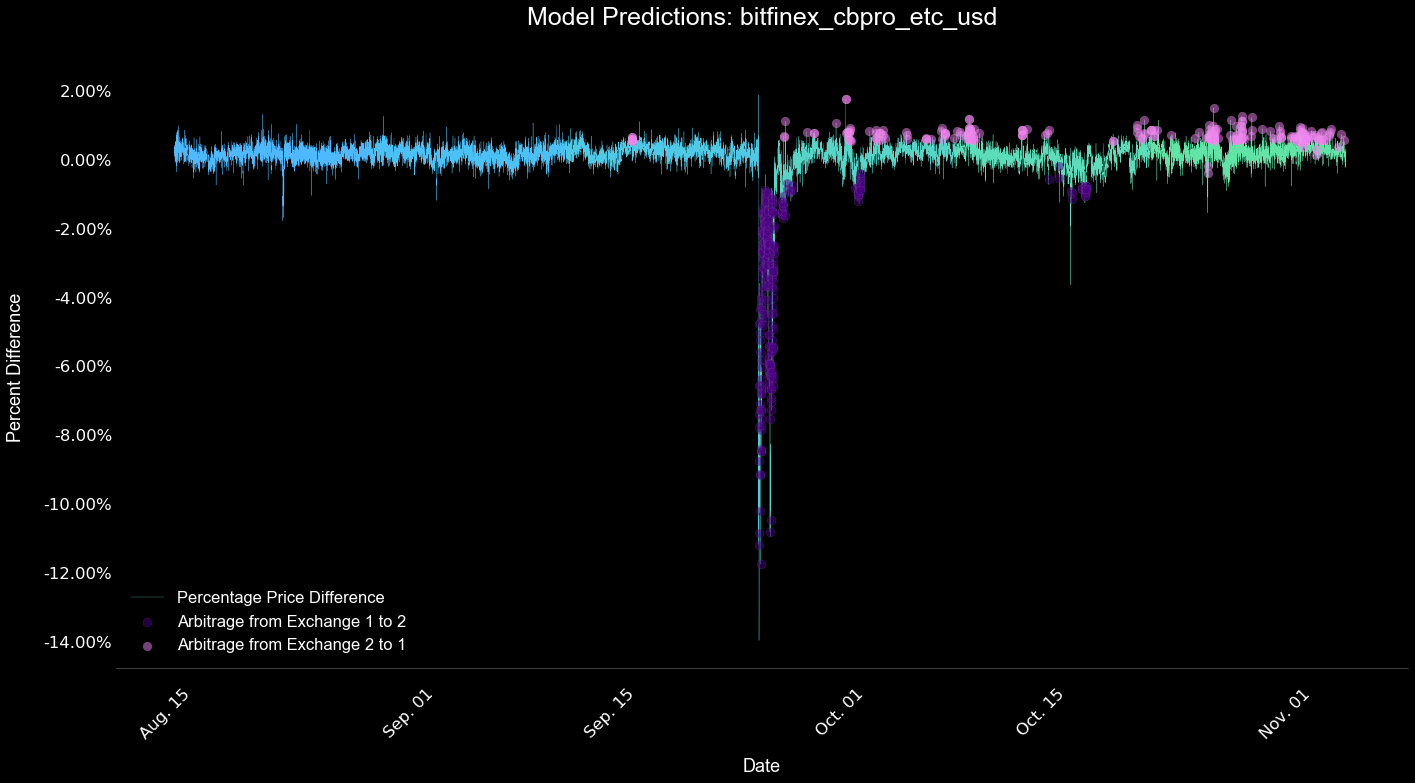

In [471]:
arb_pred_viz('bitfinex_cbpro_etc_usd', top_models_df)

#### Generate and export all visualizaions

In [36]:
# 6       
# function to create the viz for all model sets:
#         - iterate through each row in performance df 
#             - define base model
#         - call visualization function for that base model


def create_all_viz(top_models_df):
    csv_names = top_models_df['csv_name'].to_list()
#     print(csv_names)
    
    for csv_name in csv_names:
        print(csv_name, '\n')
        arb_profit_viz(csv_name, top_models_df, 10000)
        arb_pred_viz(csv_name, top_models_df)

In [42]:
top_models_df.sort_by

model_id  \
246  cbpro_bitfinex_eth_usd_rf_70_feat_hyper_50_21_100   
598                  bitfinex_cbpro_btc_usd_rf_50_feat   
67                        cbpro_bitfinex_ltc_usd_rf_bl   
528                        kraken_gemini_bch_btc_lr_bl   
792                      gemini_bitfinex_ltc_btc_lr_bl   

                    csv_name       model_label  \
246   cbpro_bitfinex_eth_usd  rf_70_feat_hyper   
598   bitfinex_cbpro_btc_usd        rf_50_feat   
67    cbpro_bitfinex_ltc_usd             rf_bl   
528    kraken_gemini_bch_btc             lr_bl   
792  gemini_bitfinex_ltc_btc             lr_bl   

                                                params  accuracy  \
246  {'max_depth': 21, 'max_features': 50, 'n_estim...  0.964107   
598                                                 {}  0.972845   
67                                                  {}  0.957855   
528                                                 {}  0.870250   
792                                                 {}  0.906365   

     pct_profit_mean  pct_profit_median       fpr  correct_arb_neg1  \
246             2.16               1.32  0.014962               195   
598             2.08               1.98  0.015334             26698   
67              4.09               4.81  0.041062               226   
528             0.79               0.31  0.067516               202   
792             0.68               0.75  0.086153               125   

     correct_arb_1  correct_arb  precision_neg1  precision_0  precision_1  \
246          10459        10654        0.870536     0.985038     0.872601   
598             99        26797        0.951461     0.984666     0.761538   
67            4543         4769        0.610811     0.958938     0.972389   
528            212          414        0.668874     0.932484     0.741259   
792            311          436        0.686813     0.913847     0.859116   

     recall_neg1  recall_0  recall_1   f1_neg1      f1_0      f1_1  \
246     0.434298  0.971736  0.948232  0.579495  0.978342  0.908846   
598     0.983207  0.974041  0.216630  0.967074  0.979325  0.337308   
67      0.570707  0.994928  0.681518  0.590078  0.976602  0.801376   
528     0.893805  0.894319  0.718644  0.765152  0.913003  0.729776   
792     0.267094  0.984739  0.497600  0.384615  0.947970  0.630193   

     pct_class_1  pct_class_neg1  pct_class_0  
246         0.21            0.12         0.67  
598         0.08            0.19         0.73  
67          0.24            0.12         0.64  
528         0.14            0.14         0.71  
792         0.07            0.06         0.86

cbpro_bitfinex_eth_usd 



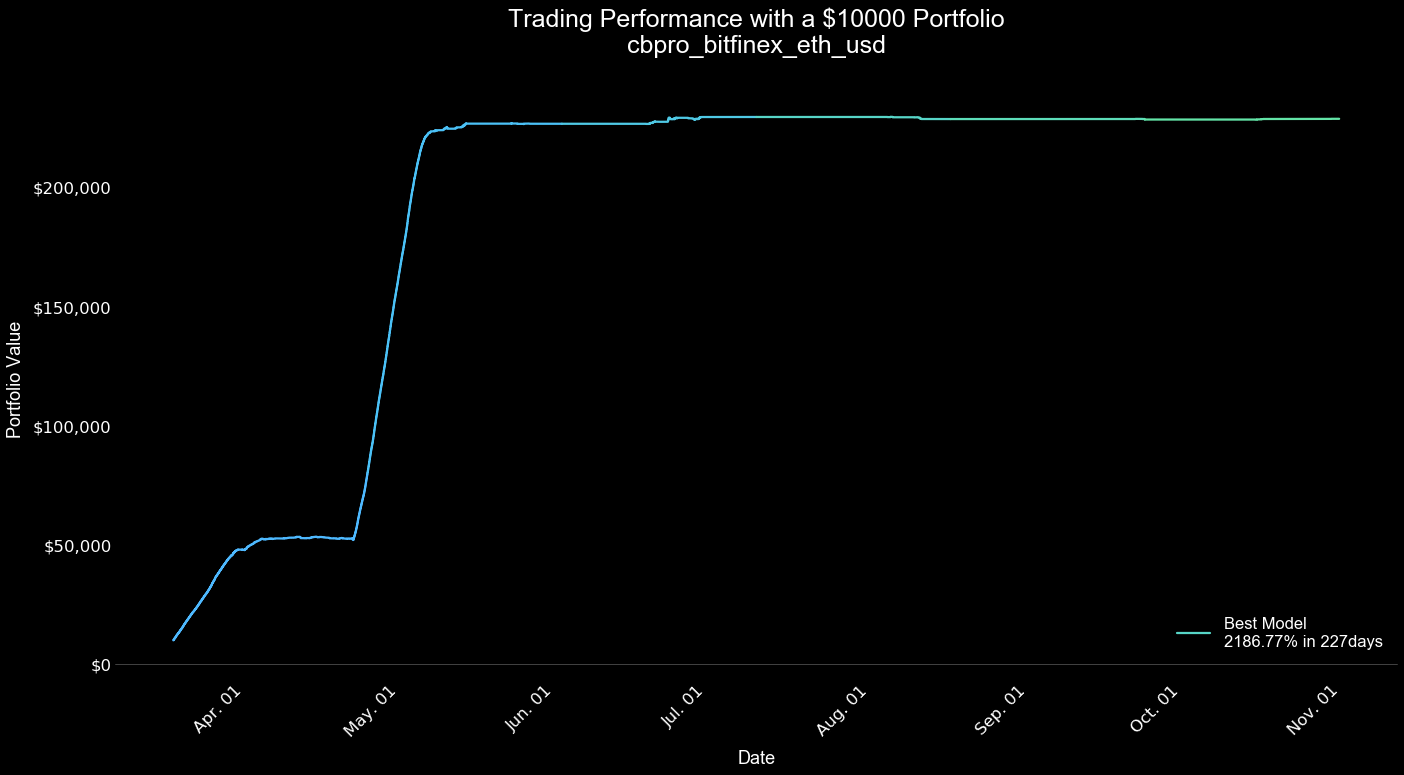

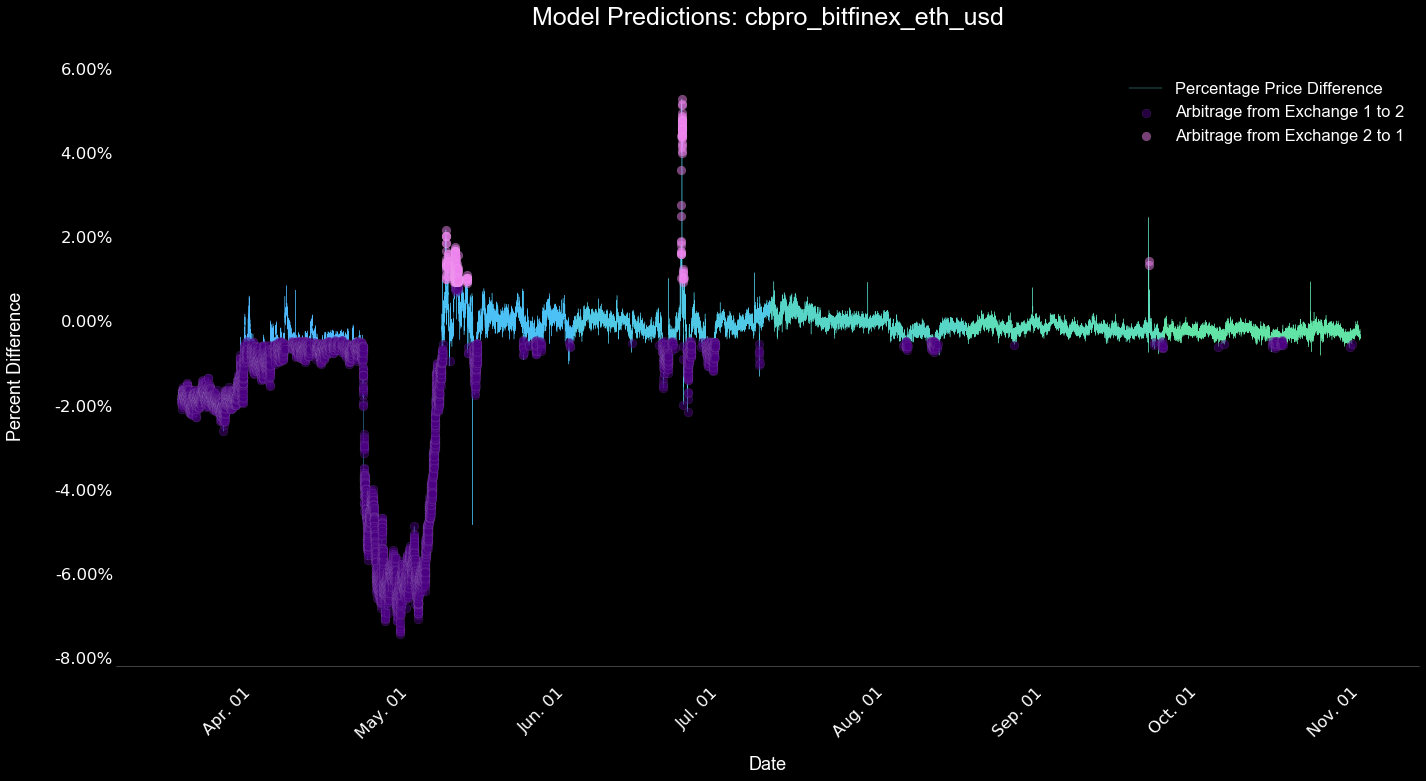

bitfinex_cbpro_btc_usd 



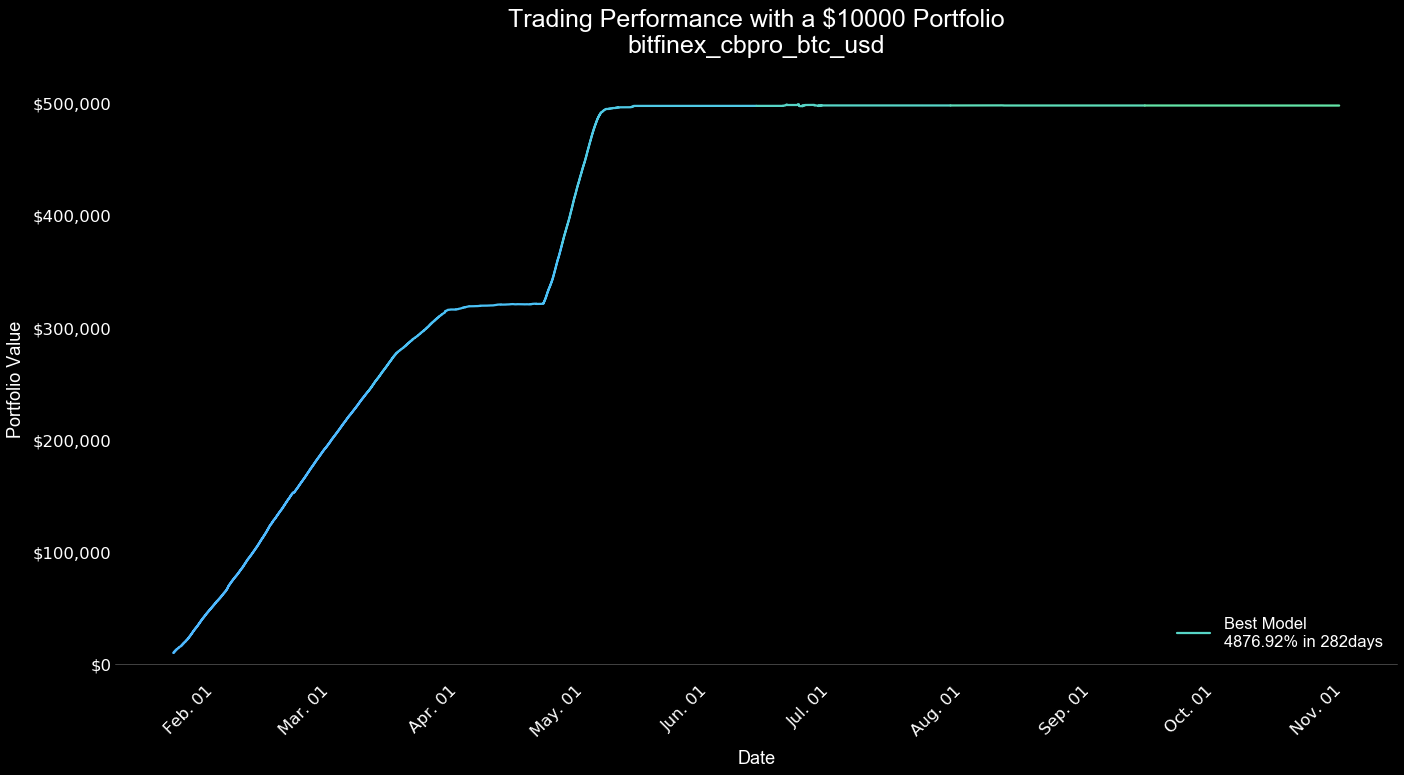

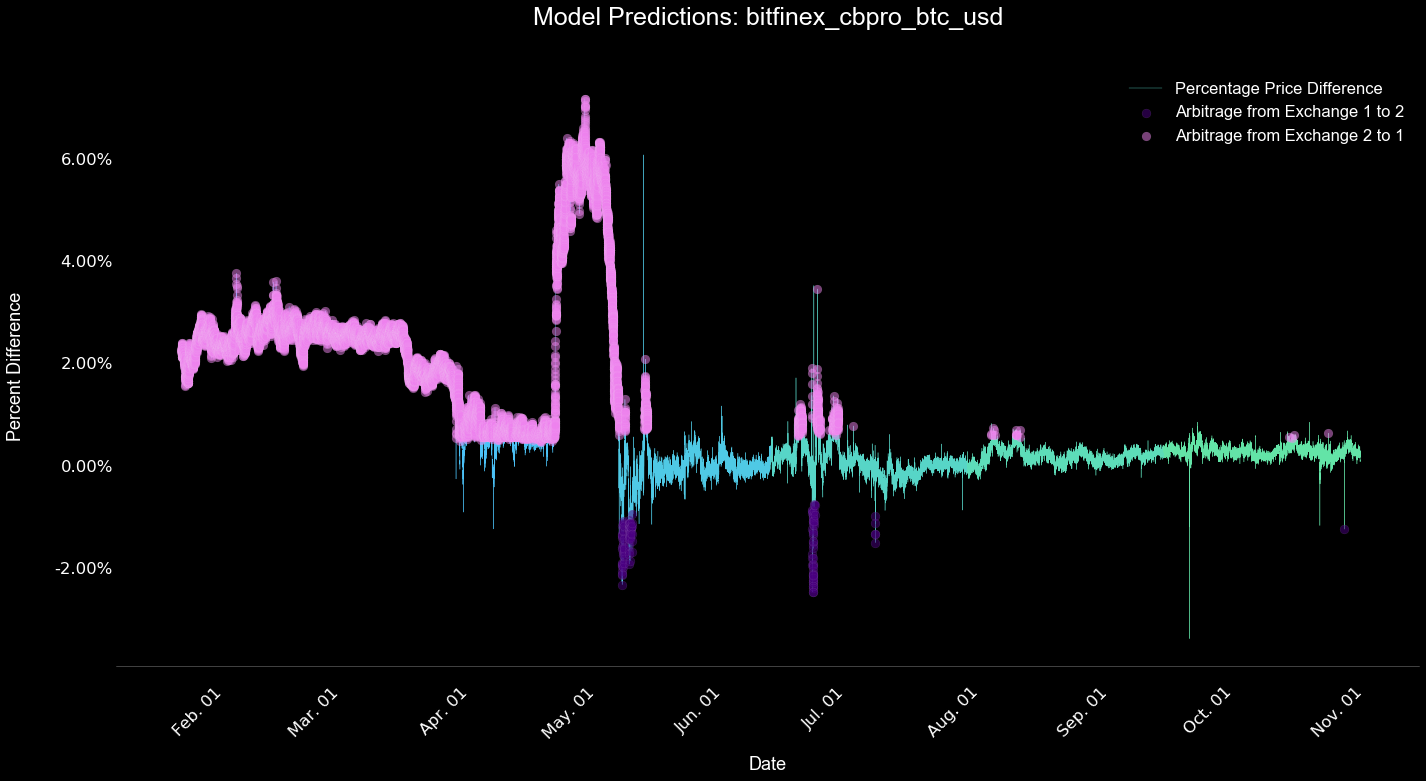

cbpro_bitfinex_ltc_usd 



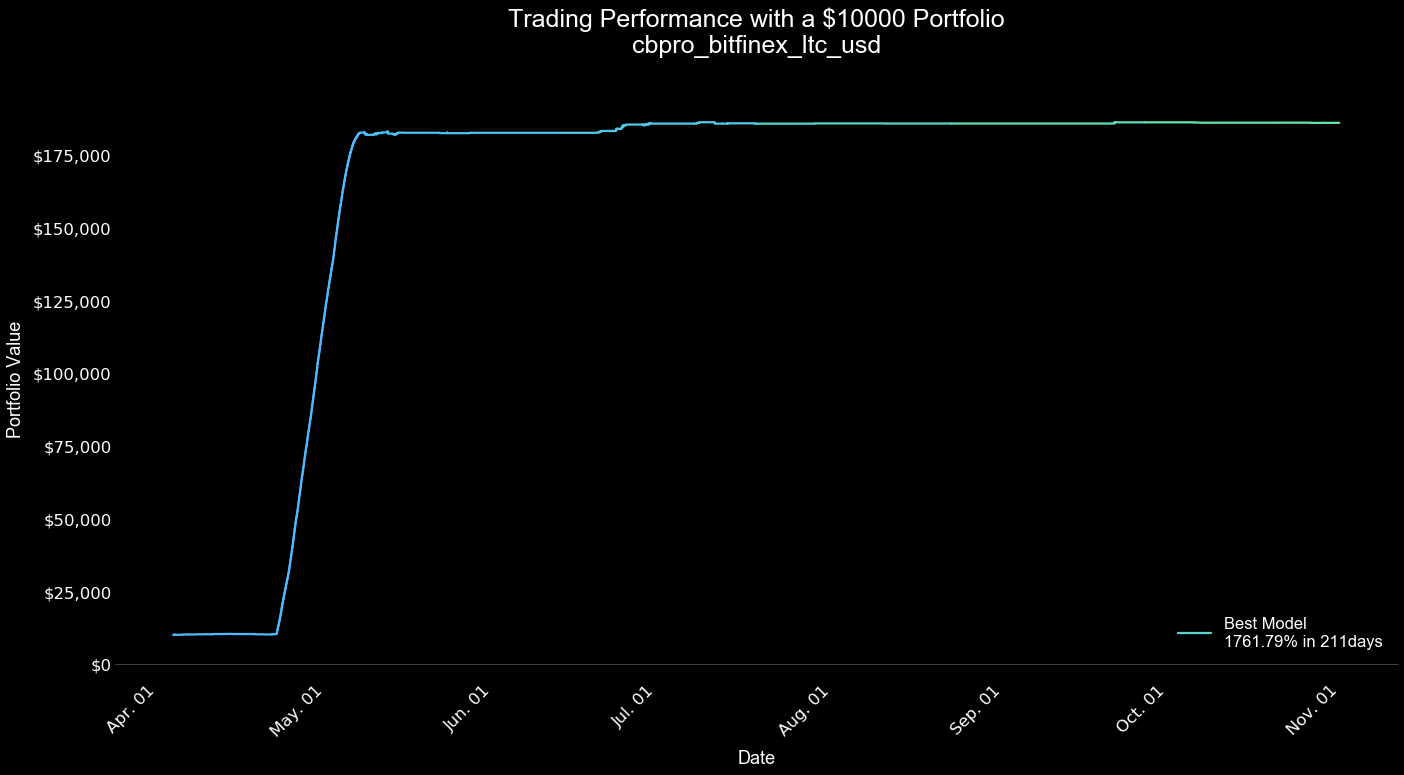

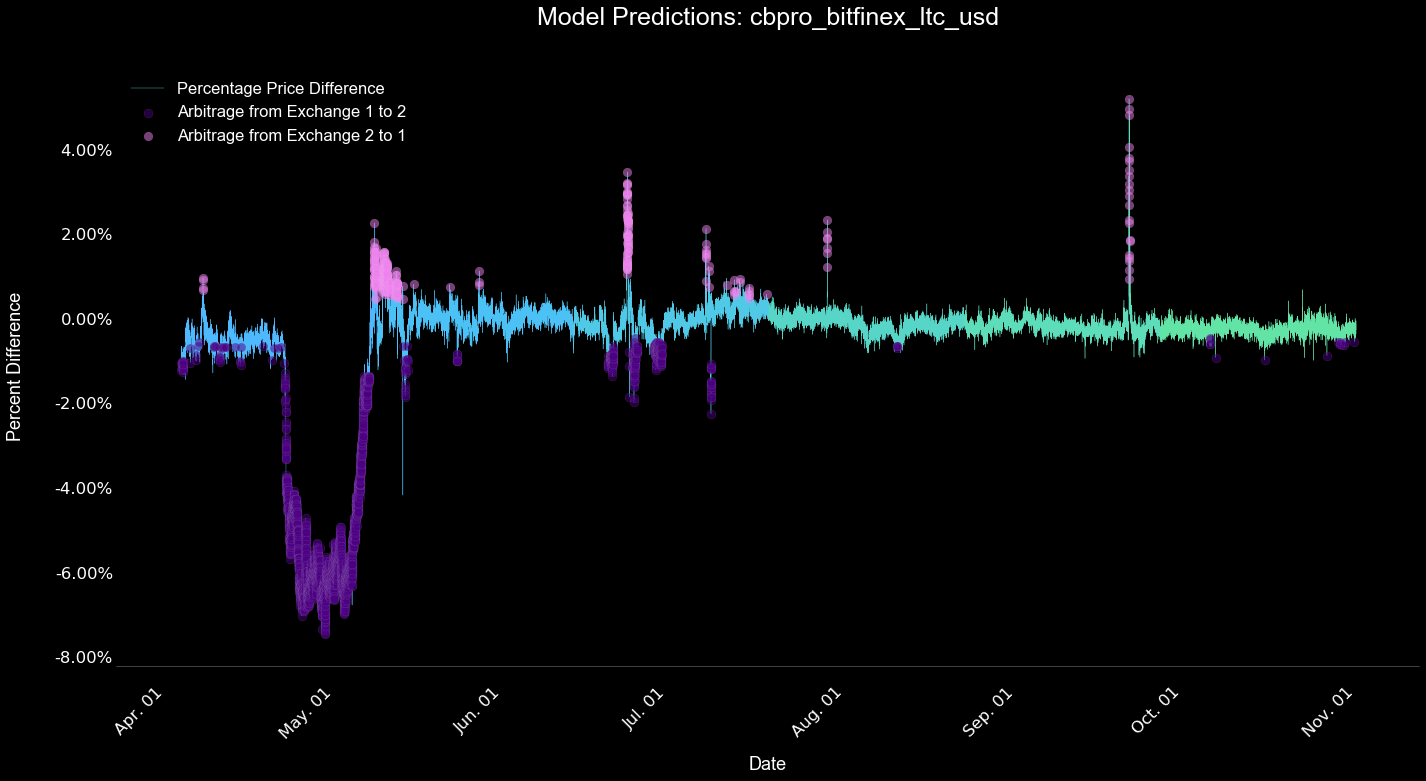

kraken_gemini_bch_btc 



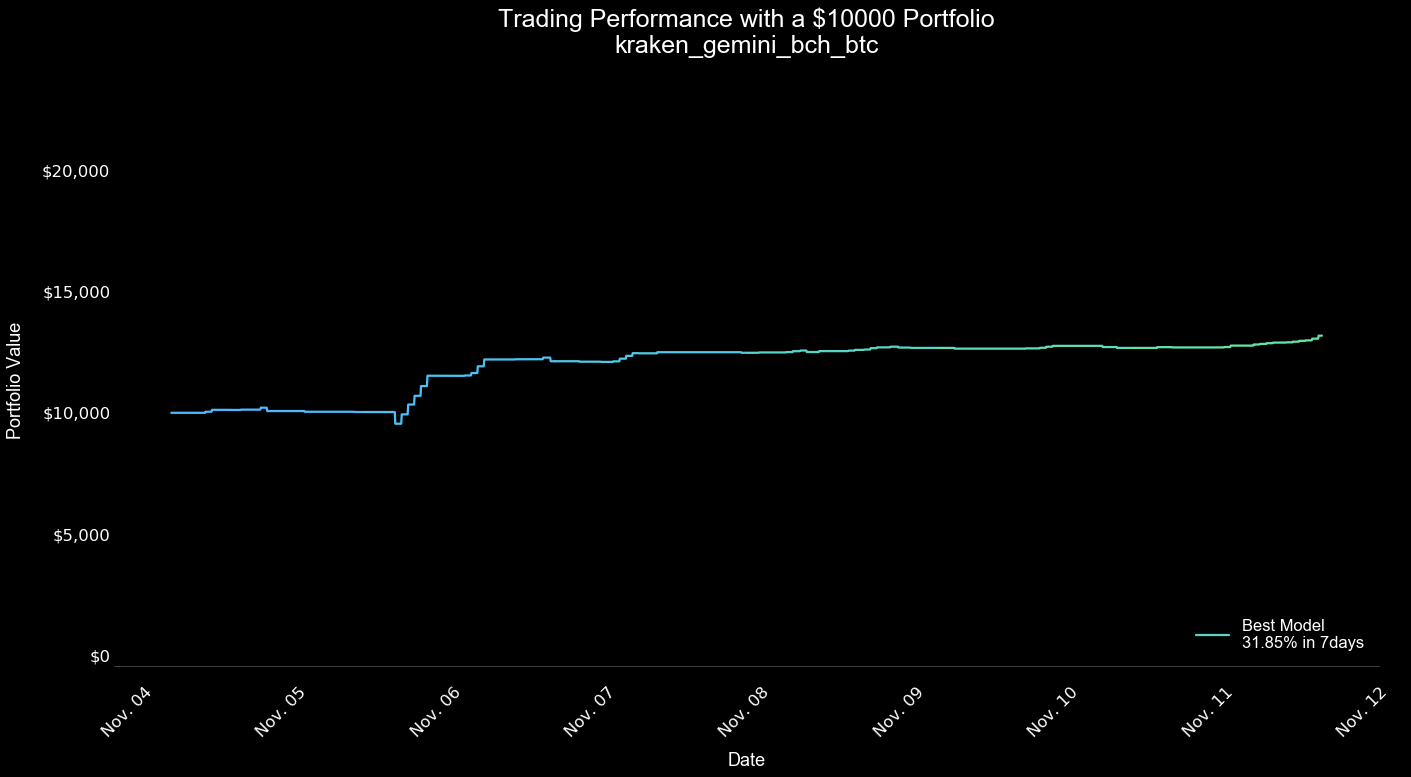

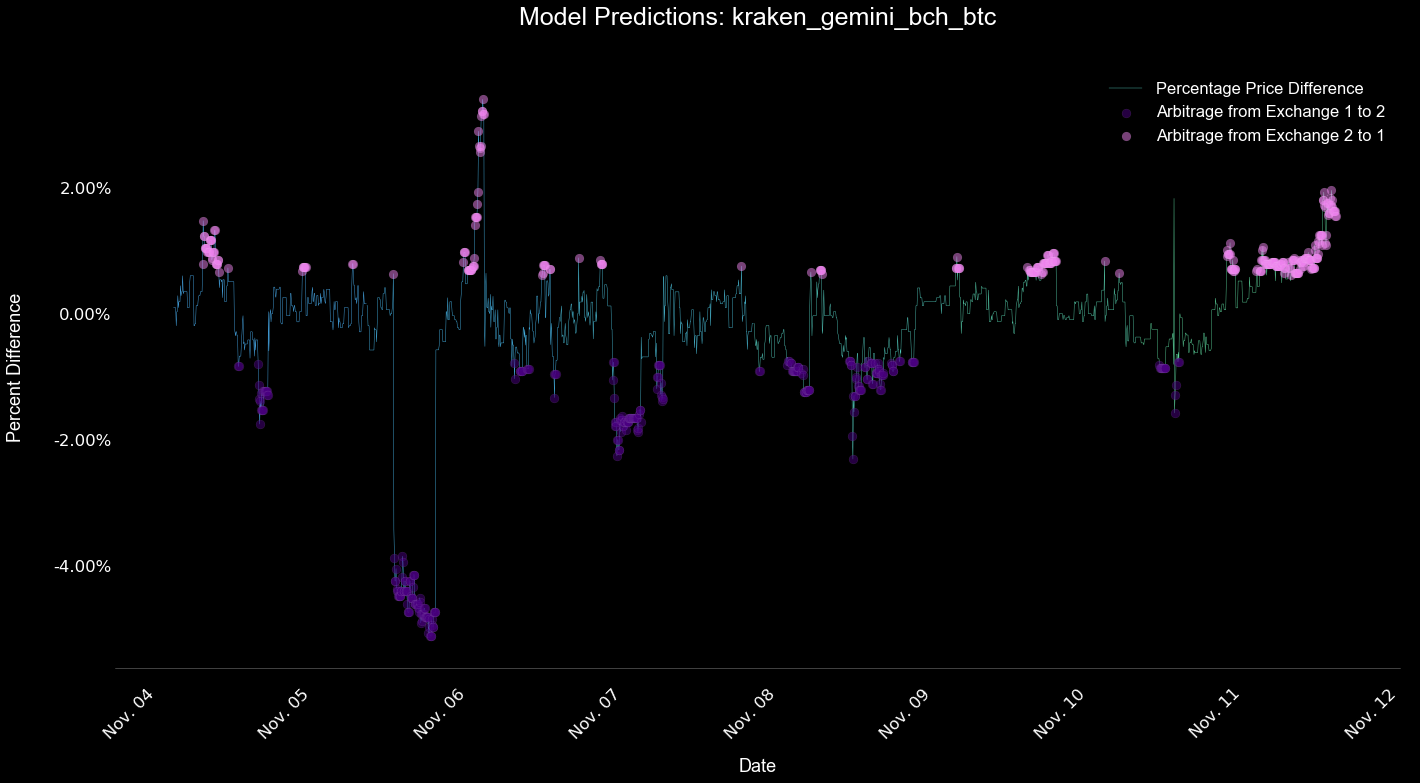

gemini_bitfinex_ltc_btc 



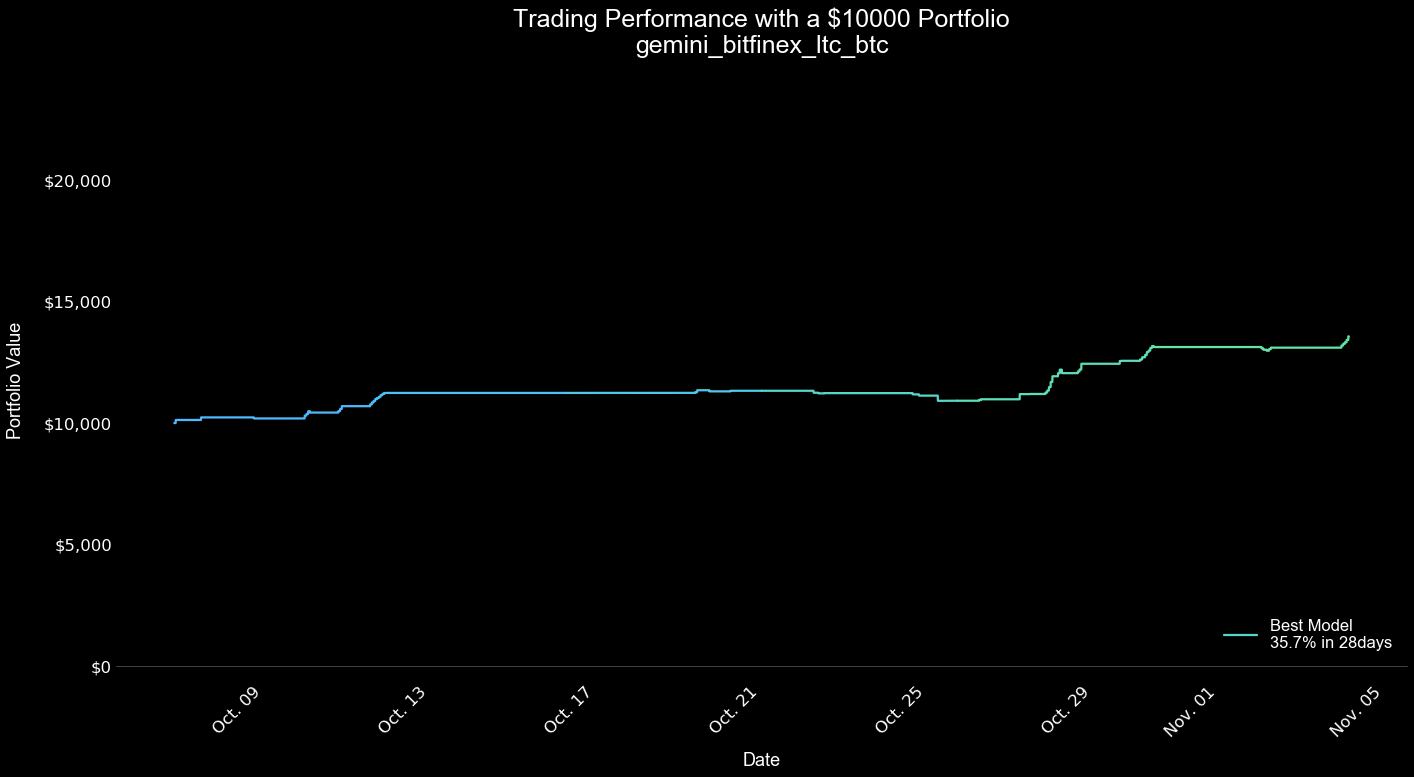

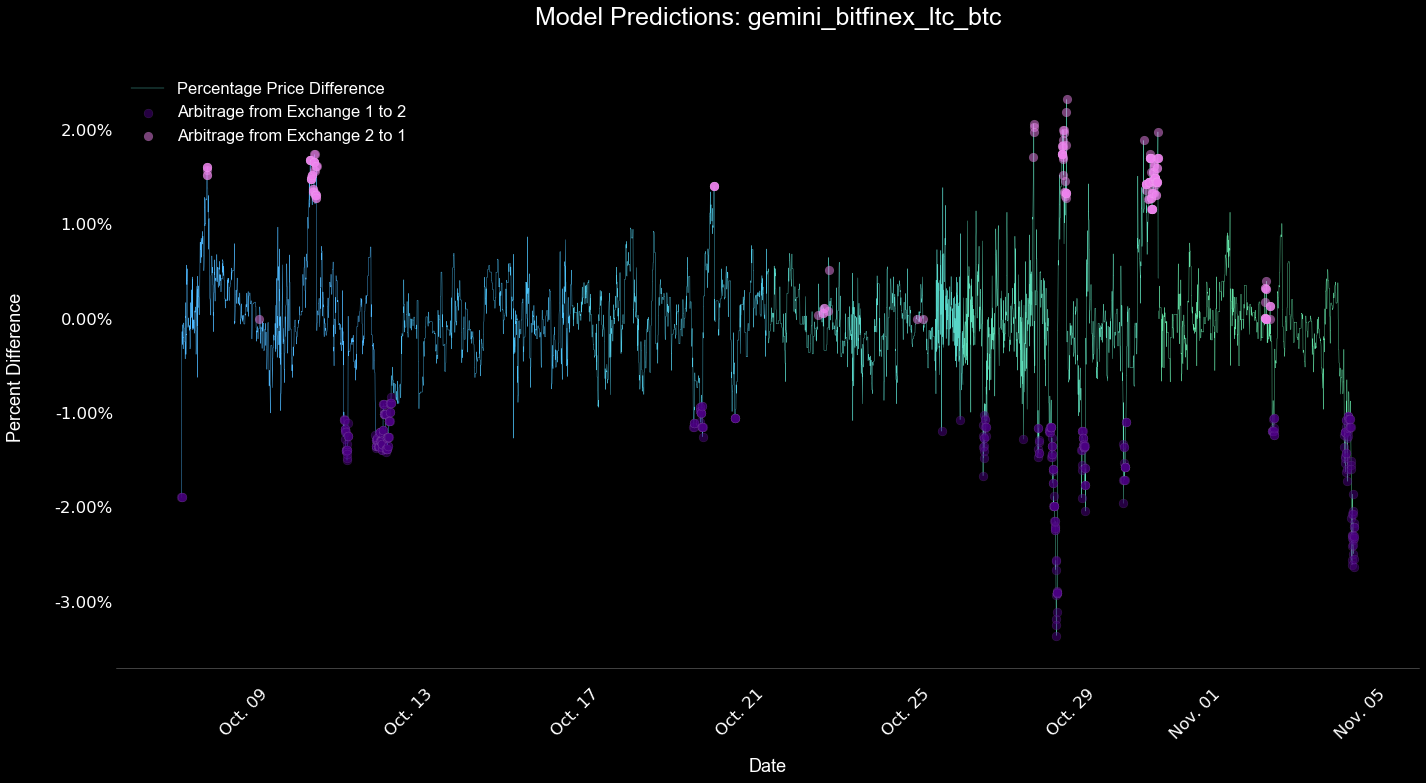

gemini_hitbtc_bch_btc 



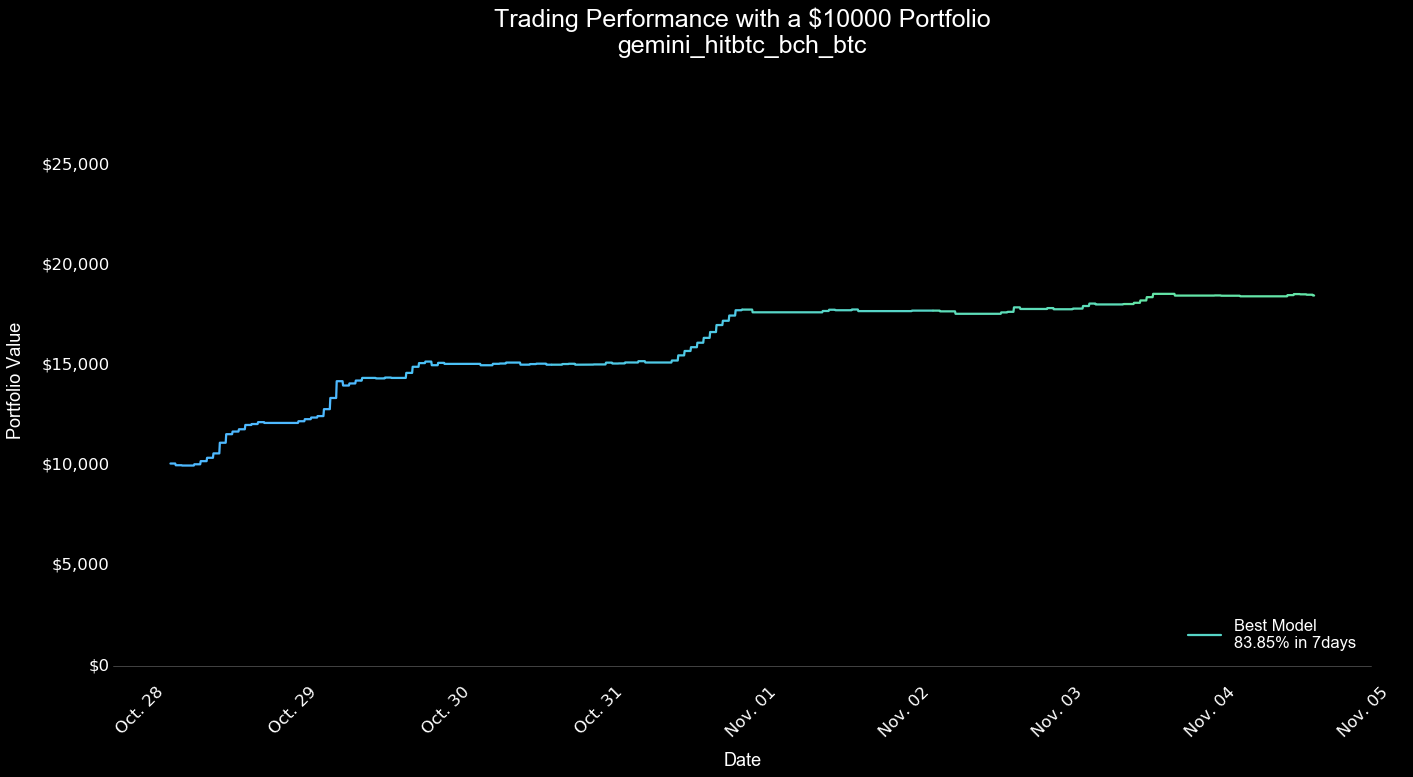

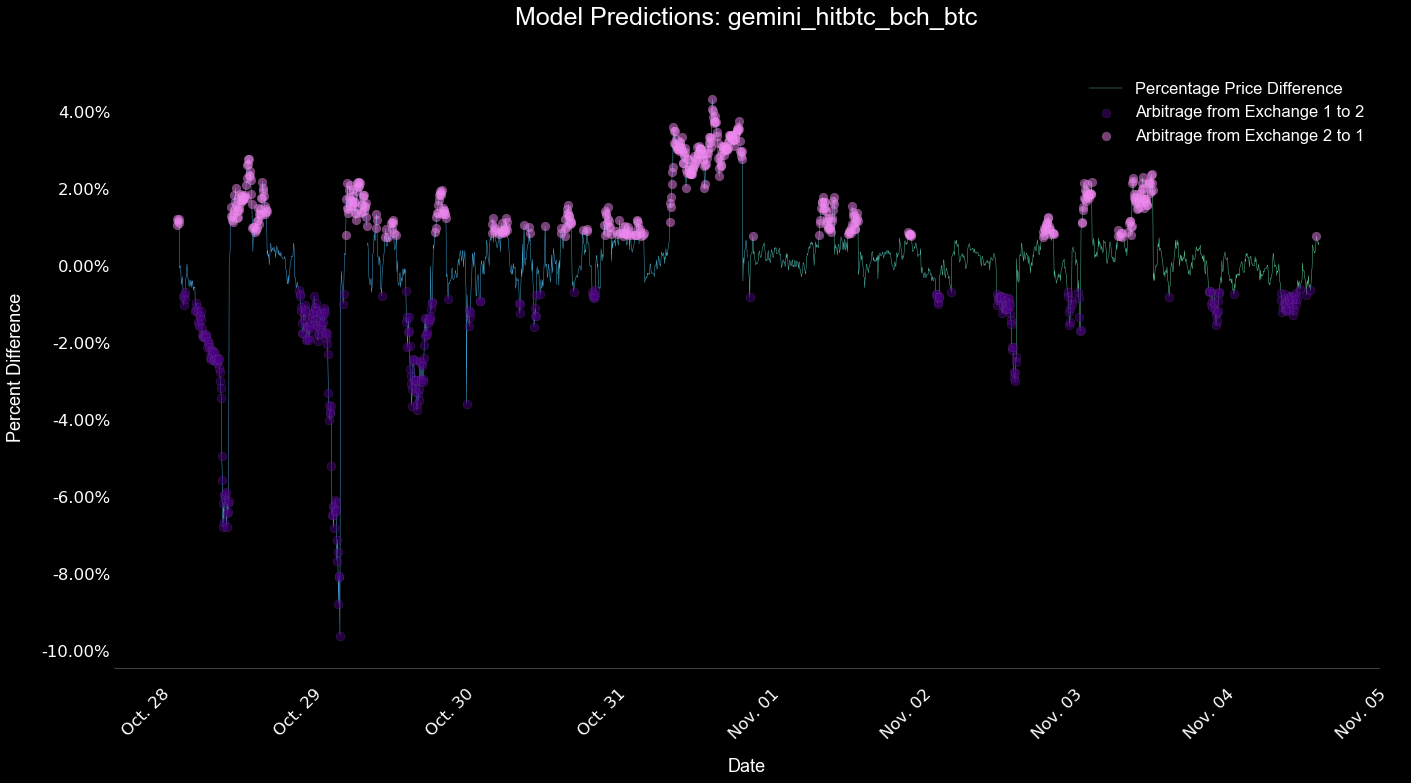

gemini_bitfinex_bch_btc 



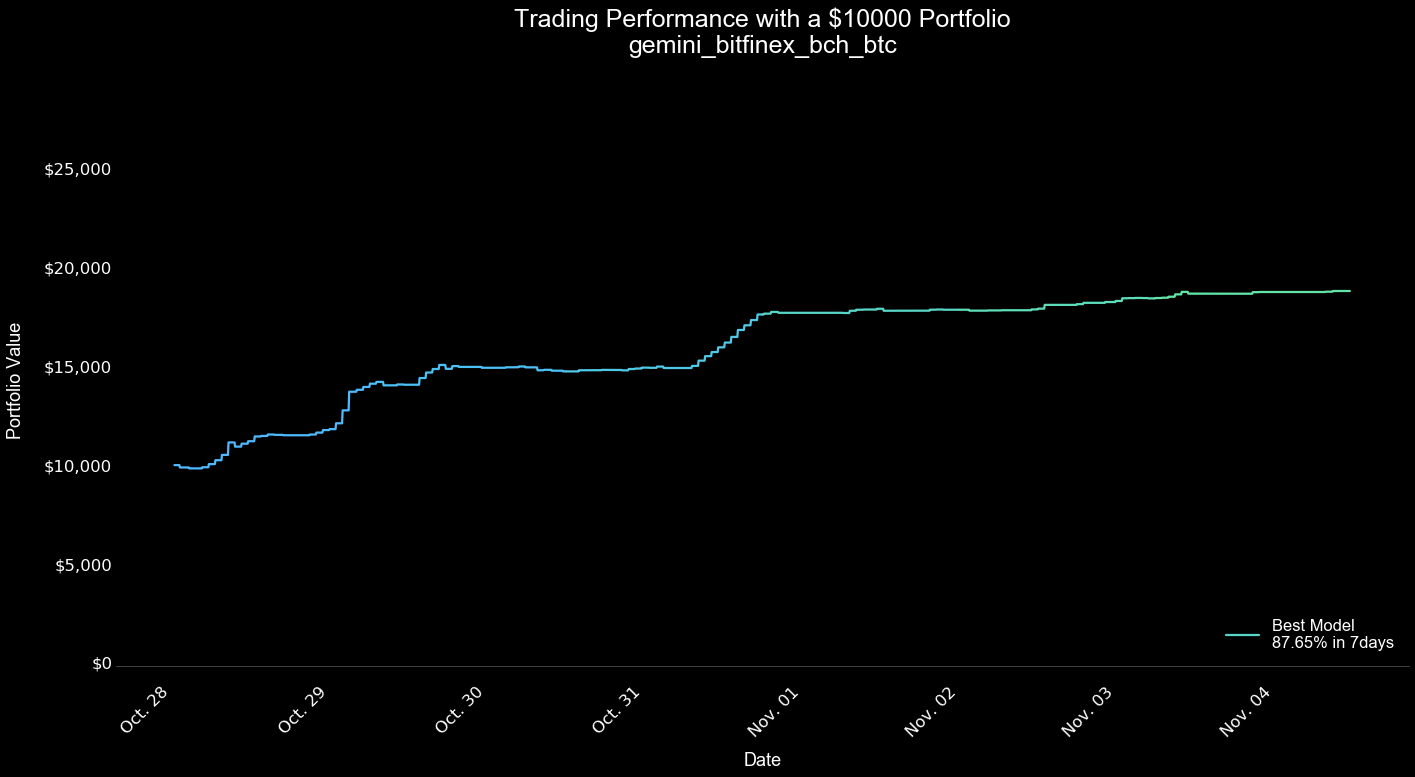

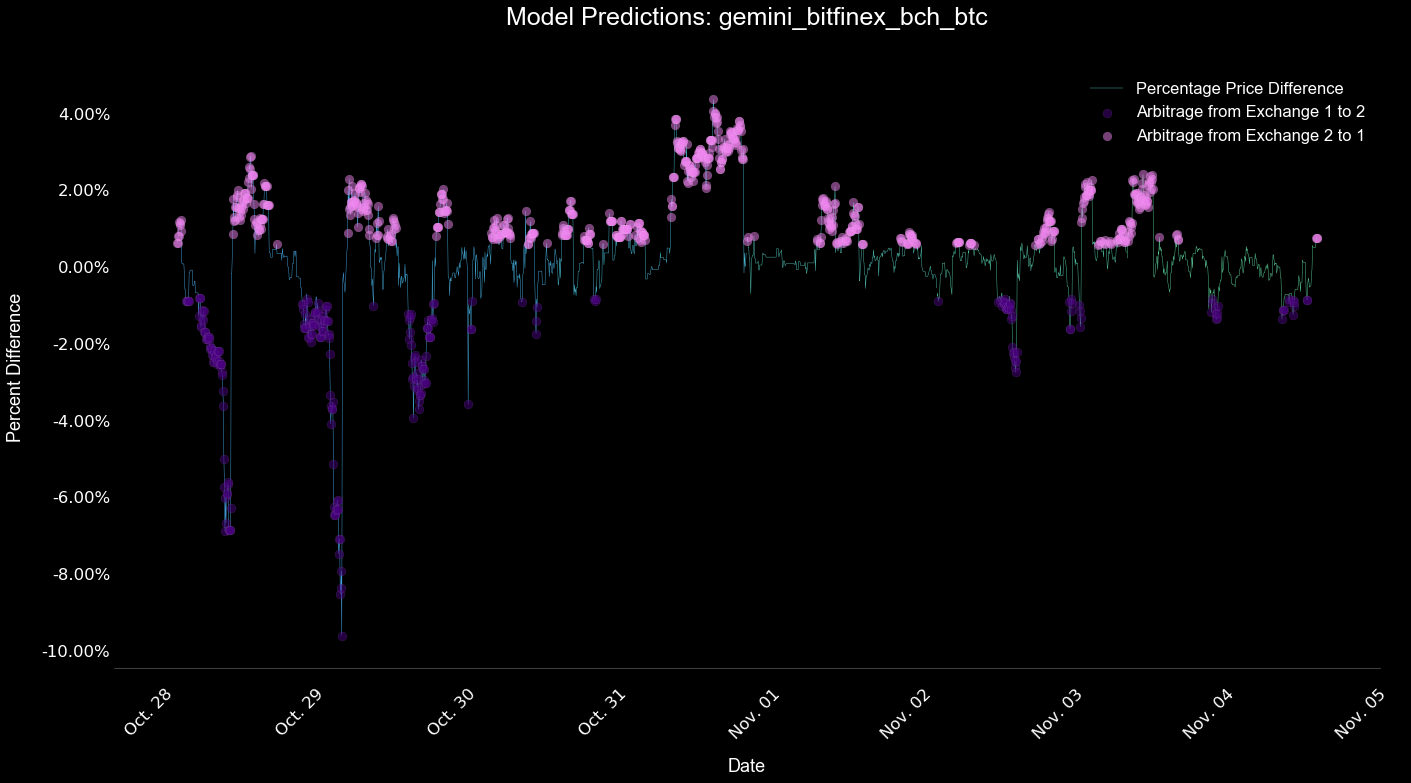

bitfinex_hitbtc_ltc_usdt 



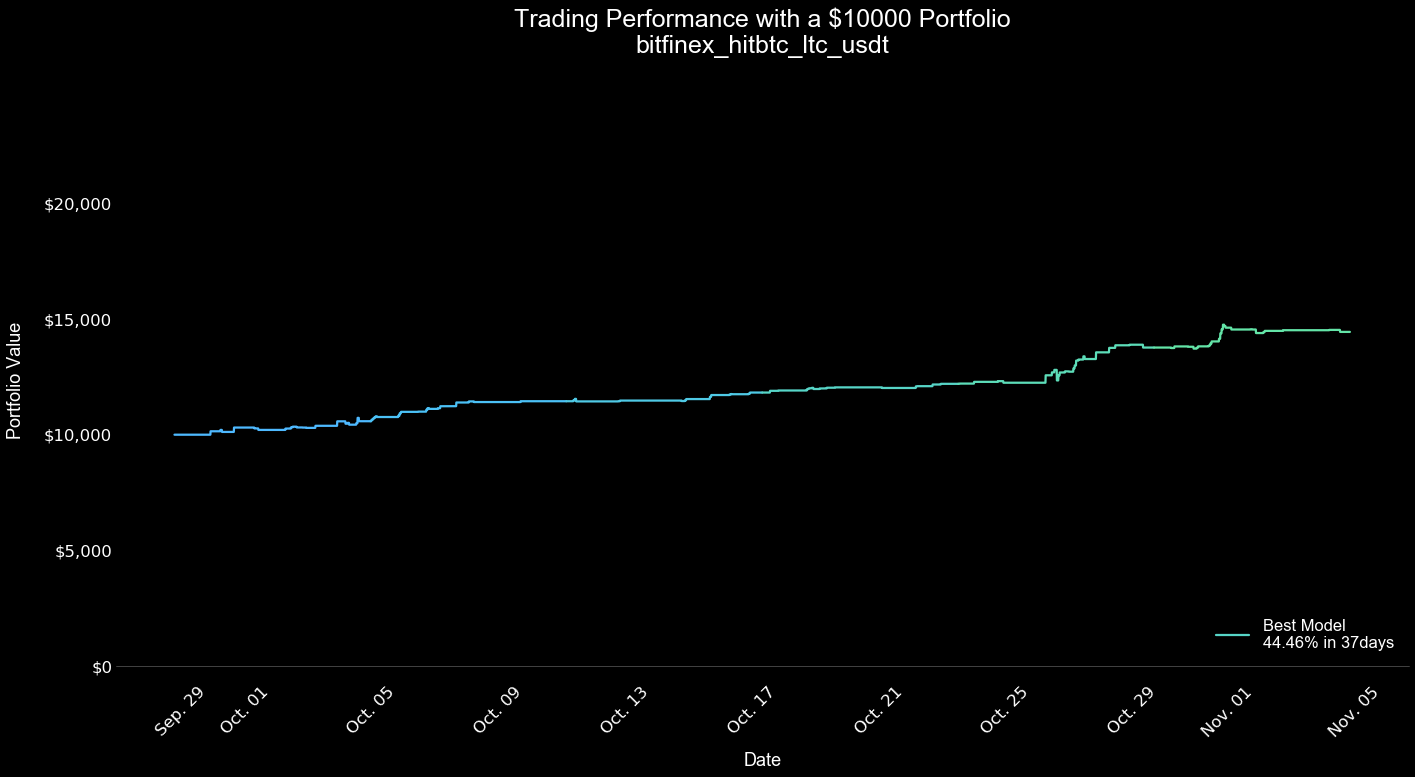

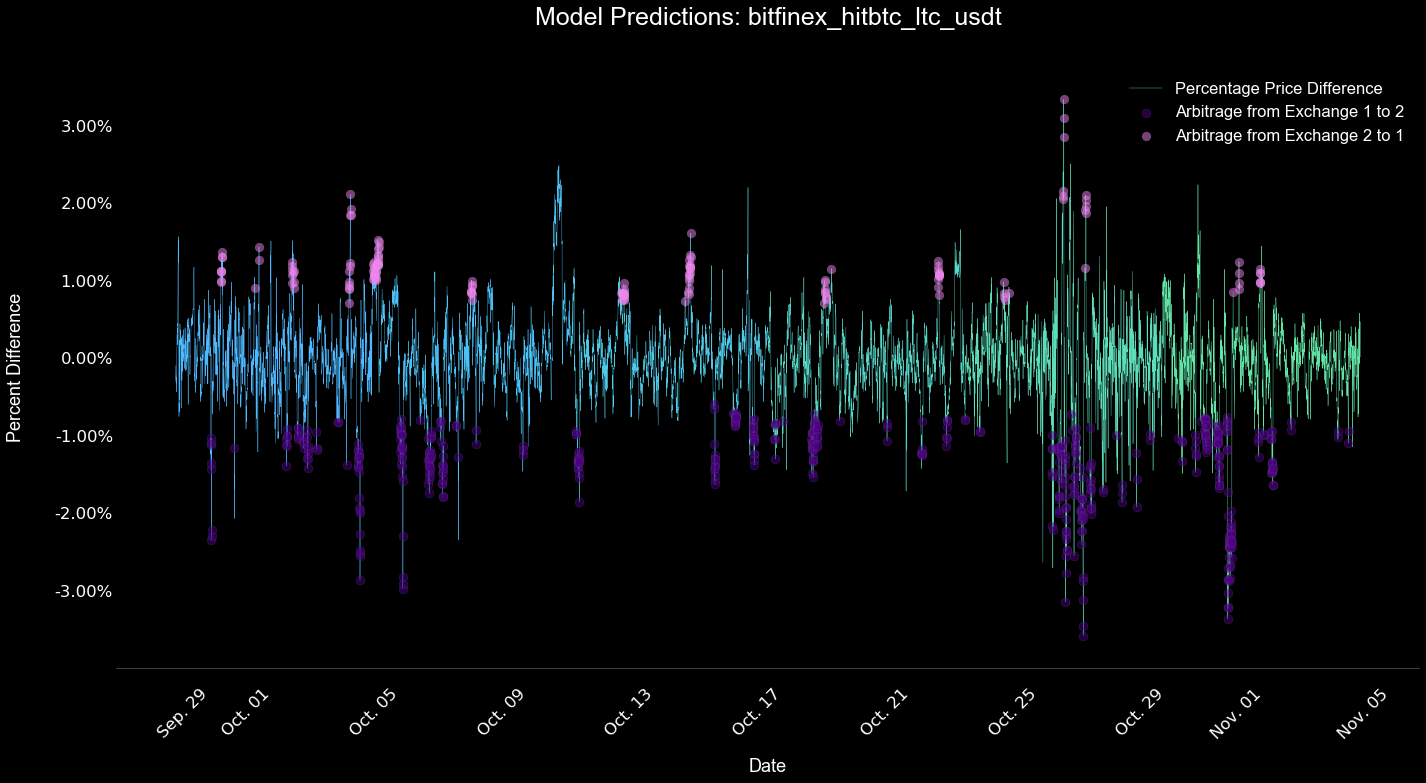

gemini_cbpro_ltc_btc 



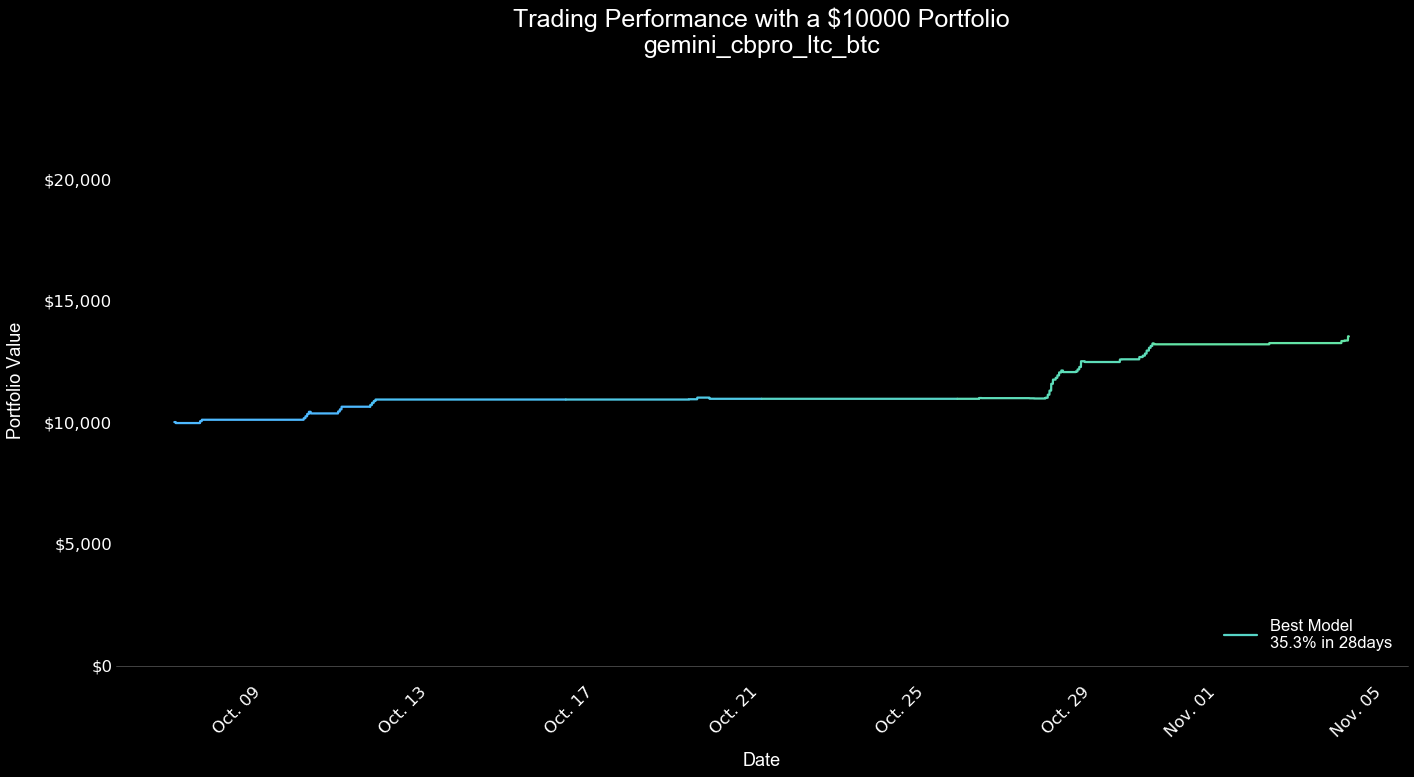

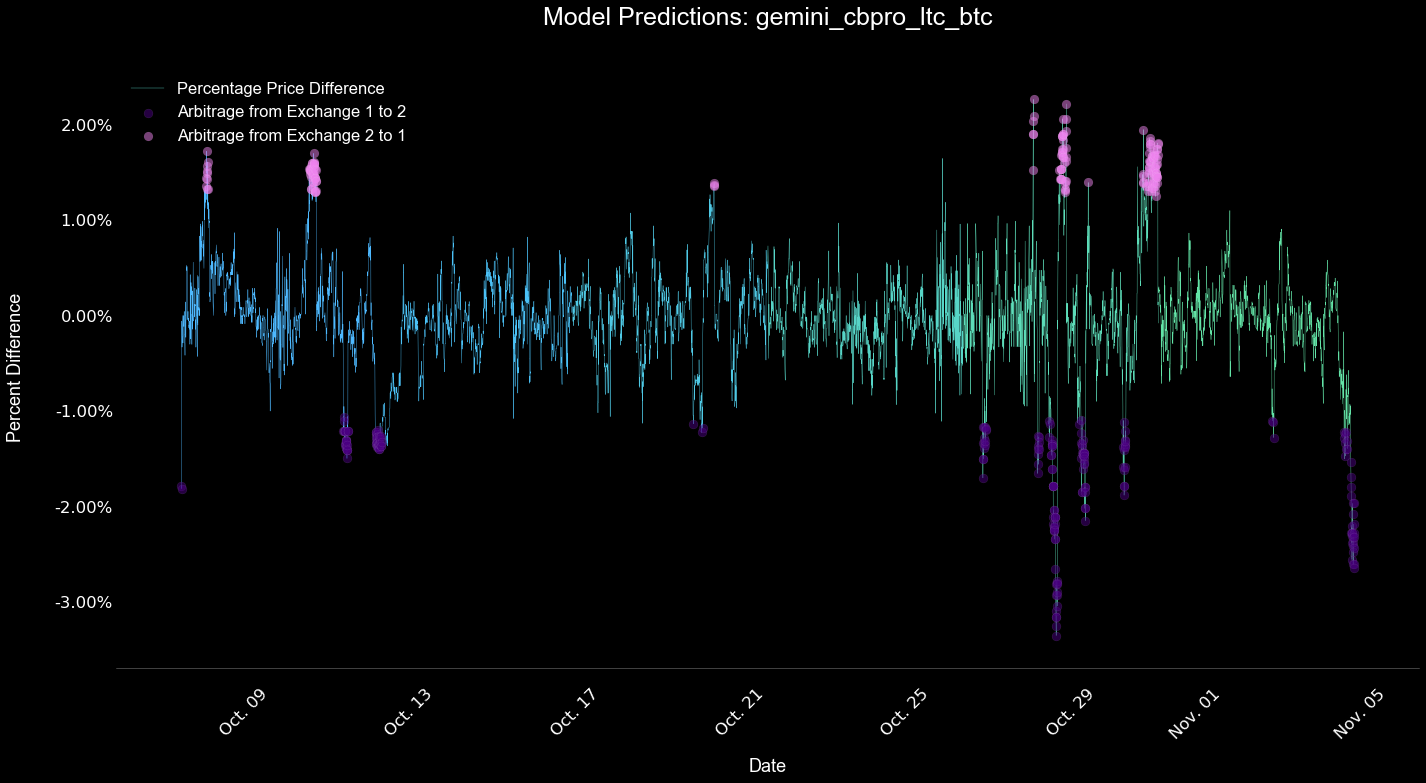

cbpro_gemini_bch_btc 



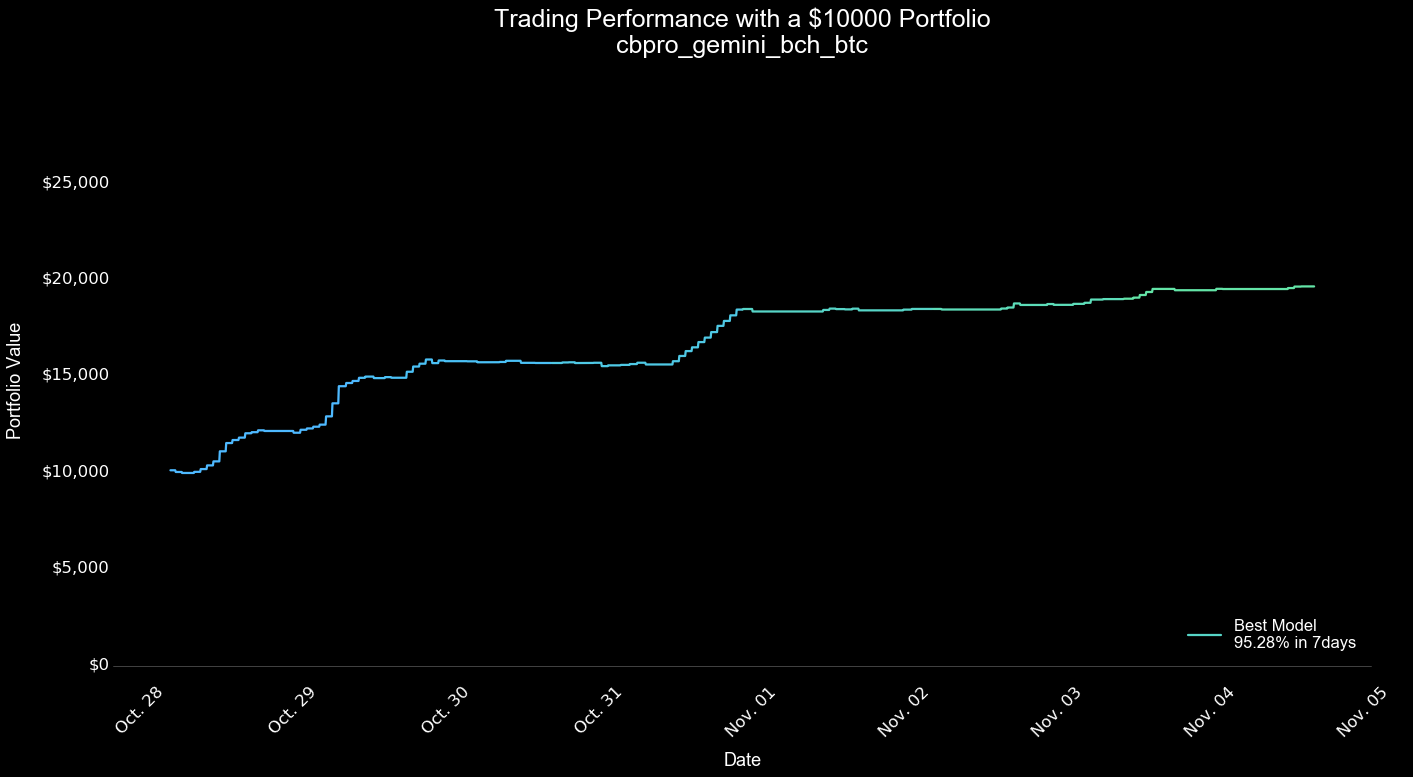

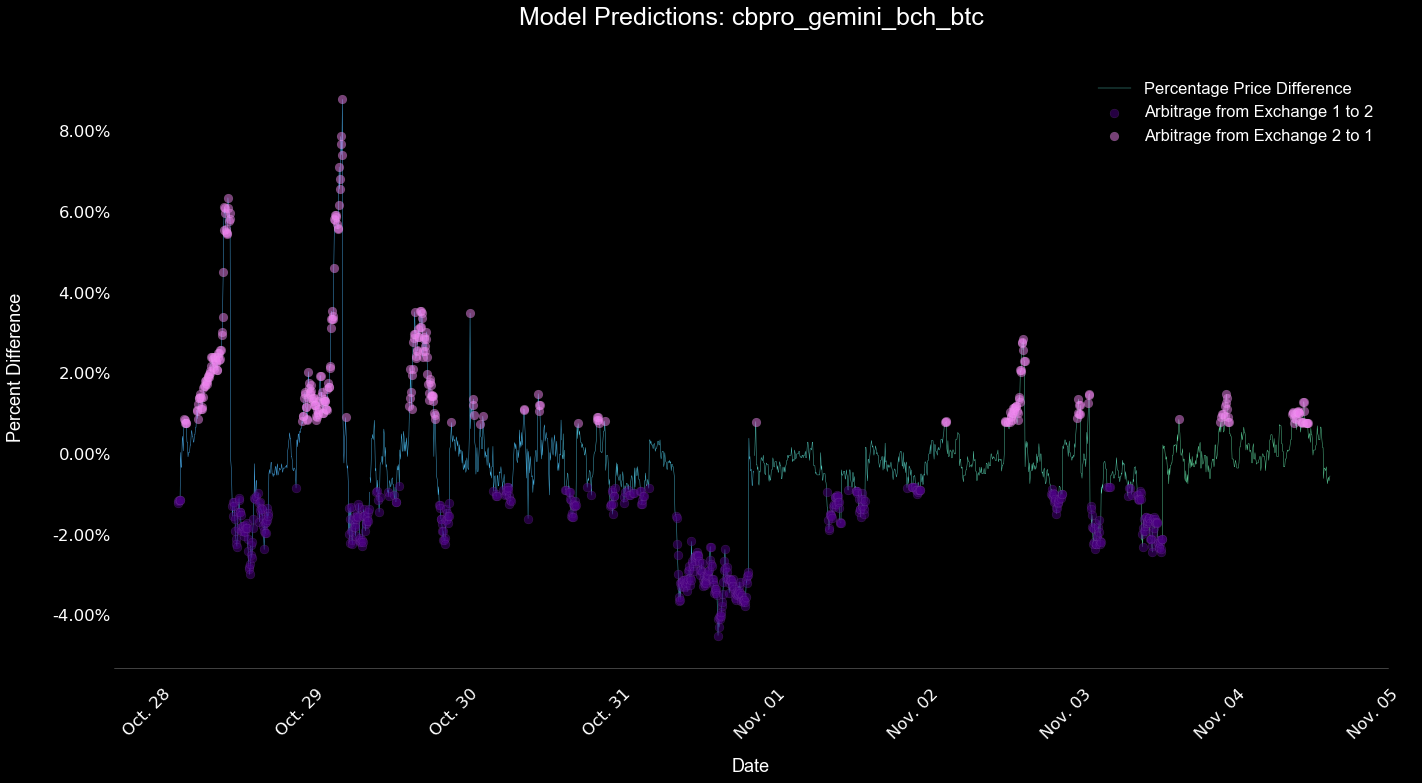

hitbtc_cbpro_eth_usdc 



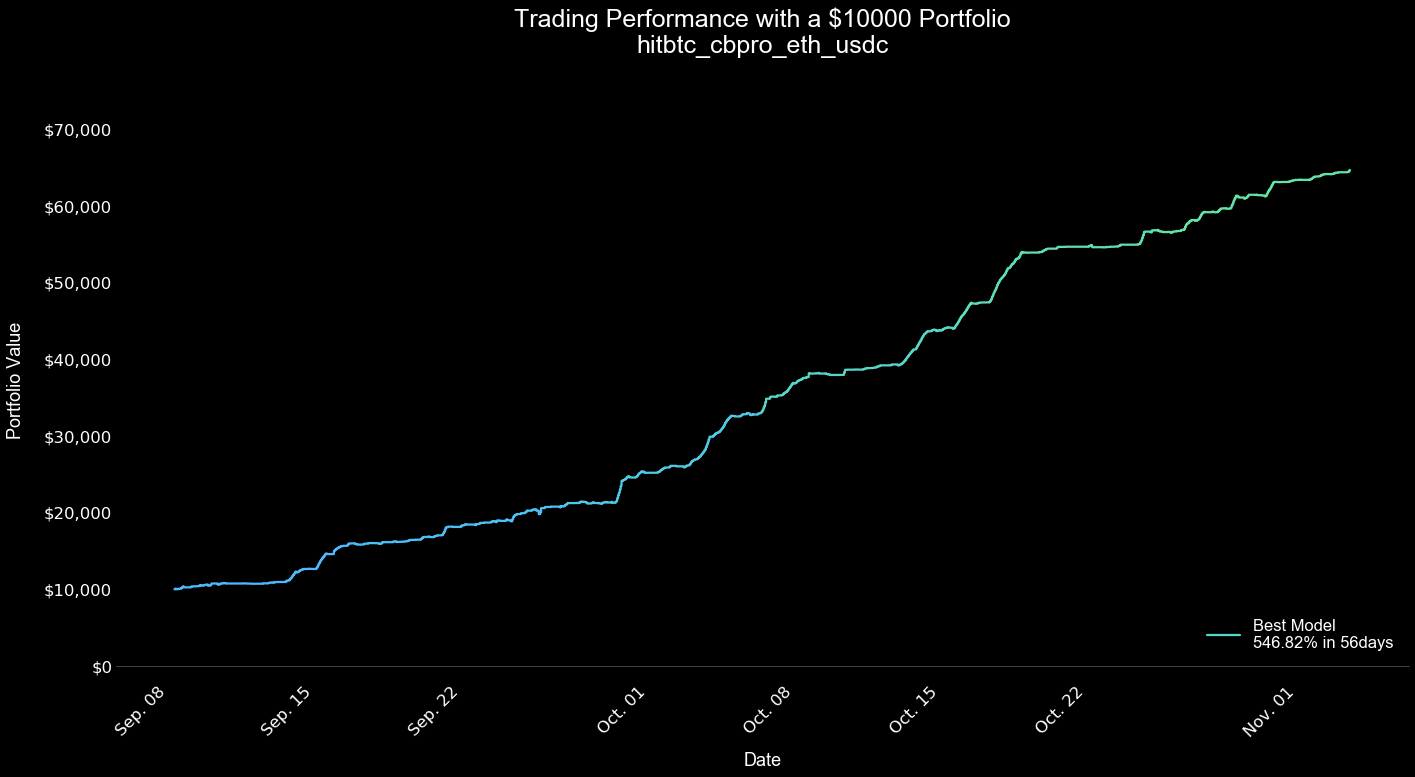

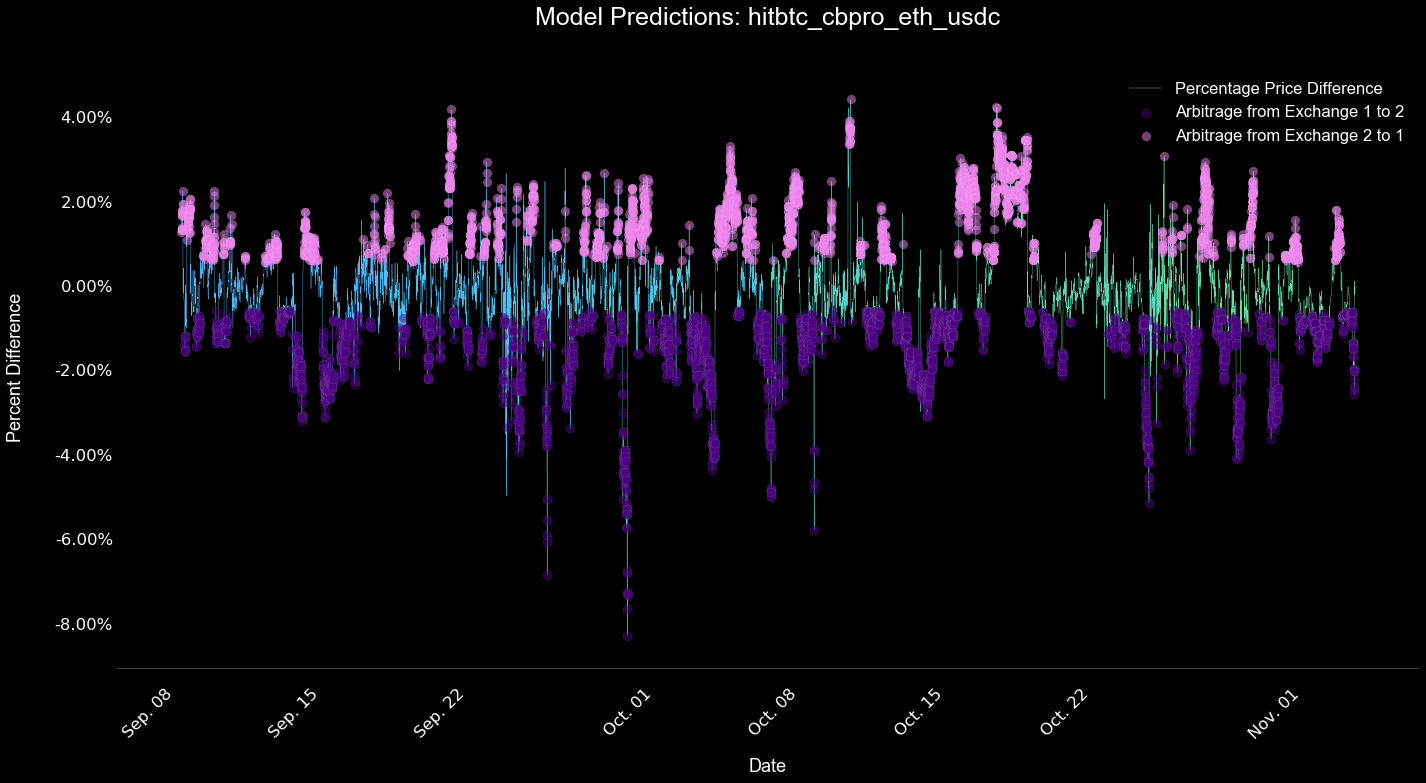

bitfinex_hitbtc_bch_usdt 



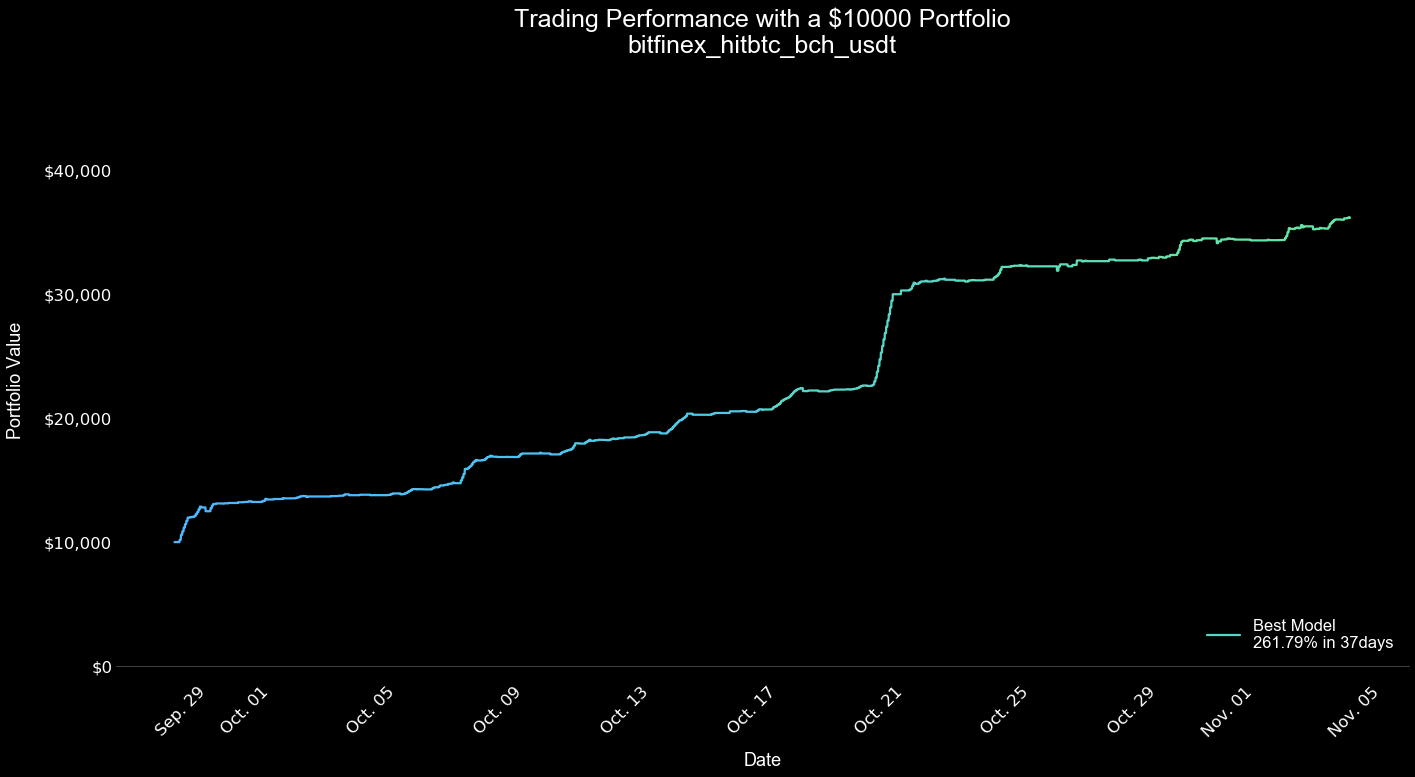

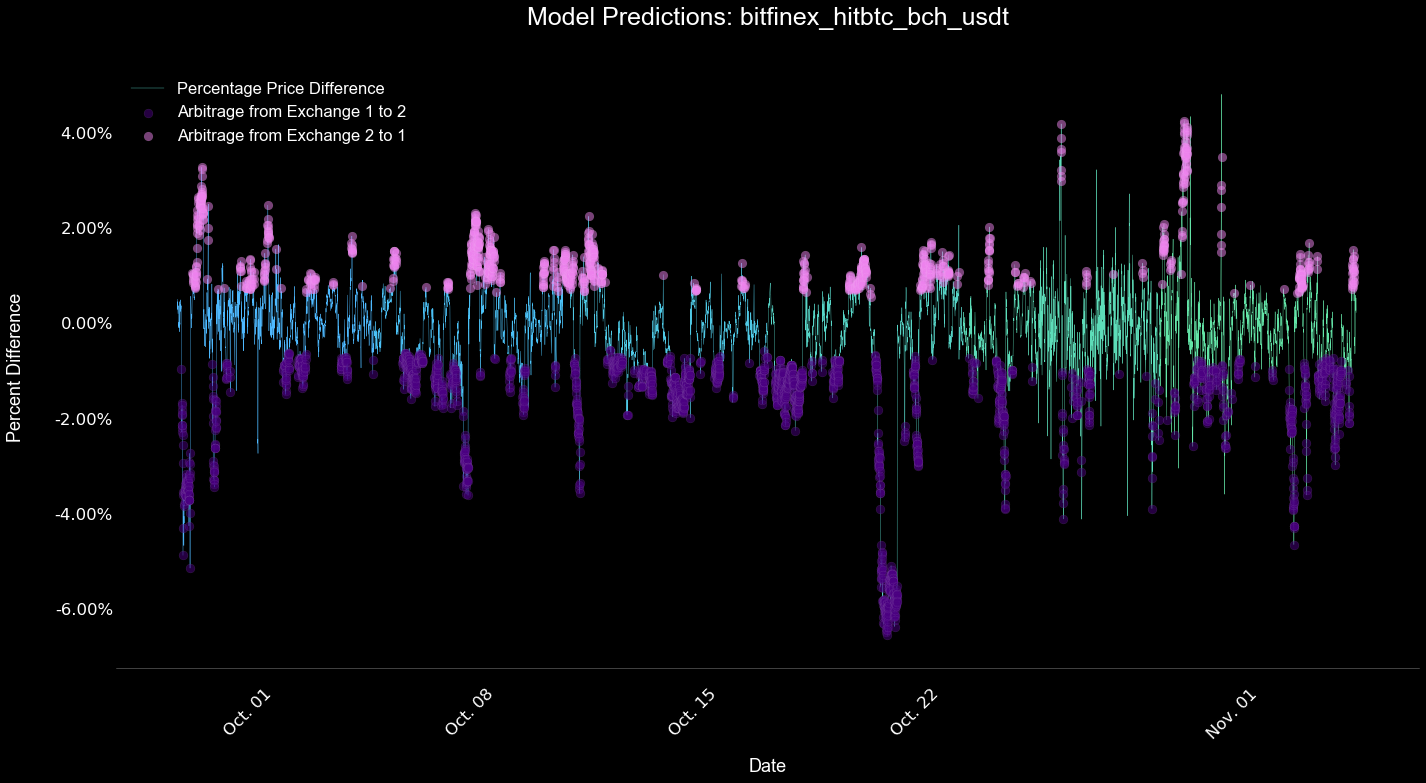

In [41]:
create_all_viz(top_models_df)  # rf bl

hitbtc_cbpro_eth_usdc 

data/arb_preds_test_data/hitbtc_cbpro_eth_usdc_rf_70_feat_hyper.csv


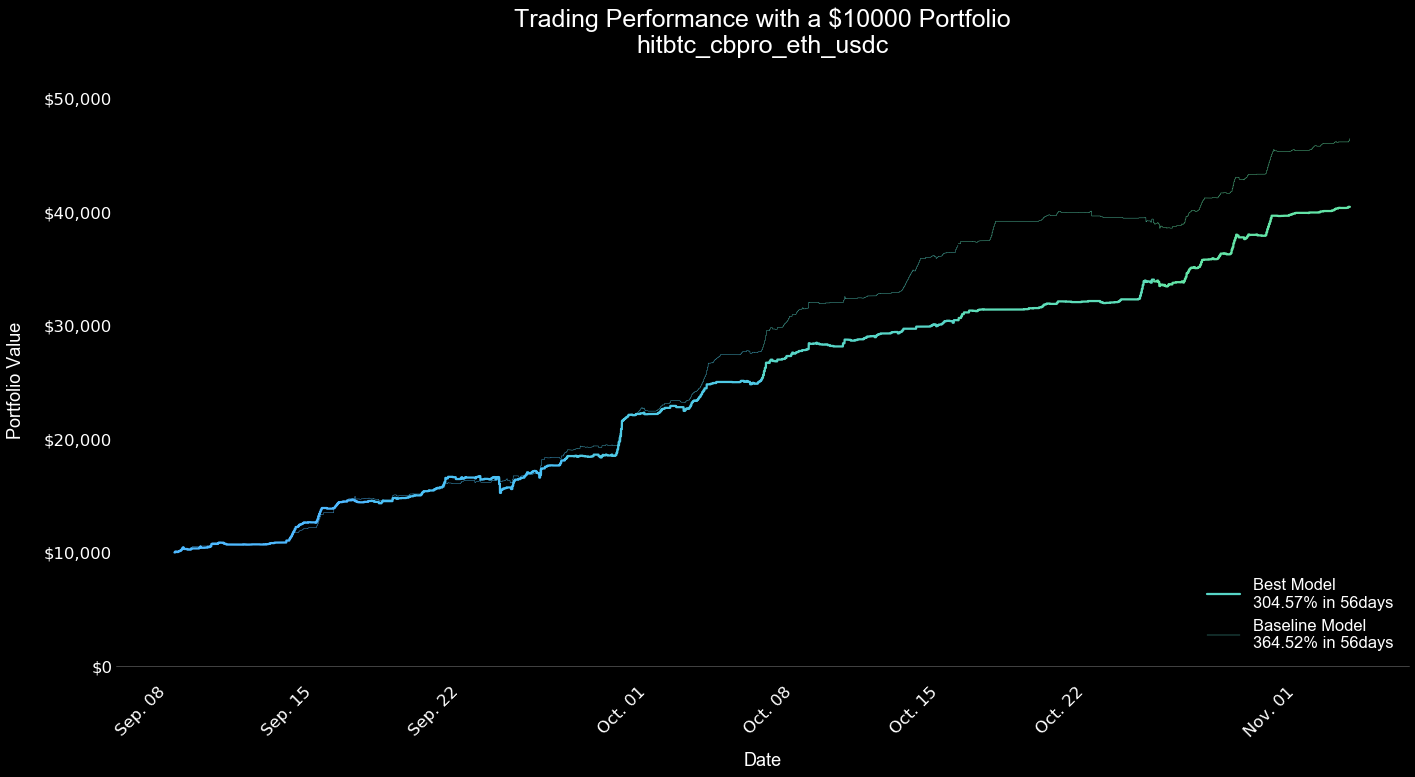

data/arb_preds_test_data/hitbtc_cbpro_eth_usdc_rf_70_feat_hyper.csv


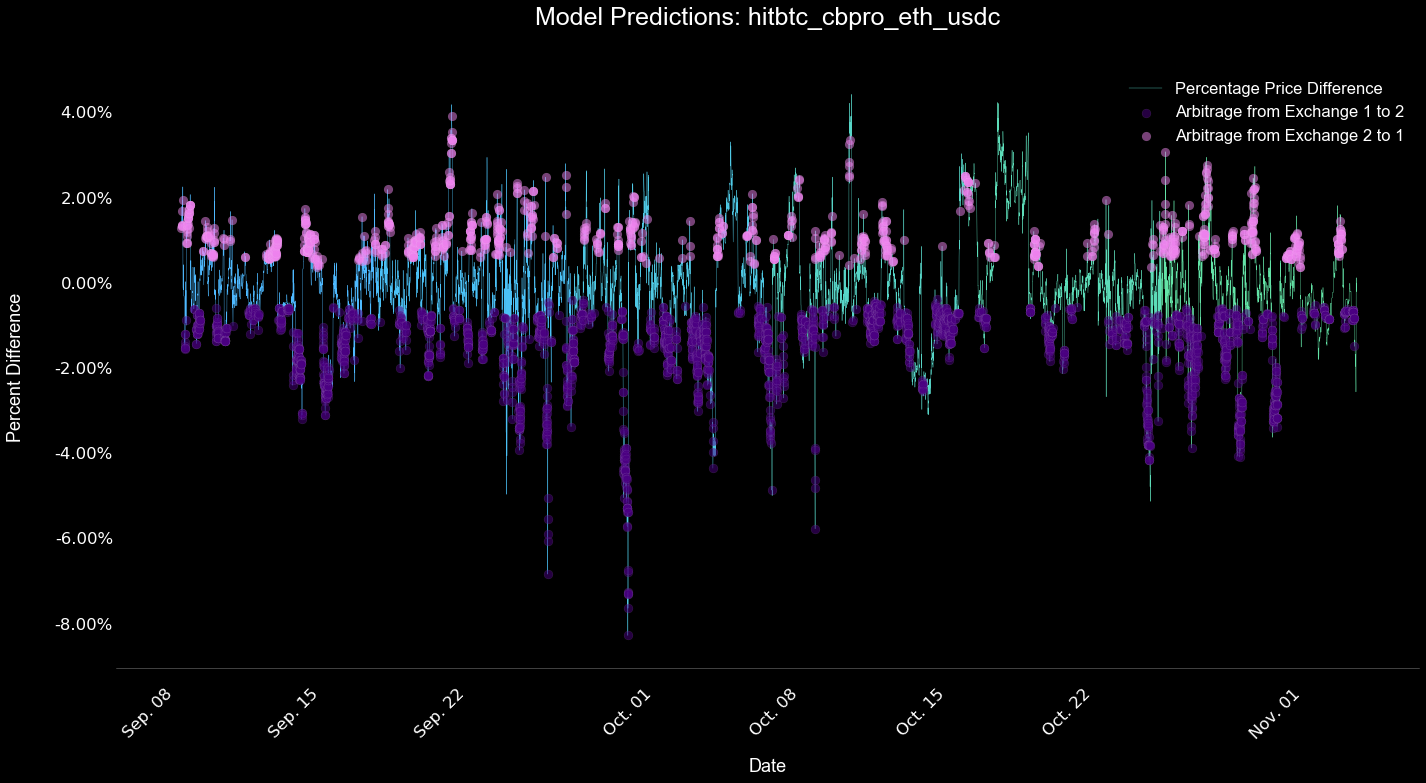

gemini_bitfinex_bch_btc 

data/arb_preds_test_data/gemini_bitfinex_bch_btc_rf_70_feat_hyper.csv


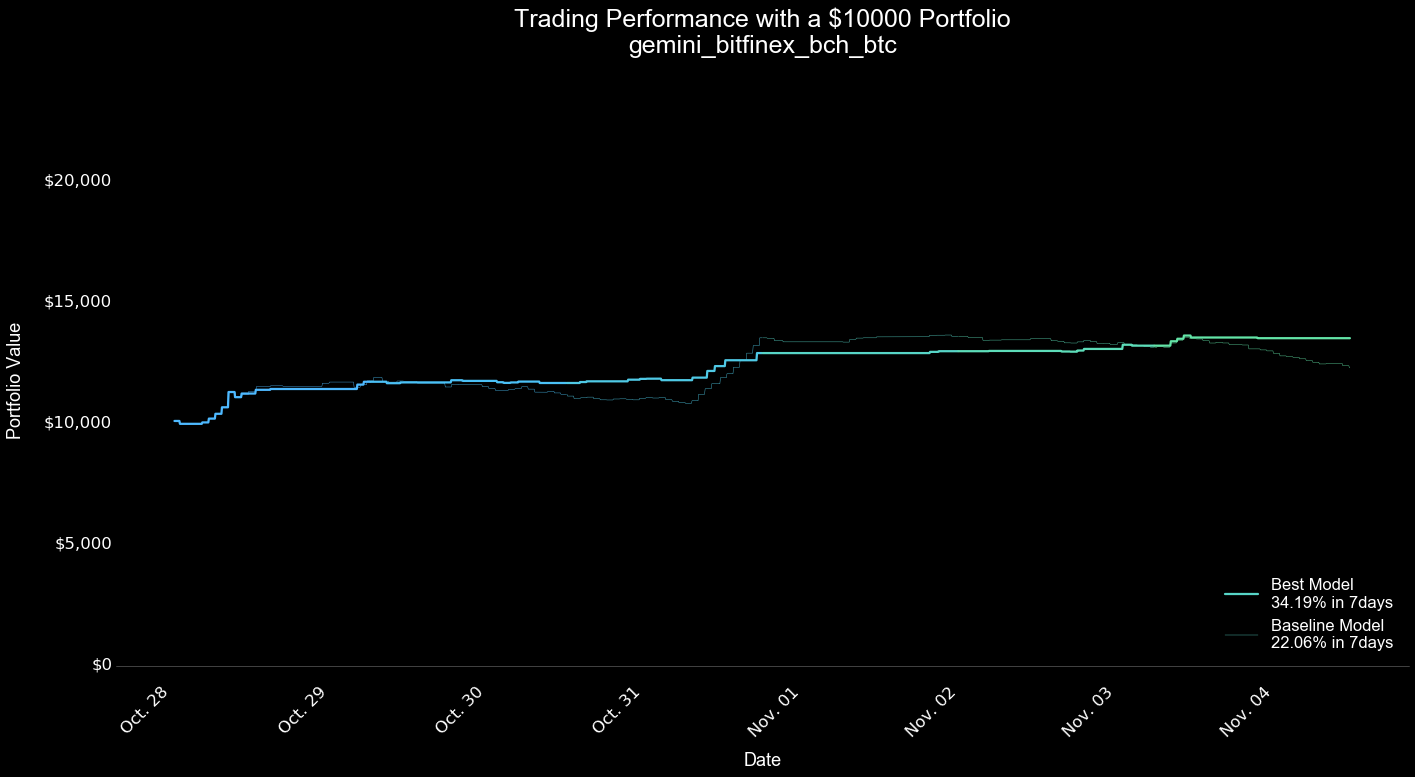

data/arb_preds_test_data/gemini_bitfinex_bch_btc_rf_70_feat_hyper.csv


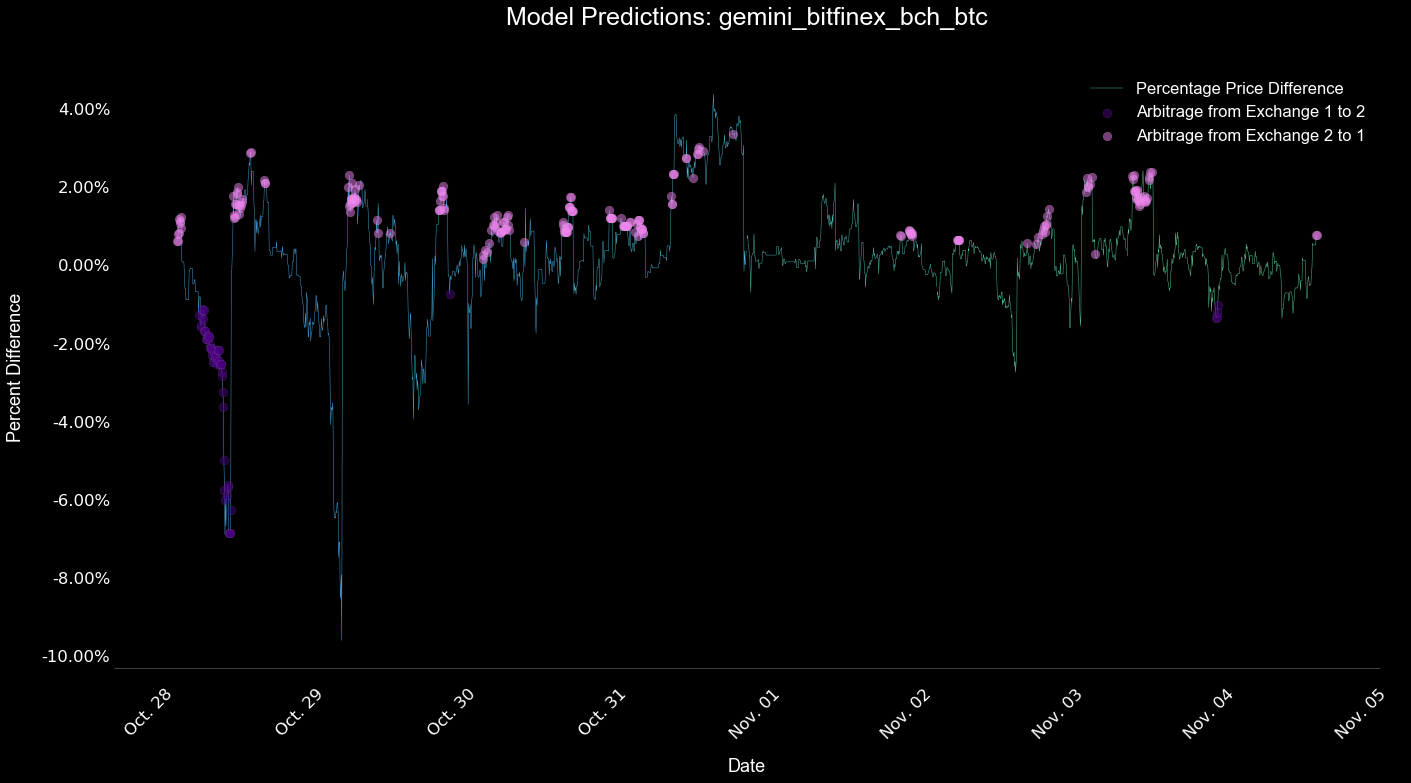

cbpro_gemini_bch_btc 

data/arb_preds_test_data/cbpro_gemini_bch_btc_rf_70_feat_hyper.csv


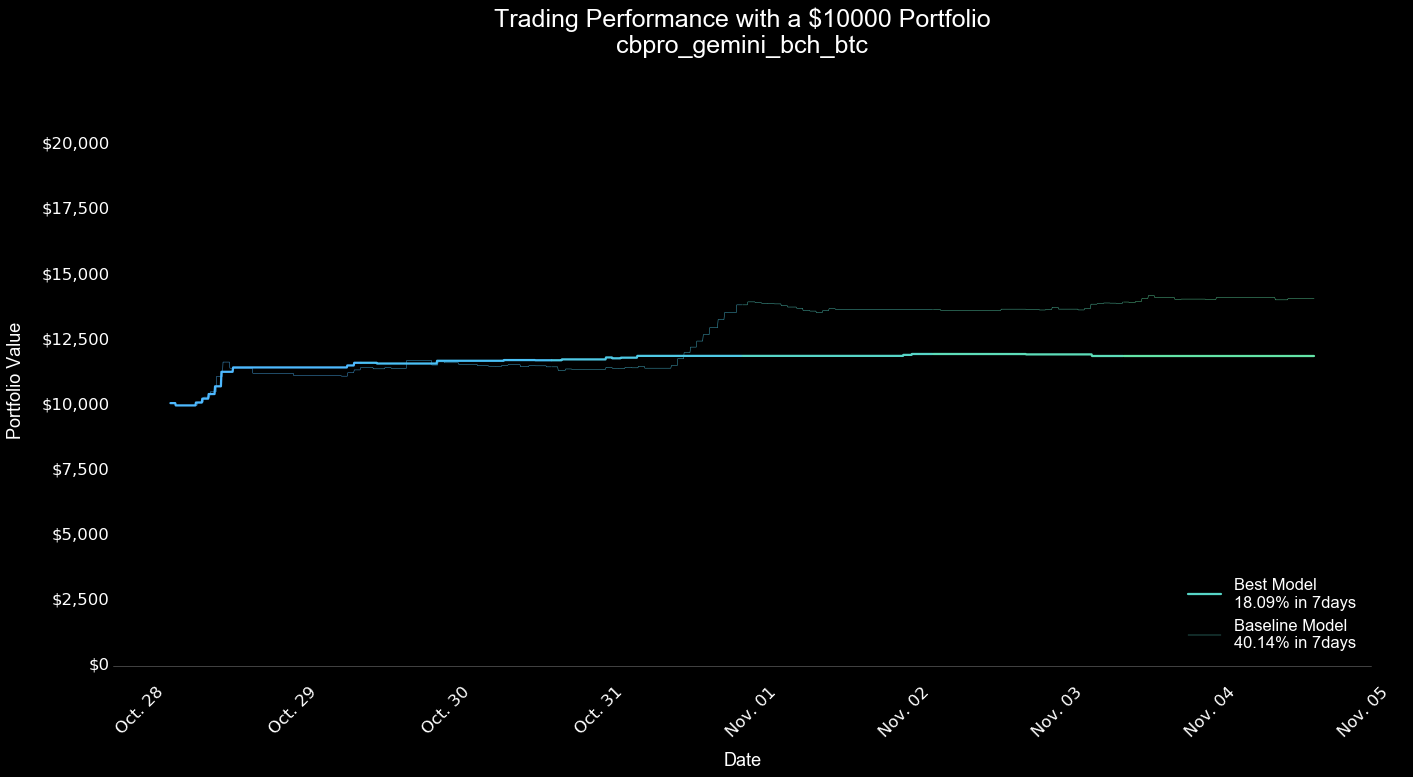

data/arb_preds_test_data/cbpro_gemini_bch_btc_rf_70_feat_hyper.csv


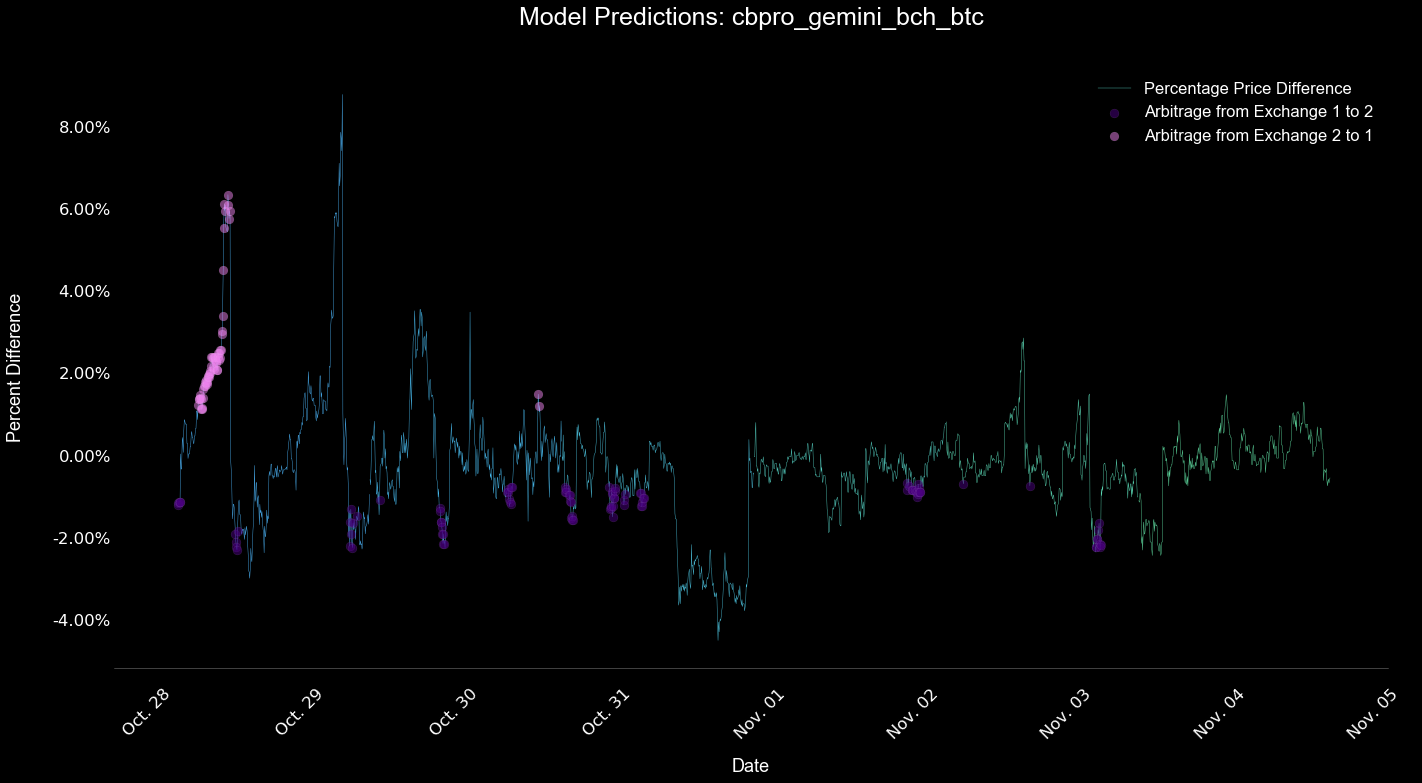

gemini_hitbtc_bch_btc 

data/arb_preds_test_data/gemini_hitbtc_bch_btc_rf_85_feat.csv


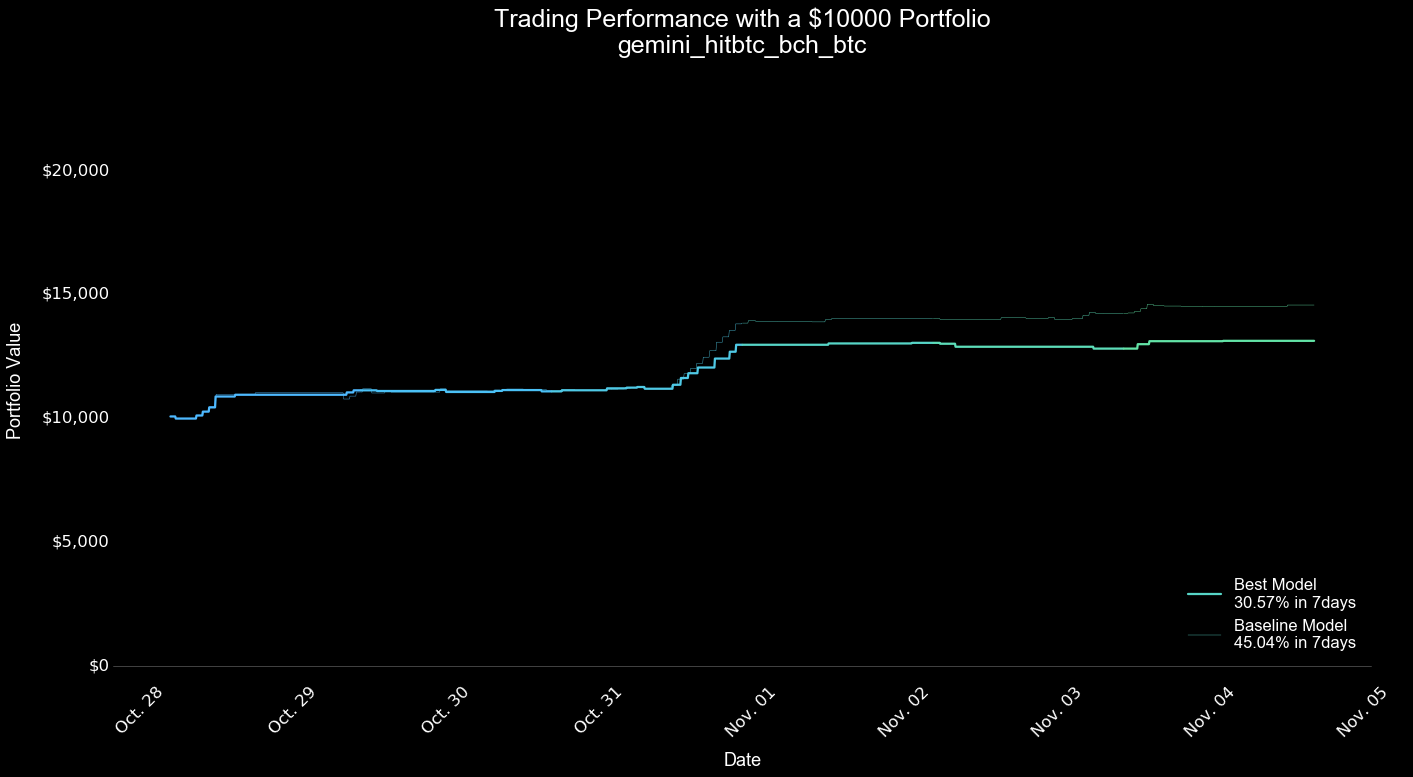

data/arb_preds_test_data/gemini_hitbtc_bch_btc_rf_85_feat.csv


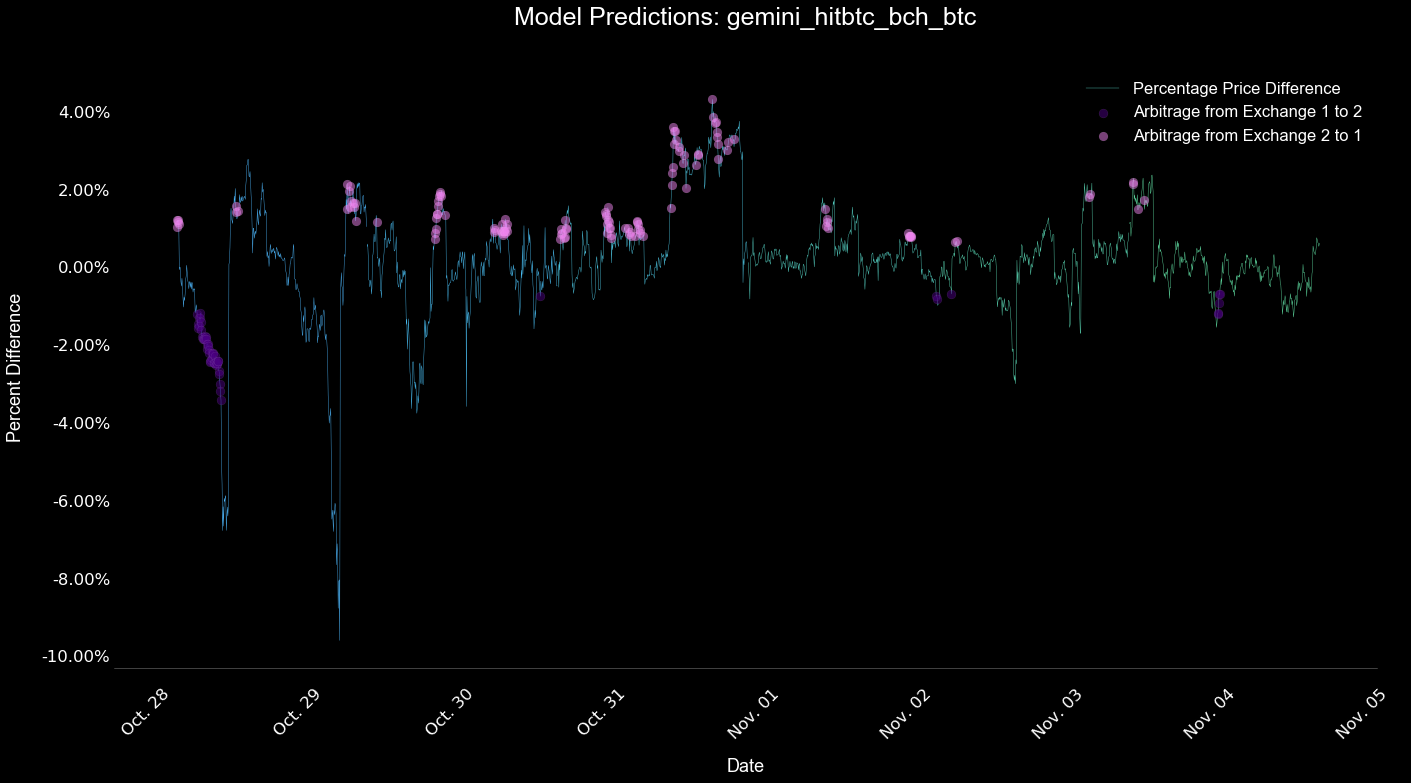

bitfinex_hitbtc_bch_usdt 

data/arb_preds_test_data/bitfinex_hitbtc_bch_usdt_rf_50_feat.csv


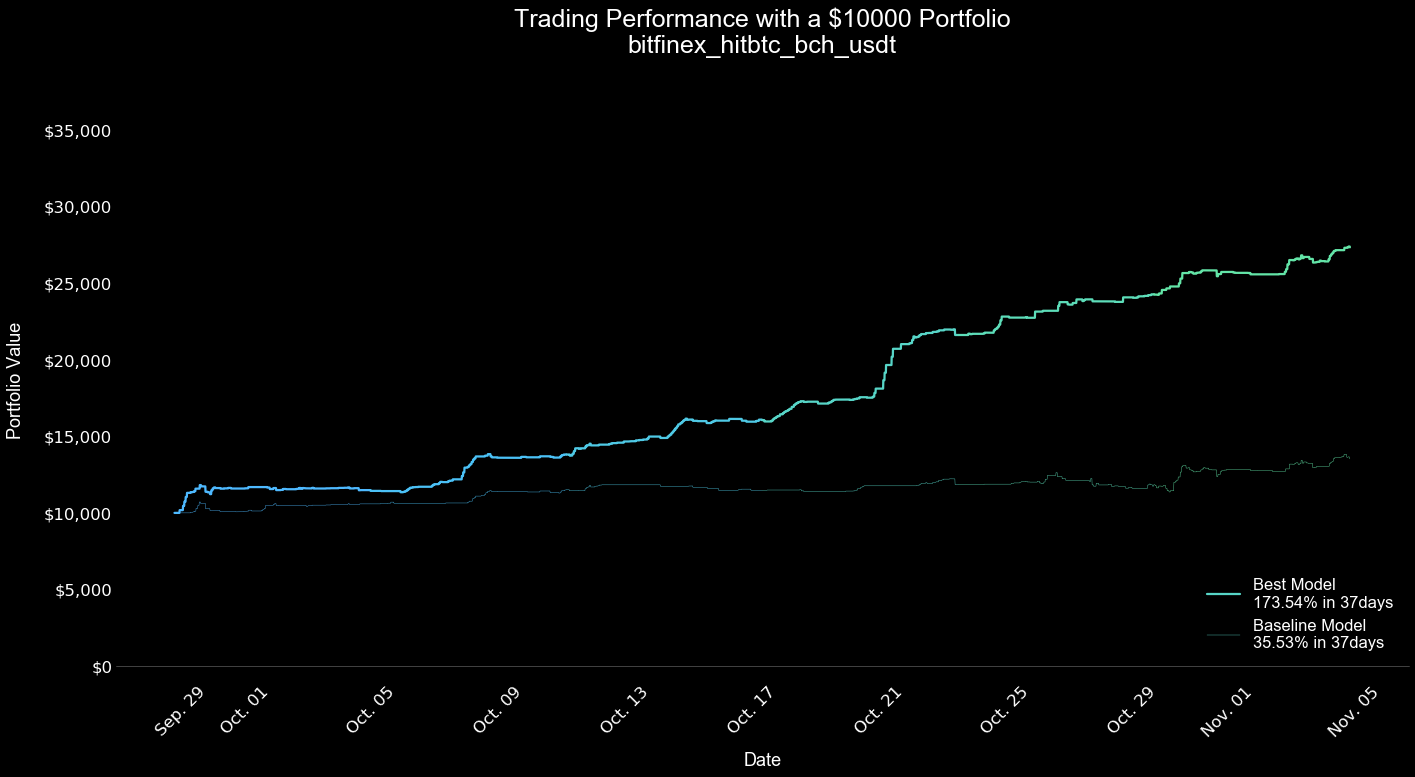

data/arb_preds_test_data/bitfinex_hitbtc_bch_usdt_rf_50_feat.csv


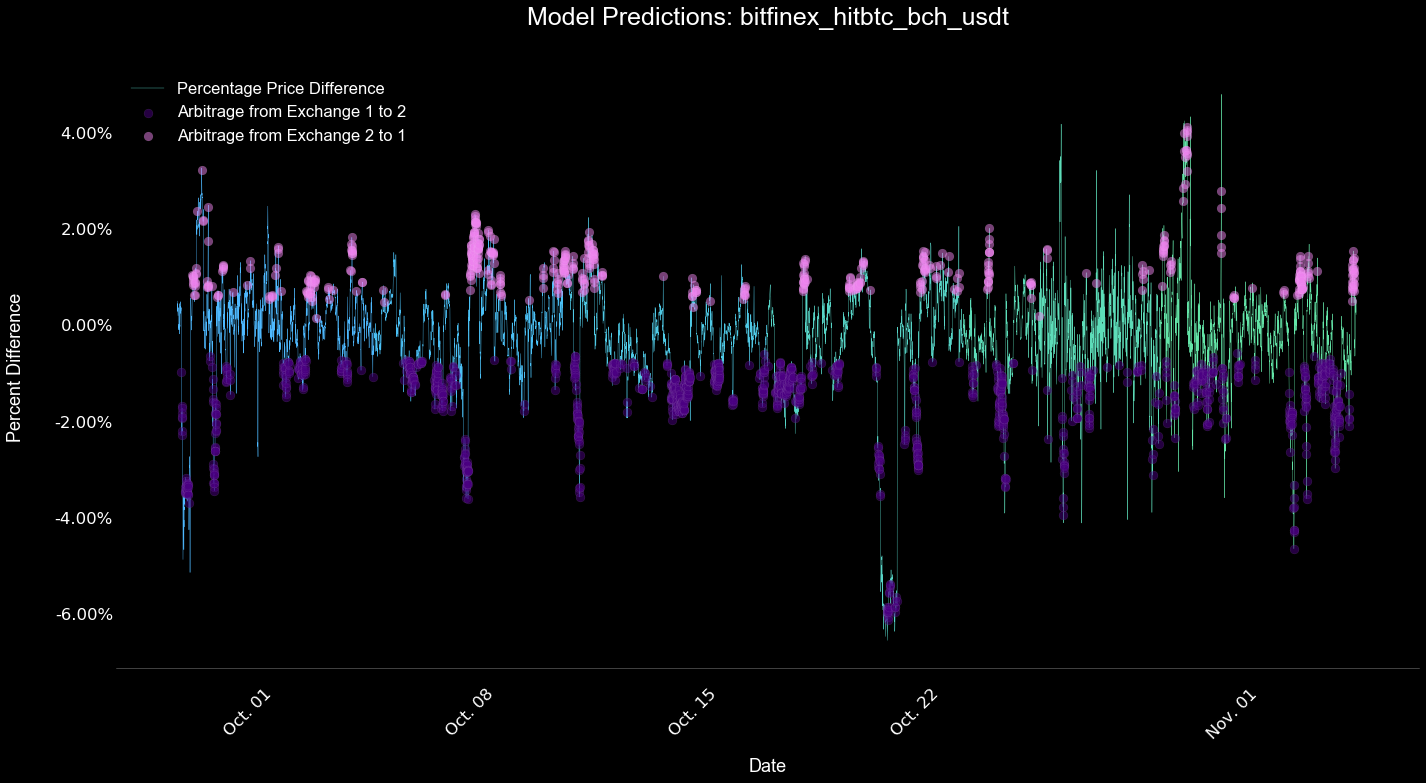

kraken_gemini_bch_btc 

data/arb_preds_test_data/kraken_gemini_bch_btc_rf_70_feat_hyper.csv


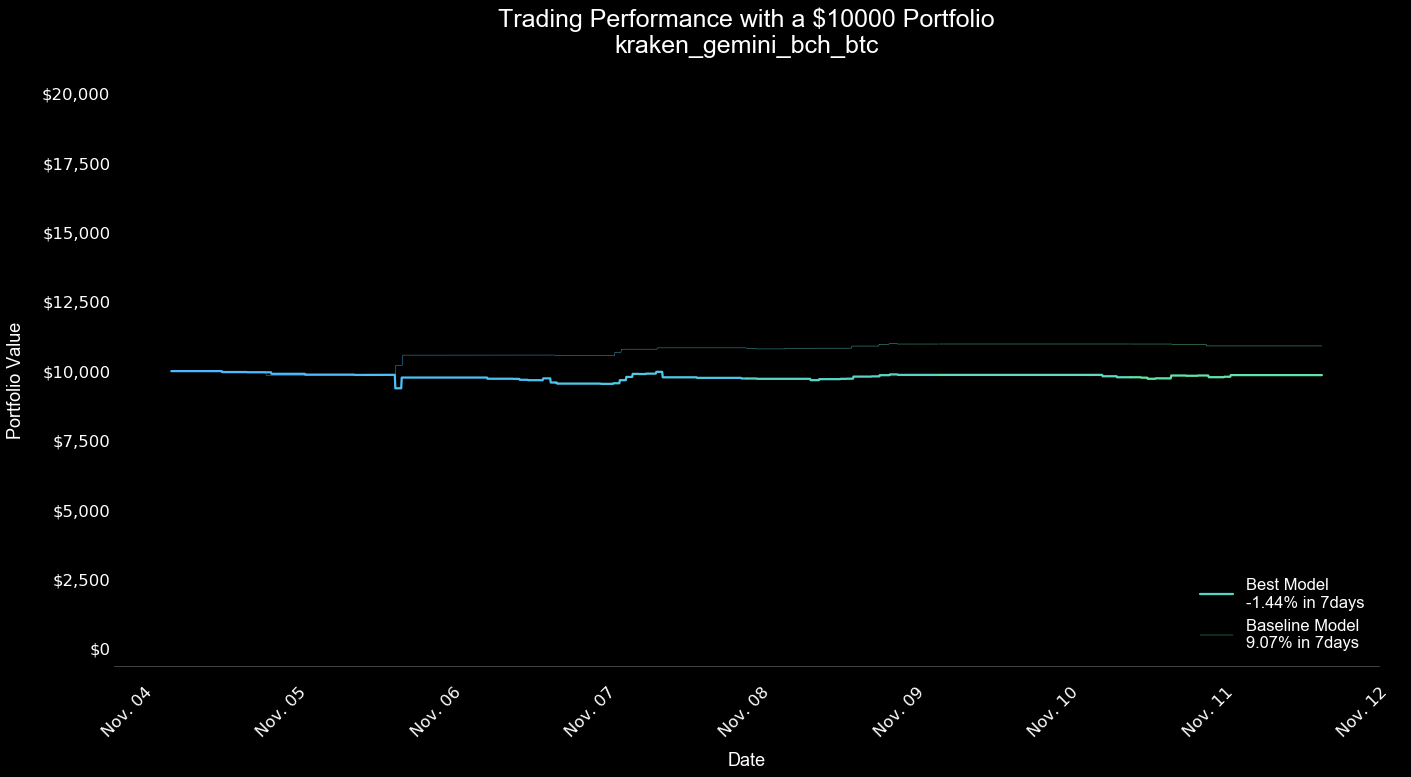

data/arb_preds_test_data/kraken_gemini_bch_btc_rf_70_feat_hyper.csv


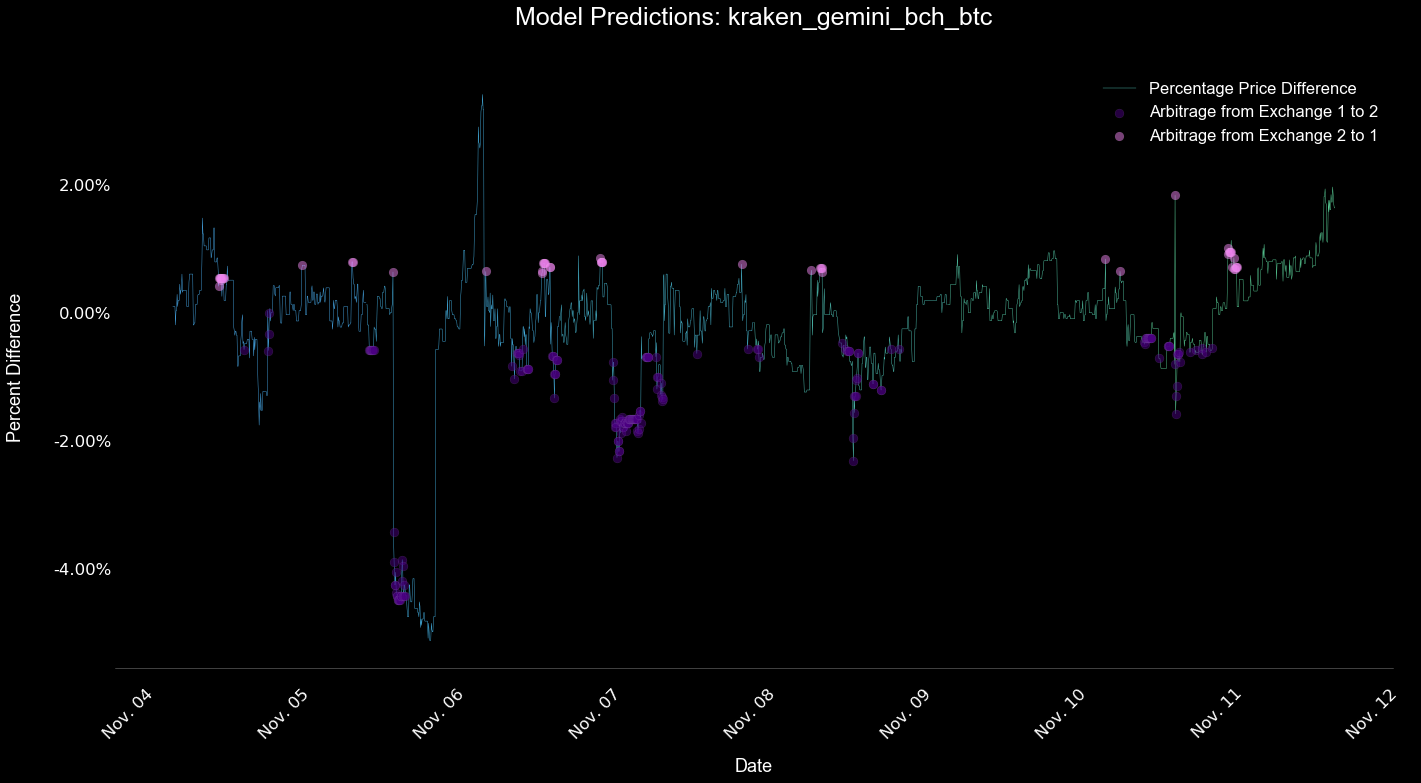

bitfinex_cbpro_btc_usd 

data/arb_preds_test_data/bitfinex_cbpro_btc_usd_lr_bl.csv


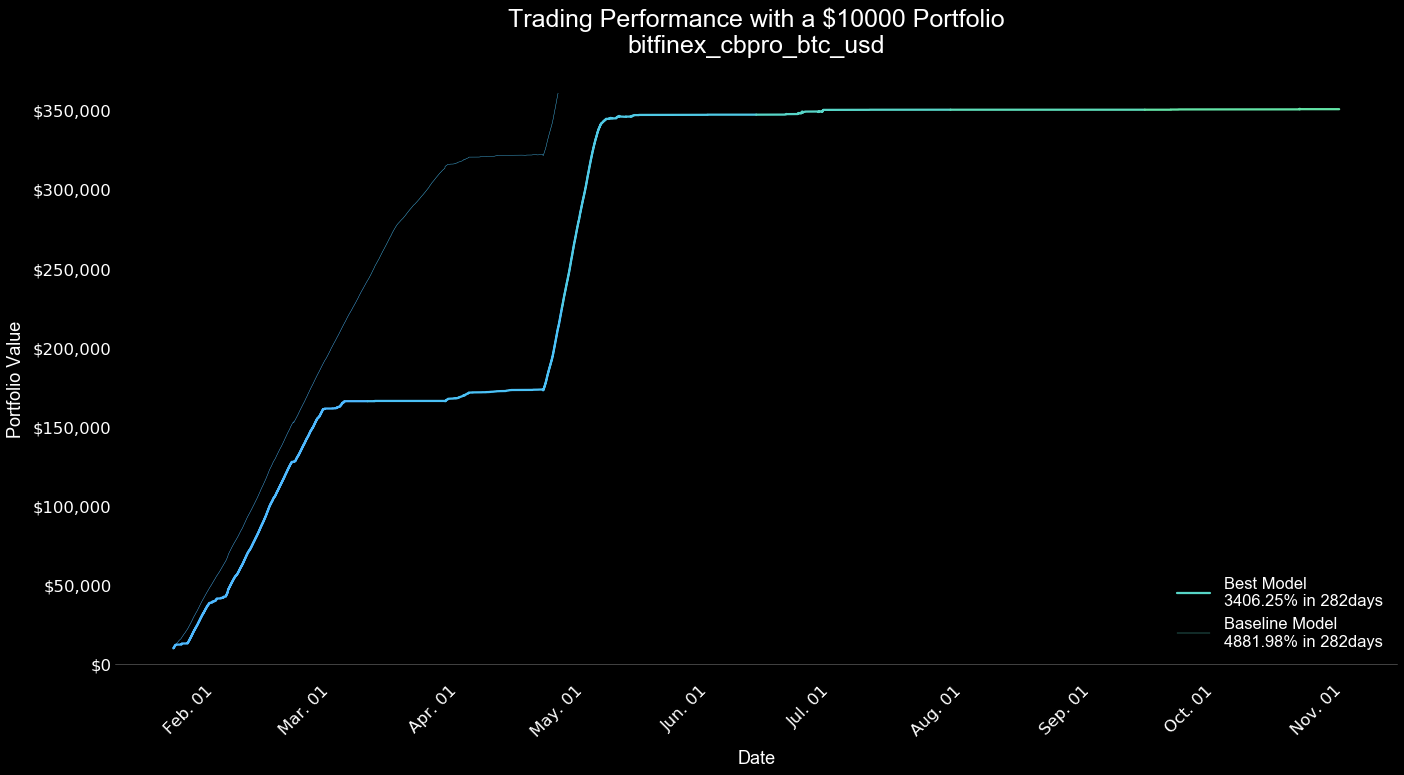

data/arb_preds_test_data/bitfinex_cbpro_btc_usd_lr_bl.csv


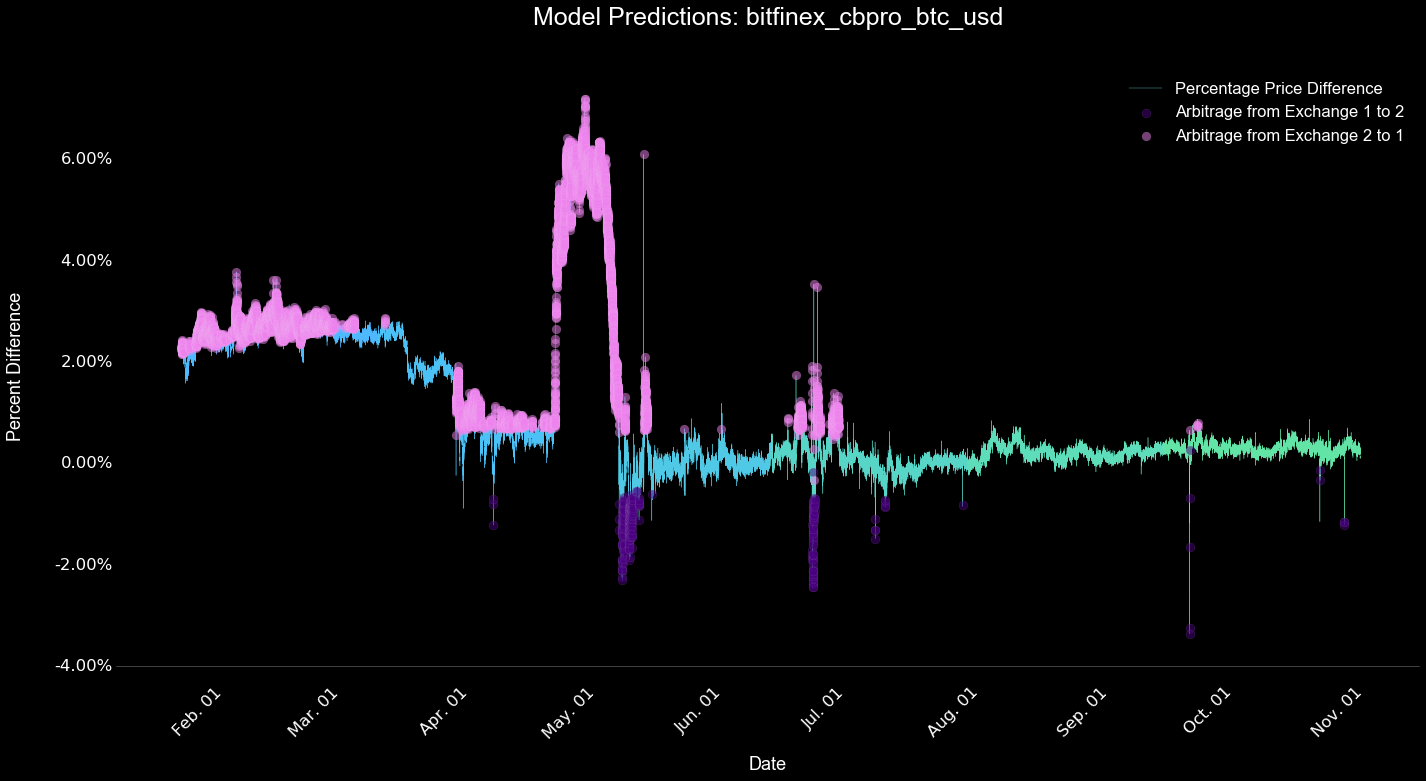

gemini_kraken_ltc_btc 

data/arb_preds_test_data/gemini_kraken_ltc_btc_rf_bl.csv


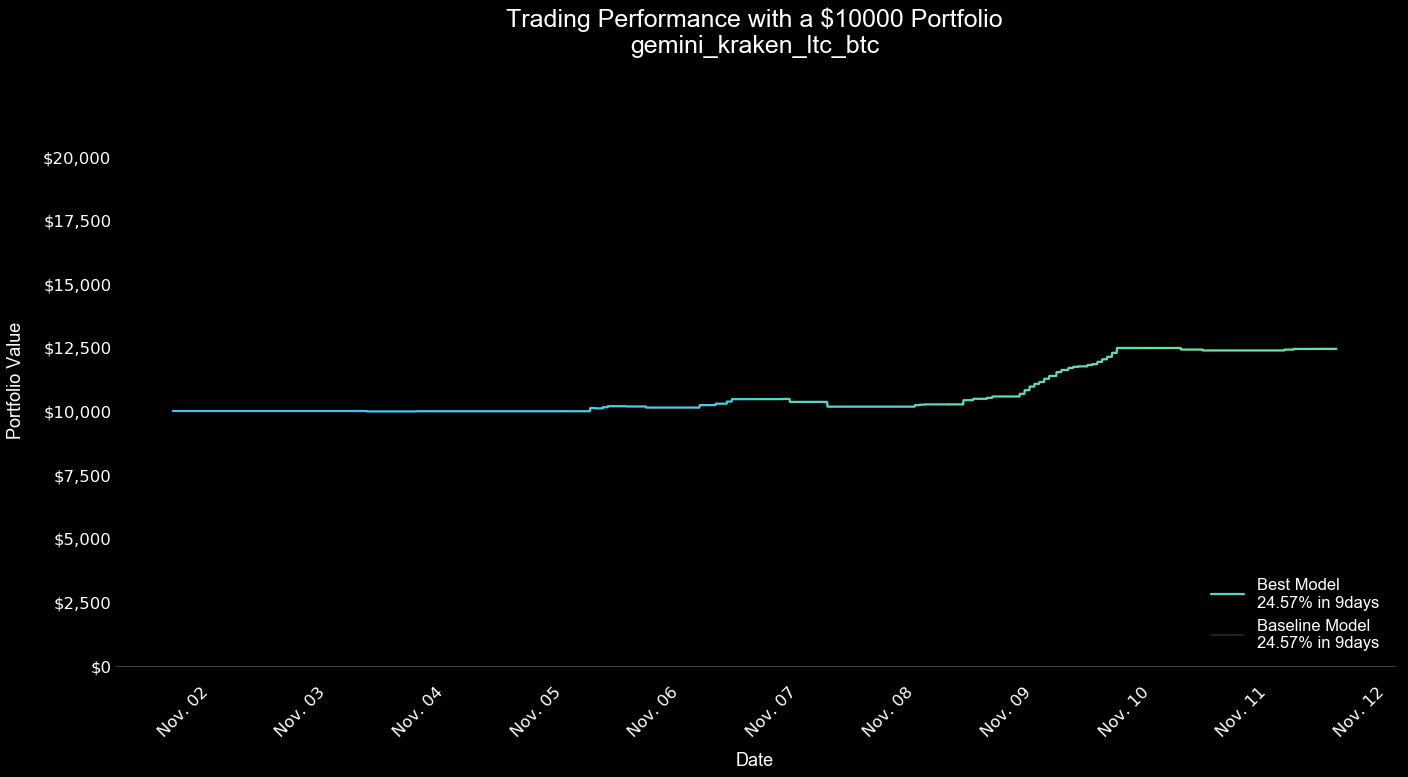

data/arb_preds_test_data/gemini_kraken_ltc_btc_rf_bl.csv


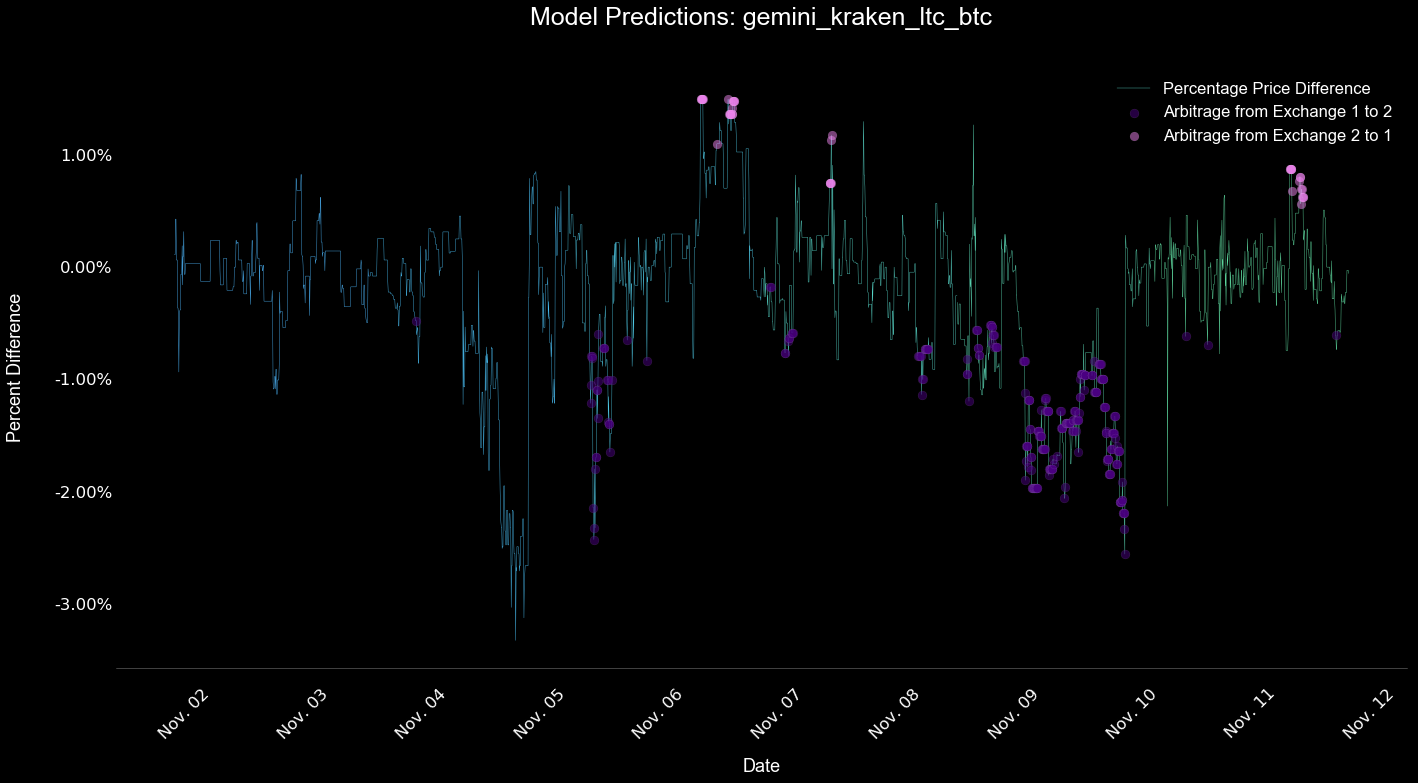

bitfinex_hitbtc_ltc_usdt 

data/arb_preds_test_data/bitfinex_hitbtc_ltc_usdt_rf_70_feat_hyper.csv


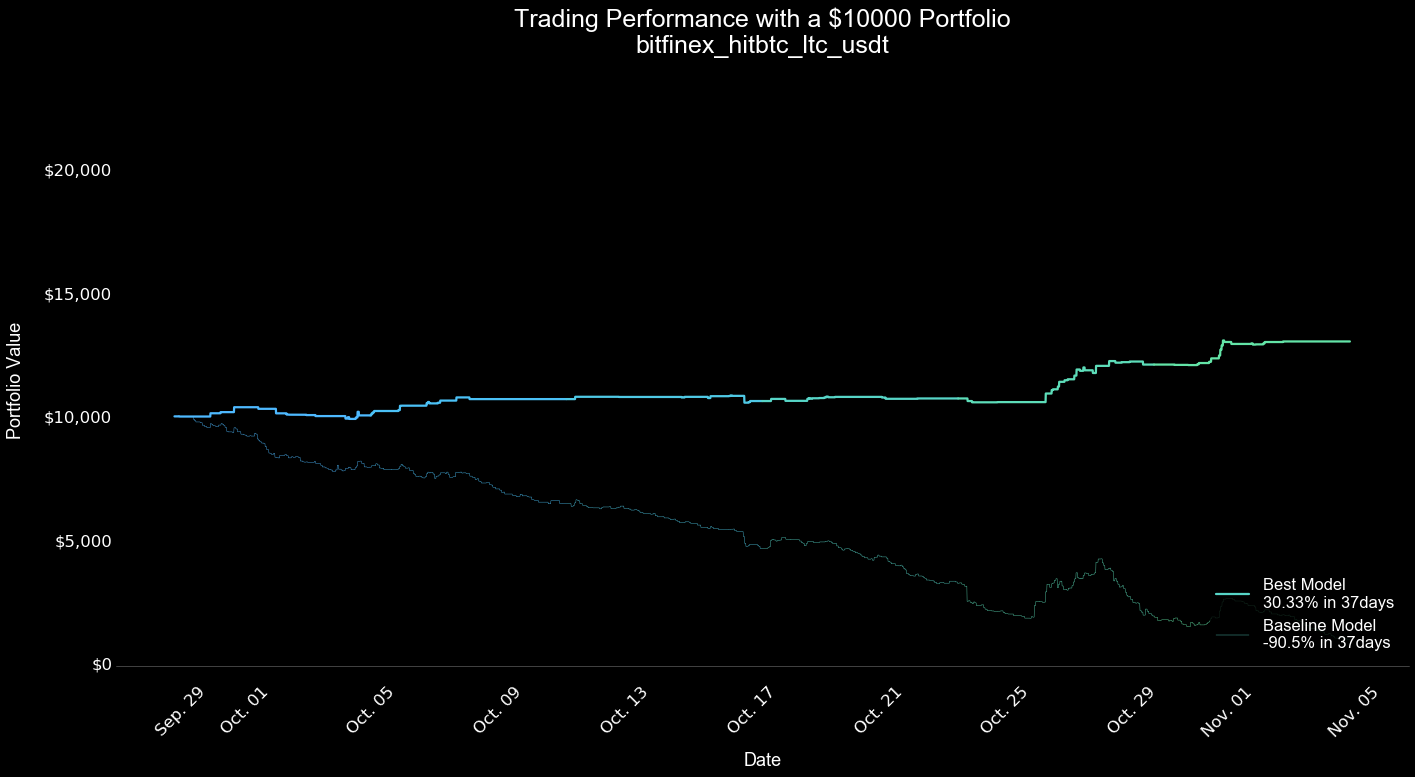

data/arb_preds_test_data/bitfinex_hitbtc_ltc_usdt_rf_70_feat_hyper.csv


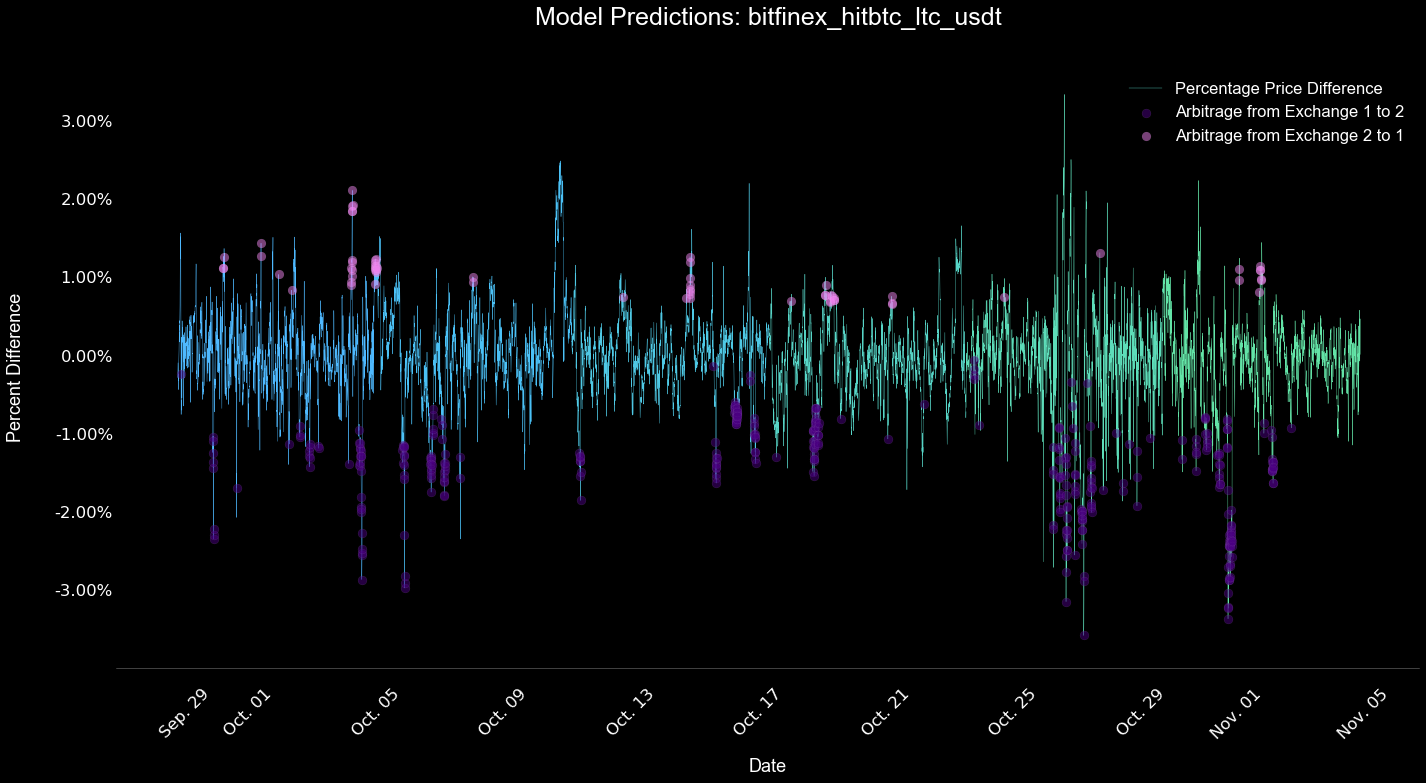

gemini_cbpro_ltc_btc 

data/arb_preds_test_data/gemini_cbpro_ltc_btc_rf_70_feat_hyper.csv


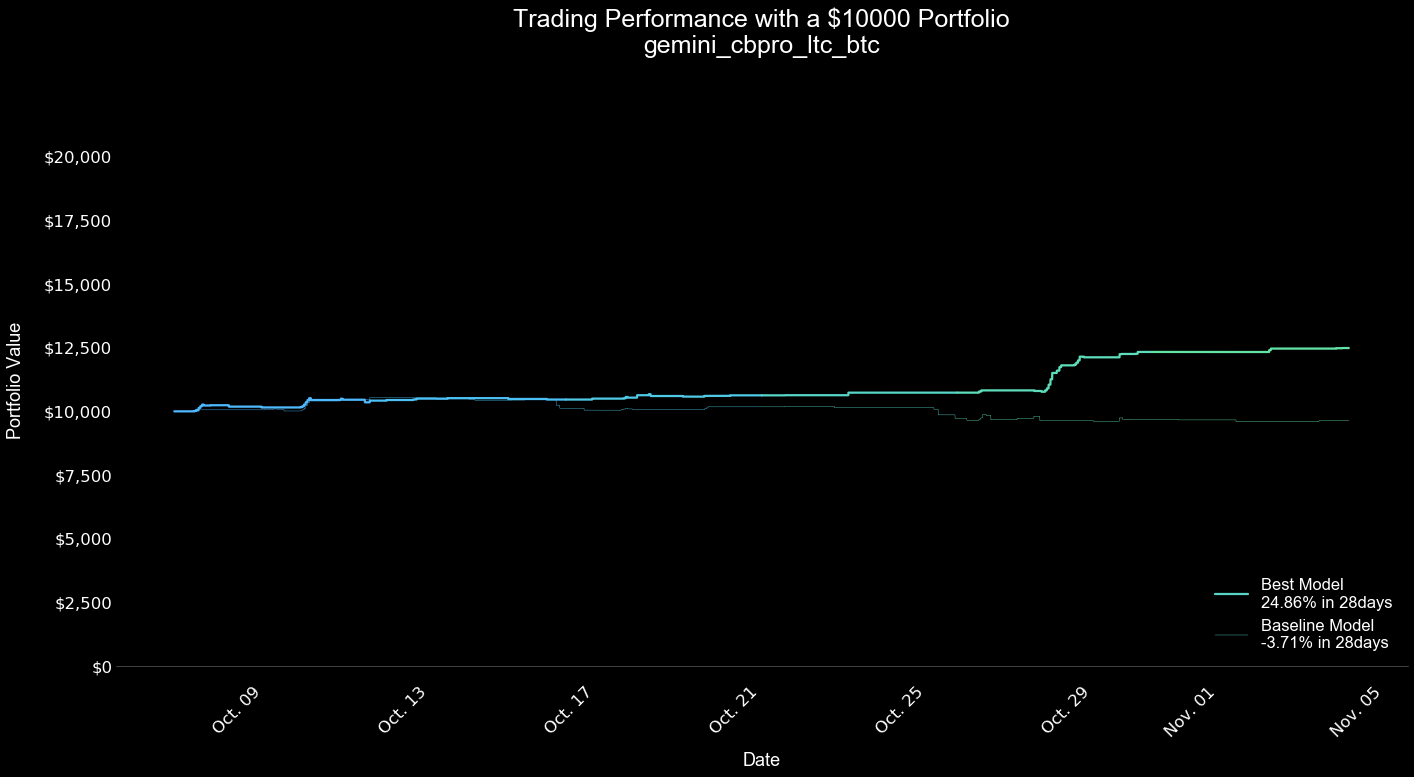

data/arb_preds_test_data/gemini_cbpro_ltc_btc_rf_70_feat_hyper.csv


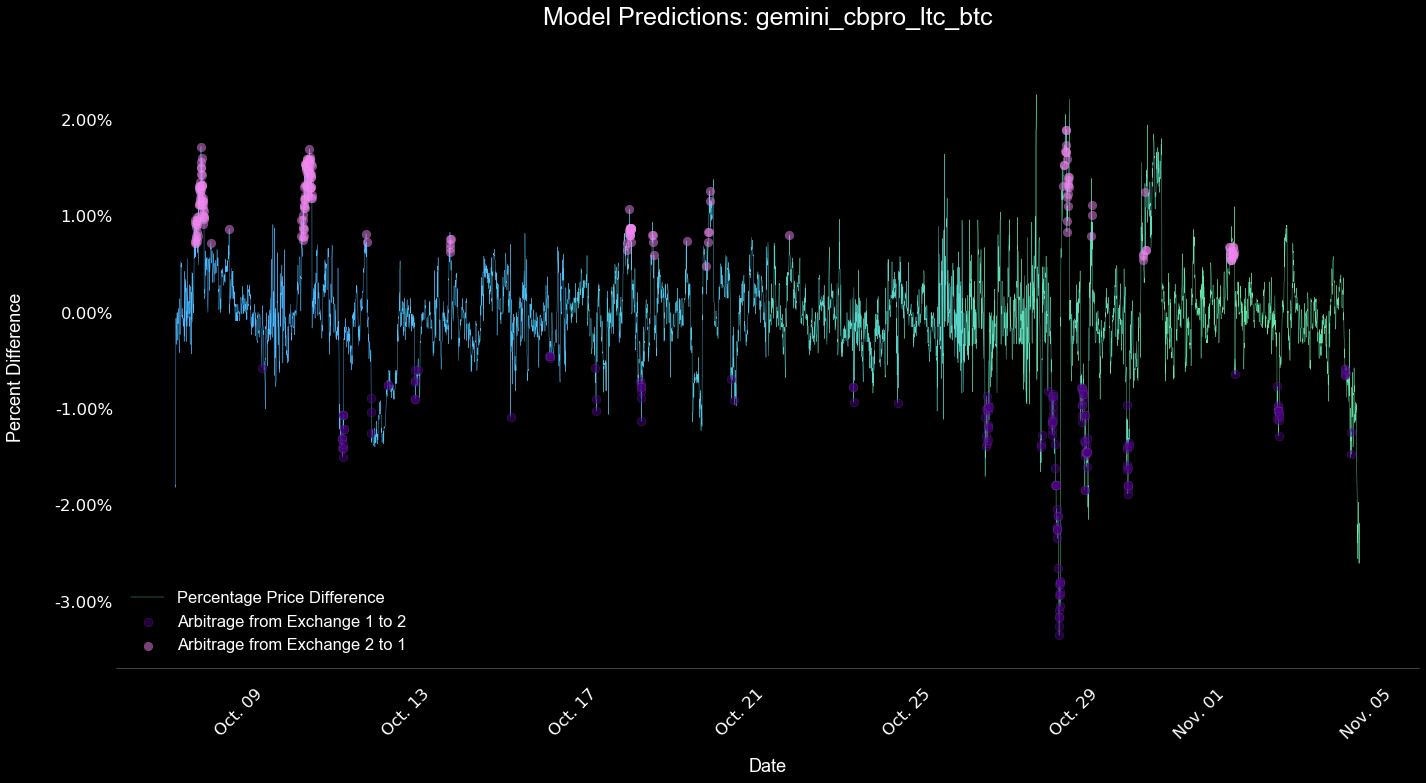

cbpro_bitfinex_eth_usd 

data/arb_preds_test_data/cbpro_bitfinex_eth_usd_lr_bl.csv


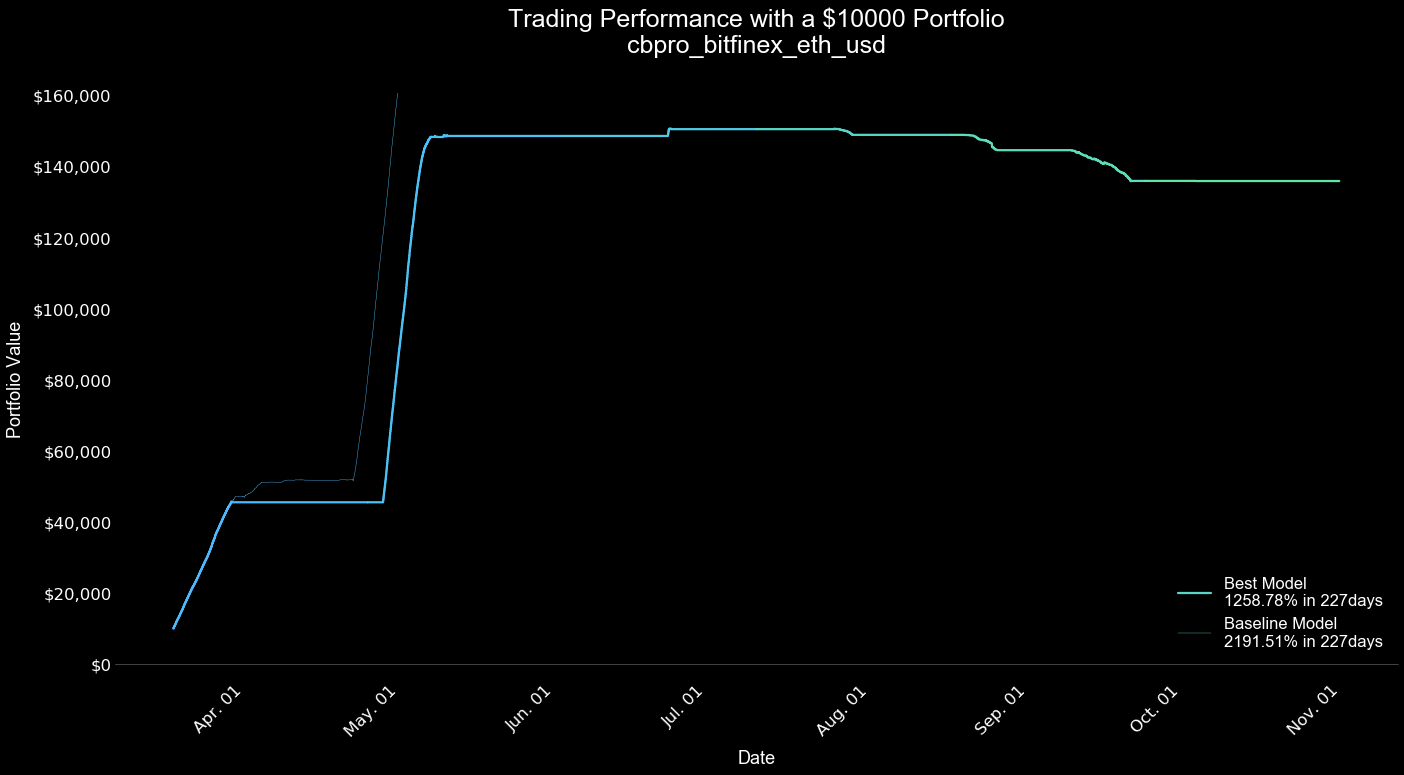

data/arb_preds_test_data/cbpro_bitfinex_eth_usd_lr_bl.csv


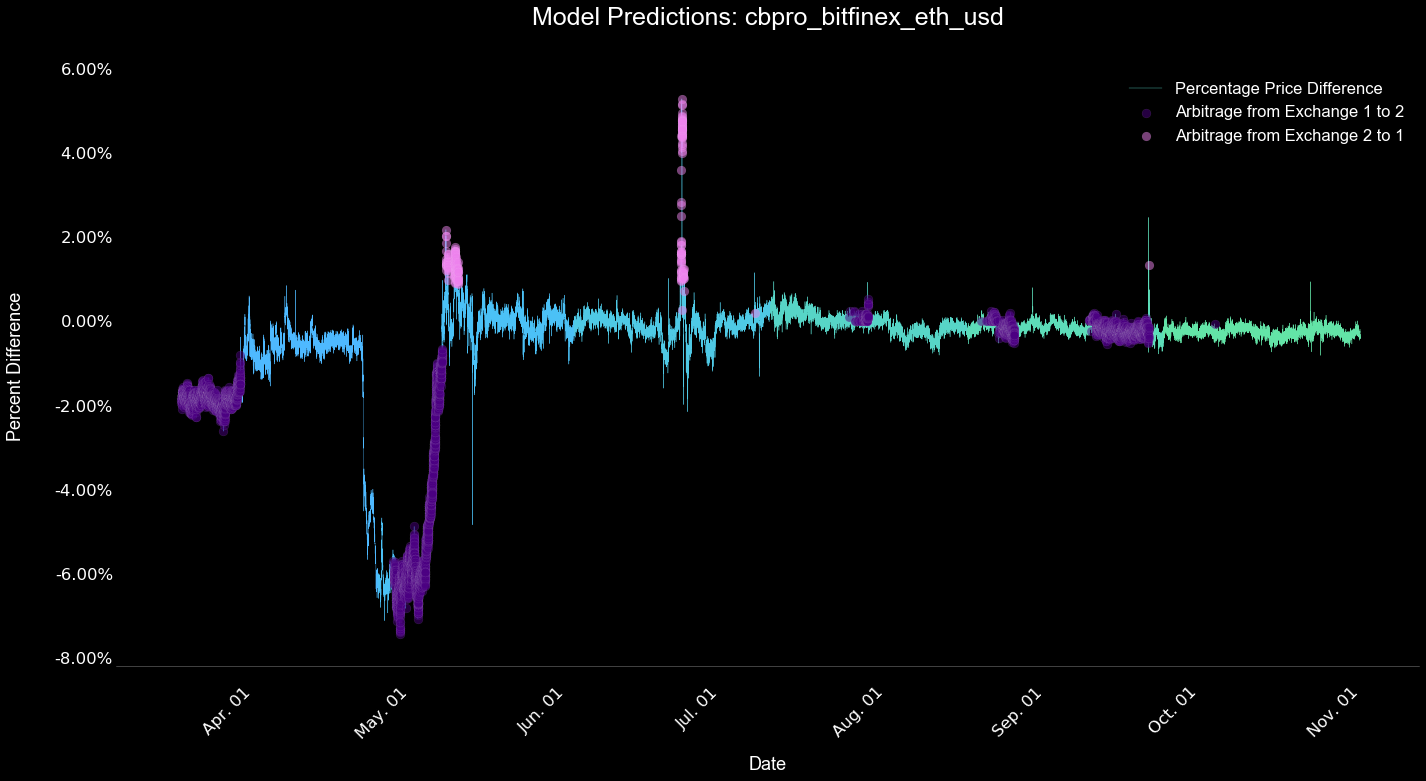

gemini_bitfinex_ltc_btc 

data/arb_preds_test_data/gemini_bitfinex_ltc_btc_lr_bl.csv


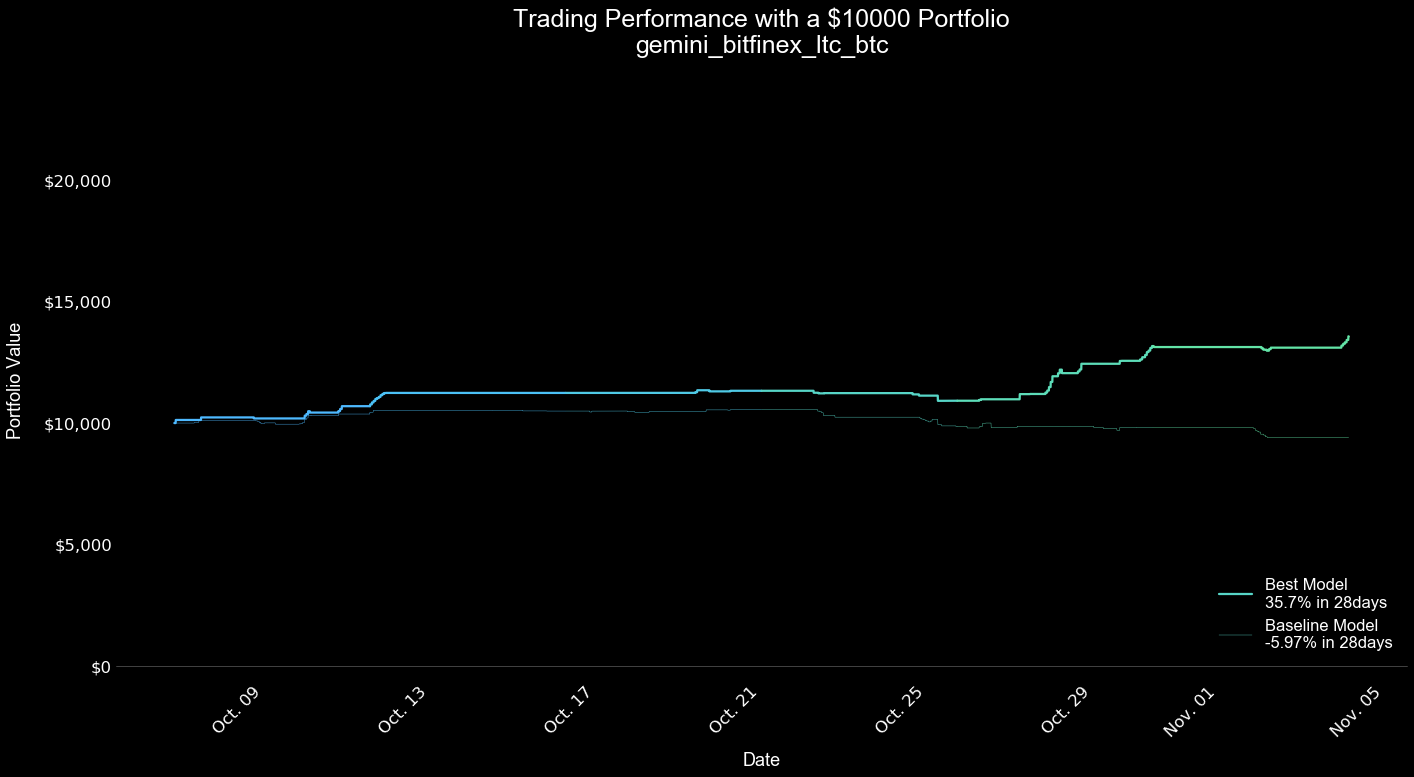

data/arb_preds_test_data/gemini_bitfinex_ltc_btc_lr_bl.csv


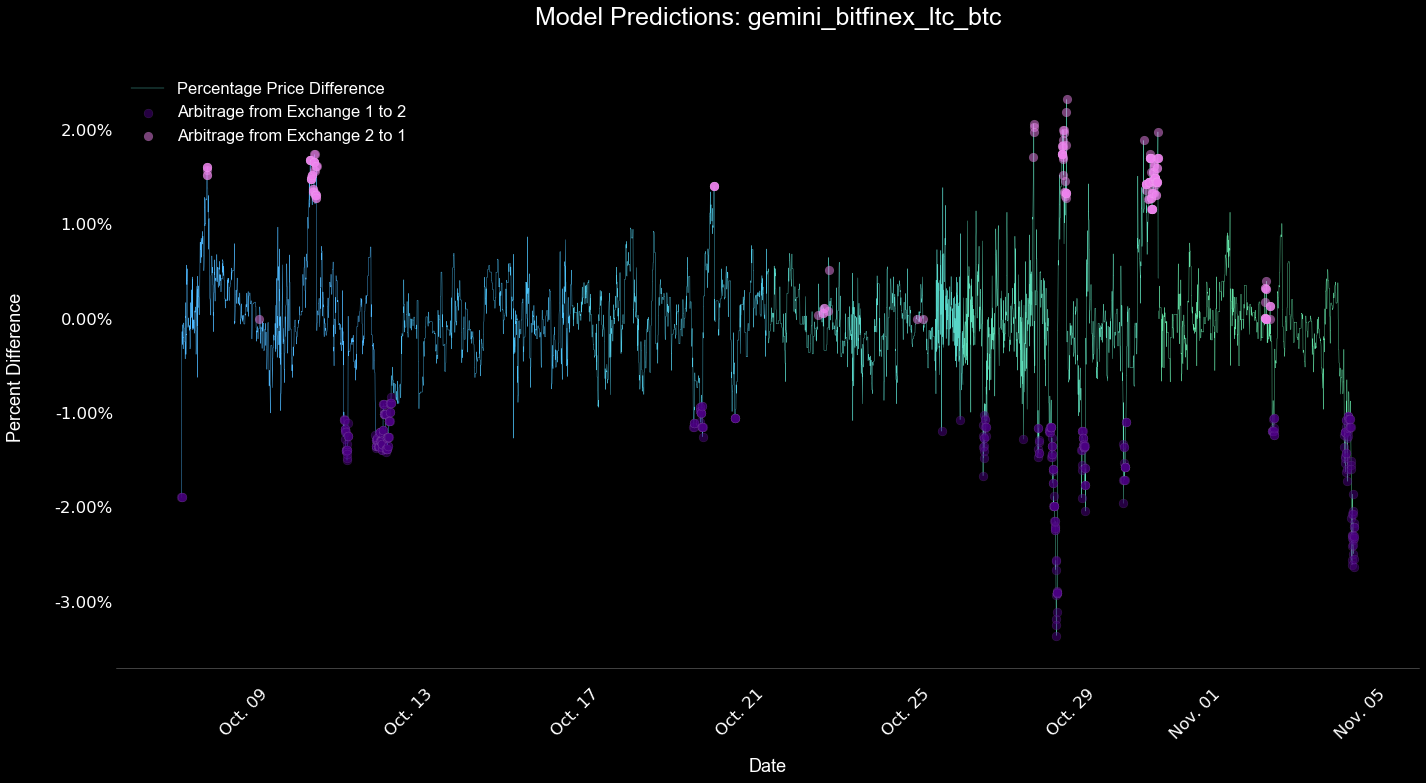

cbpro_bitfinex_ltc_usd 

data/arb_preds_test_data/cbpro_bitfinex_ltc_usd_lr_bl.csv


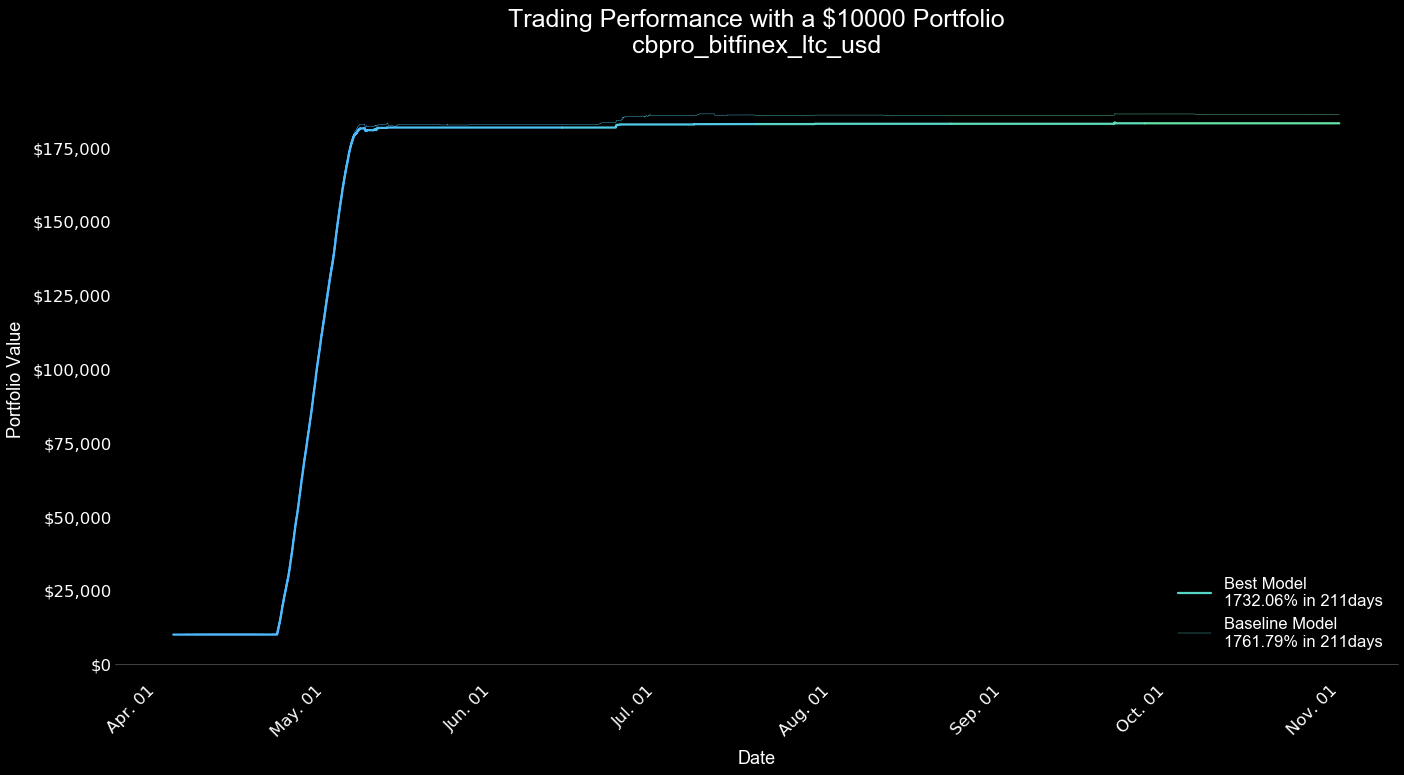

data/arb_preds_test_data/cbpro_bitfinex_ltc_usd_lr_bl.csv


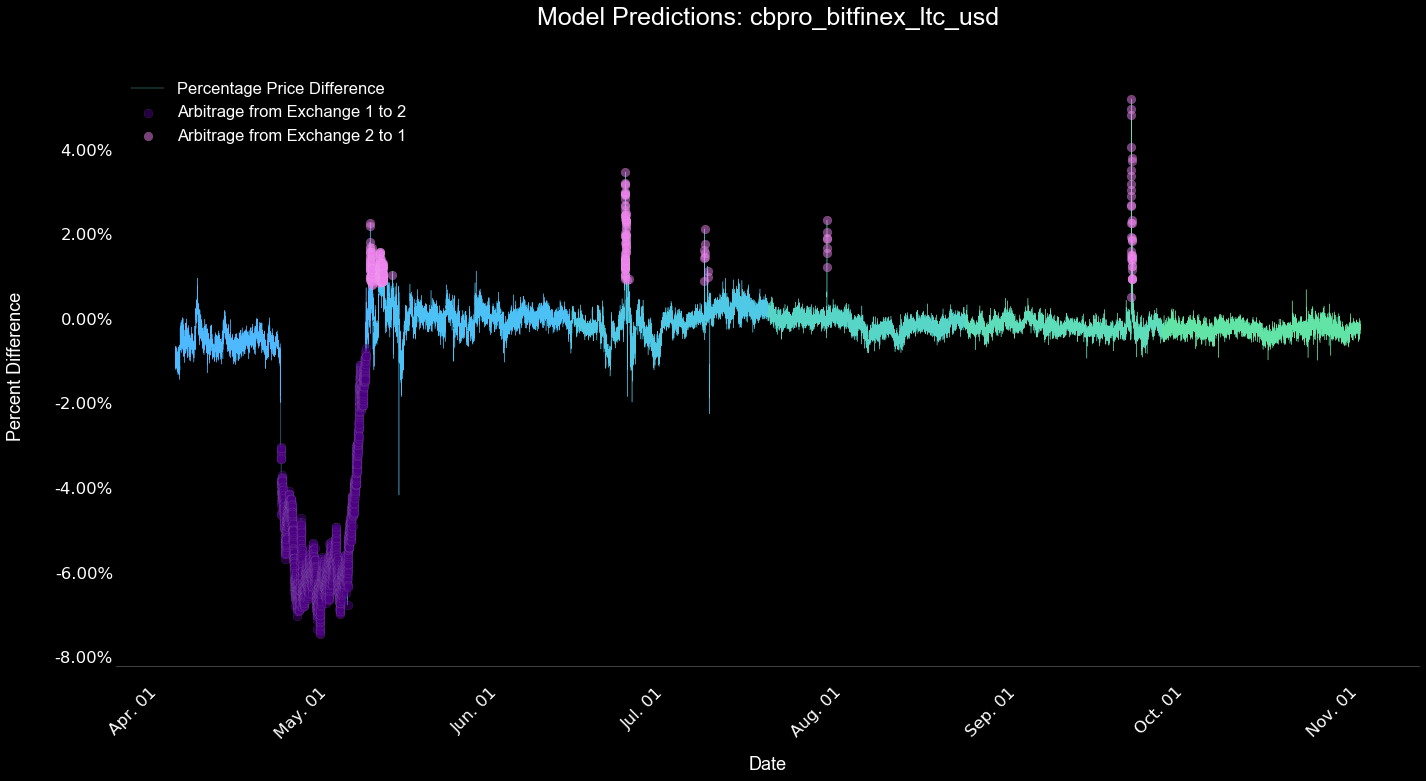

bitfinex_cbpro_etc_usd 

data/arb_preds_test_data/bitfinex_cbpro_etc_usd_rf_70_feat_hyper.csv


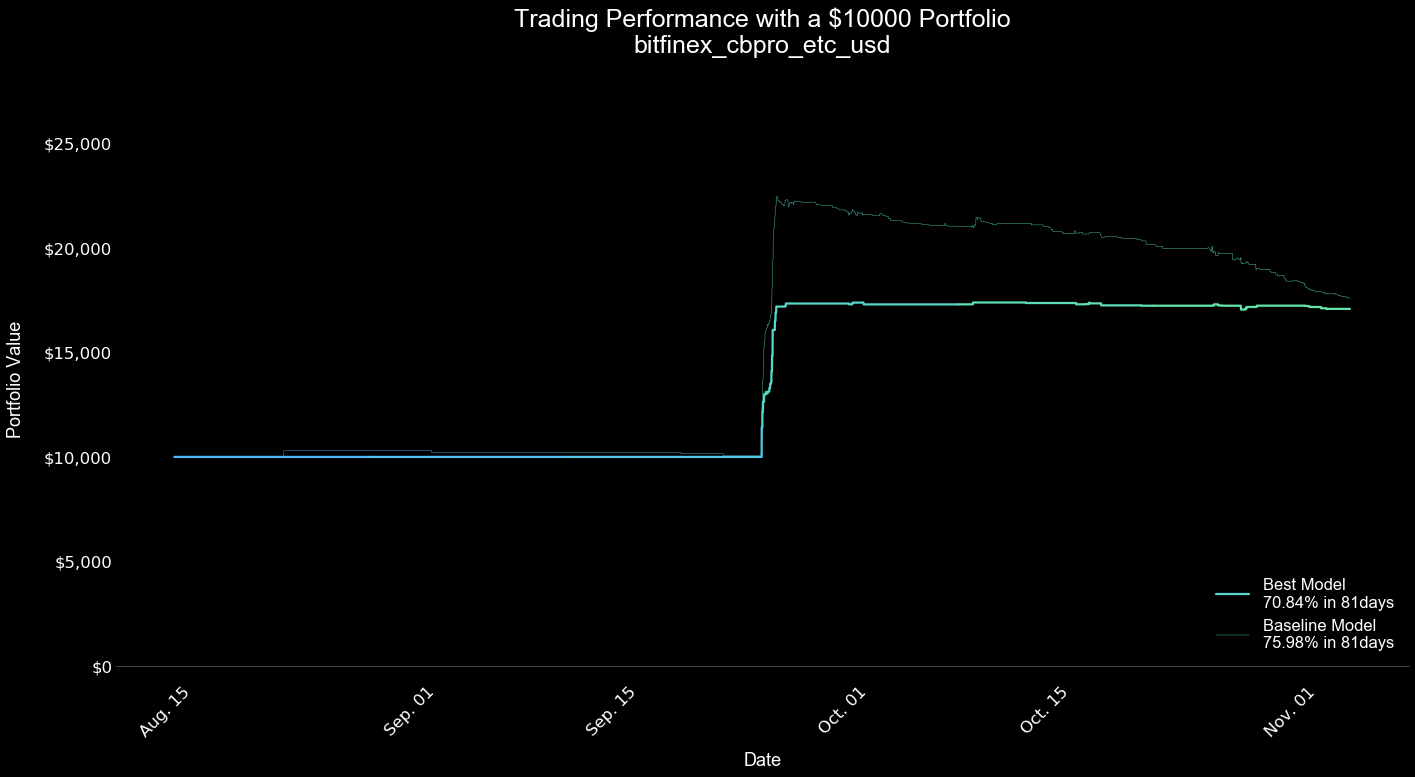

data/arb_preds_test_data/bitfinex_cbpro_etc_usd_rf_70_feat_hyper.csv


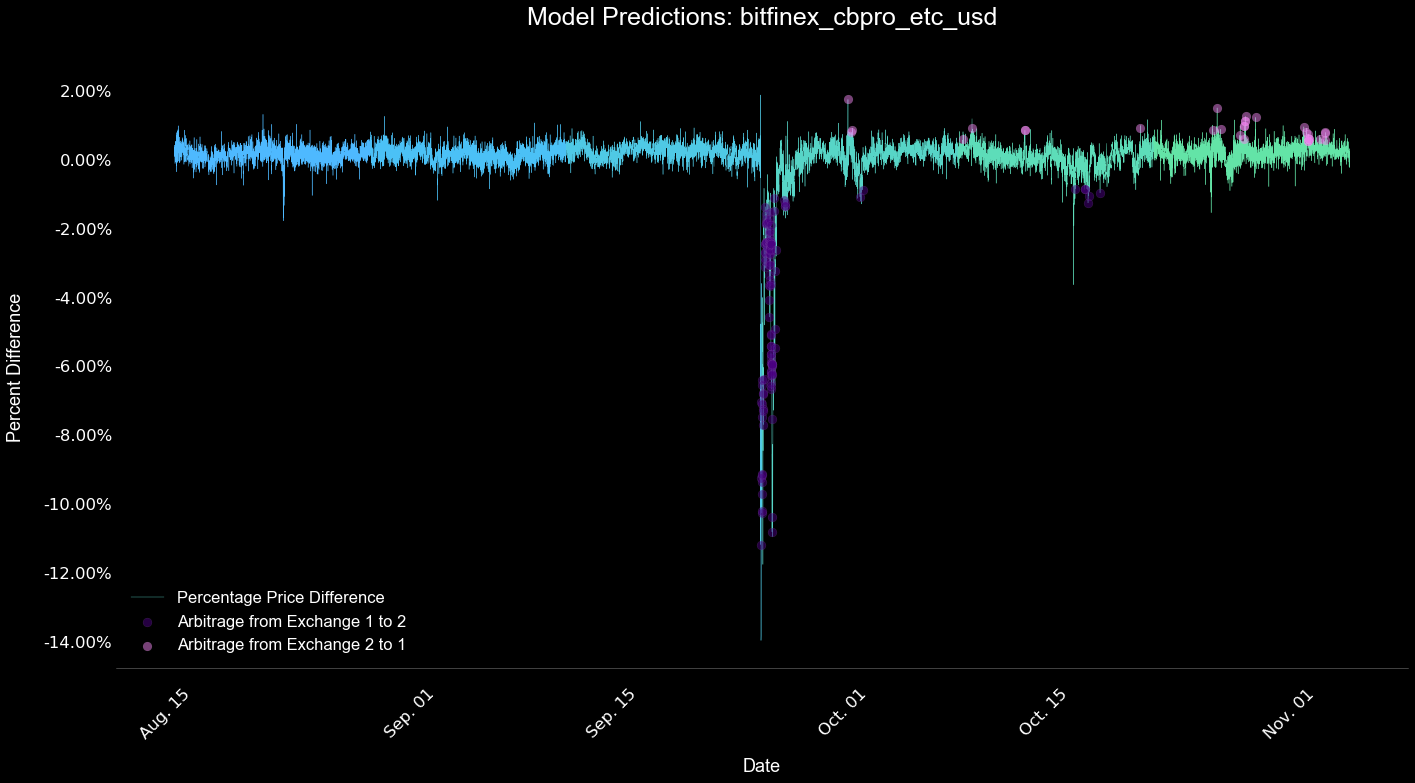

In [135]:
create_all_viz(top_models_df)